In [91]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/patient/dataset.csv


In [92]:
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from IPython.display import Image
import plotly.offline as py
import plotly.graph_objs as go
import plotly.tools as tls
py.init_notebook_mode(connected=True)
from sklearn.preprocessing import LabelEncoder

In [93]:
df = pd.read_csv("../input/patient/dataset.csv")

In [94]:
df.shape

(91713, 85)

In [95]:
df.columns

Index(['encounter_id', 'patient_id', 'hospital_id', 'age', 'bmi',
       'elective_surgery', 'ethnicity', 'gender', 'height', 'icu_admit_source',
       'icu_id', 'icu_stay_type', 'icu_type', 'pre_icu_los_days', 'weight',
       'apache_2_diagnosis', 'apache_3j_diagnosis', 'apache_post_operative',
       'arf_apache', 'gcs_eyes_apache', 'gcs_motor_apache',
       'gcs_unable_apache', 'gcs_verbal_apache', 'heart_rate_apache',
       'intubated_apache', 'map_apache', 'resprate_apache', 'temp_apache',
       'ventilated_apache', 'd1_diasbp_max', 'd1_diasbp_min',
       'd1_diasbp_noninvasive_max', 'd1_diasbp_noninvasive_min',
       'd1_heartrate_max', 'd1_heartrate_min', 'd1_mbp_max', 'd1_mbp_min',
       'd1_mbp_noninvasive_max', 'd1_mbp_noninvasive_min', 'd1_resprate_max',
       'd1_resprate_min', 'd1_spo2_max', 'd1_spo2_min', 'd1_sysbp_max',
       'd1_sysbp_min', 'd1_sysbp_noninvasive_max', 'd1_sysbp_noninvasive_min',
       'd1_temp_max', 'd1_temp_min', 'h1_diasbp_max', 'h1_diasbp_

In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91713 entries, 0 to 91712
Data columns (total 85 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   encounter_id                   91713 non-null  int64  
 1   patient_id                     91713 non-null  int64  
 2   hospital_id                    91713 non-null  int64  
 3   age                            87485 non-null  float64
 4   bmi                            88284 non-null  float64
 5   elective_surgery               91713 non-null  int64  
 6   ethnicity                      90318 non-null  object 
 7   gender                         91688 non-null  object 
 8   height                         90379 non-null  float64
 9   icu_admit_source               91601 non-null  object 
 10  icu_id                         91713 non-null  int64  
 11  icu_stay_type                  91713 non-null  object 
 12  icu_type                       91713 non-null 

In [97]:
df.head()

encounter_id  patient_id  hospital_id   age    bmi  elective_surgery  \
0         66154       25312          118  68.0  22.73                 0   
1        114252       59342           81  77.0  27.42                 0   
2        119783       50777          118  25.0  31.95                 0   
3         79267       46918          118  81.0  22.64                 1   
4         92056       34377           33  19.0    NaN                 0   

   ethnicity gender  height           icu_admit_source  ...  \
0  Caucasian      M   180.3                      Floor  ...   
1  Caucasian      F   160.0                      Floor  ...   
2  Caucasian      F   172.7       Accident & Emergency  ...   
3  Caucasian      F   165.1  Operating Room / Recovery  ...   
4  Caucasian      M   188.0       Accident & Emergency  ...   

   diabetes_mellitus hepatic_failure immunosuppression  leukemia  lymphoma  \
0                1.0             0.0               0.0       0.0       0.0   
1                1.0             0.0               0.0       0.0       0.0   
2                0.0             0.0               0.0       0.0       0.0   
3                0.0             0.0               0.0       0.0       0.0   
4                0.0             0.0               0.0       0.0       0.0   

   solid_tumor_with_metastasis  apache_3j_bodysystem  apache_2_bodysystem  \
0                          0.0                Sepsis       Cardiovascular   
1                          0.0           Respiratory          Respiratory   
2                          0.0             Metabolic            Metabolic   
3                          0.0        Cardiovascular       Cardiovascular   
4                          0.0                Trauma               Trauma   

   Unnamed: 83  hospital_death  
0          NaN               0  
1          NaN               0  
2          NaN               0  
3          NaN               0  
4          NaN               0  

[5 rows x 85 columns]

In [98]:
df.tail()

encounter_id  patient_id  hospital_id   age        bmi  \
91708         91592       78108           30  75.0  23.060250   
91709         66119       13486          121  56.0  47.179671   
91710          8981       58179          195  48.0  27.236914   
91711         33776      120598           66   NaN  23.297481   
91712          1671       53612          104  82.0  22.031250   

       elective_surgery  ethnicity gender  height           icu_admit_source  \
91708                 0  Caucasian      M   177.8                      Floor   
91709                 0  Caucasian      F   183.0                      Floor   
91710                 0  Caucasian      M   170.2       Accident & Emergency   
91711                 0  Caucasian      F   154.9       Accident & Emergency   
91712                 1  Caucasian      F   160.0  Operating Room / Recovery   

       ...  diabetes_mellitus hepatic_failure immunosuppression  leukemia  \
91708  ...                1.0             0.0               0.0       0.0   
91709  ...                0.0             0.0               0.0       0.0   
91710  ...                1.0             0.0               0.0       0.0   
91711  ...                0.0             0.0               0.0       0.0   
91712  ...                0.0             0.0               0.0       0.0   

       lymphoma  solid_tumor_with_metastasis  apache_3j_bodysystem  \
91708       0.0                          1.0                Sepsis   
91709       0.0                          0.0                Sepsis   
91710       0.0                          0.0             Metabolic   
91711       0.0                          0.0           Respiratory   
91712       0.0                          0.0      Gastrointestinal   

       apache_2_bodysystem  Unnamed: 83  hospital_death  
91708       Cardiovascular          NaN               0  
91709       Cardiovascular          NaN               0  
91710            Metabolic          NaN               0  
91711          Respiratory          NaN               0  
91712     Gastrointestinal          NaN               0  

[5 rows x 85 columns]

In [99]:
df.describe()

encounter_id     patient_id   hospital_id           age           bmi  \
count   91713.000000   91713.000000  91713.000000  87485.000000  88284.000000   
mean    65606.079280   65537.131464    105.669262     62.309516     29.185818   
std     37795.088538   37811.252183     62.854406     16.775119      8.275142   
min         1.000000       1.000000      2.000000     16.000000     14.844926   
25%     32852.000000   32830.000000     47.000000     52.000000     23.641975   
50%     65665.000000   65413.000000    109.000000     65.000000     27.654655   
75%     98342.000000   98298.000000    161.000000     75.000000     32.930206   
max    131051.000000  131051.000000    204.000000     89.000000     67.814990   

       elective_surgery        height        icu_id  pre_icu_los_days  \
count      91713.000000  90379.000000  91713.000000      91713.000000   
mean           0.183736    169.641588    508.357692          0.835766   
std            0.387271     10.795378    228.989661          2.487756   
min            0.000000    137.200000     82.000000        -24.947222   
25%            0.000000    162.500000    369.000000          0.035417   
50%            0.000000    170.100000    504.000000          0.138889   
75%            0.000000    177.800000    679.000000          0.409028   
max            1.000000    195.590000    927.000000        159.090972   

             weight  ...          aids     cirrhosis  diabetes_mellitus  \
count  88993.000000  ...  90998.000000  90998.000000       90998.000000   
mean      84.028340  ...      0.000857      0.015693           0.225192   
std       25.011497  ...      0.029265      0.124284           0.417711   
min       38.600000  ...      0.000000      0.000000           0.000000   
25%       66.800000  ...      0.000000      0.000000           0.000000   
50%       80.300000  ...      0.000000      0.000000           0.000000   
75%       97.100000  ...      0.000000      0.000000           0.000000   
max      186.000000  ...      1.000000      1.000000           1.000000   

       hepatic_failure  immunosuppression      leukemia      lymphoma  \
count     90998.000000       90998.000000  90998.000000  90998.000000   
mean          0.012989           0.026165      0.007066      0.004132   
std           0.113229           0.159628      0.083763      0.064148   
min           0.000000           0.000000      0.000000      0.000000   
25%           0.000000           0.000000      0.000000      0.000000   
50%           0.000000           0.000000      0.000000      0.000000   
75%           0.000000           0.000000      0.000000      0.000000   
max           1.000000           1.000000      1.000000      1.000000   

       solid_tumor_with_metastasis  Unnamed: 83  hospital_death  
count                 90998.000000          0.0    91713.000000  
mean                      0.020638          NaN        0.086302  
std                       0.142169          NaN        0.280811  
min                       0.000000          NaN        0.000000  
25%                       0.000000          NaN        0.000000  
50%                       0.000000          NaN        0.000000  
75%                       0.000000          NaN        0.000000  
max                       1.000000          NaN        1.000000  

[8 rows x 78 columns]

In [100]:
df.drop('Unnamed: 83',axis=1)

encounter_id  patient_id  hospital_id   age        bmi  \
0             66154       25312          118  68.0  22.730000   
1            114252       59342           81  77.0  27.420000   
2            119783       50777          118  25.0  31.950000   
3             79267       46918          118  81.0  22.640000   
4             92056       34377           33  19.0        NaN   
...             ...         ...          ...   ...        ...   
91708         91592       78108           30  75.0  23.060250   
91709         66119       13486          121  56.0  47.179671   
91710          8981       58179          195  48.0  27.236914   
91711         33776      120598           66   NaN  23.297481   
91712          1671       53612          104  82.0  22.031250   

       elective_surgery  ethnicity gender  height           icu_admit_source  \
0                     0  Caucasian      M   180.3                      Floor   
1                     0  Caucasian      F   160.0                      Floor   
2                     0  Caucasian      F   172.7       Accident & Emergency   
3                     1  Caucasian      F   165.1  Operating Room / Recovery   
4                     0  Caucasian      M   188.0       Accident & Emergency   
...                 ...        ...    ...     ...                        ...   
91708                 0  Caucasian      M   177.8                      Floor   
91709                 0  Caucasian      F   183.0                      Floor   
91710                 0  Caucasian      M   170.2       Accident & Emergency   
91711                 0  Caucasian      F   154.9       Accident & Emergency   
91712                 1  Caucasian      F   160.0  Operating Room / Recovery   

       ...  cirrhosis diabetes_mellitus hepatic_failure  immunosuppression  \
0      ...        0.0               1.0             0.0                0.0   
1      ...        0.0               1.0             0.0                0.0   
2      ...        0.0               0.0             0.0                0.0   
3      ...        0.0               0.0             0.0                0.0   
4      ...        0.0               0.0             0.0                0.0   
...    ...        ...               ...             ...                ...   
91708  ...        0.0               1.0             0.0                0.0   
91709  ...        0.0               0.0             0.0                0.0   
91710  ...        0.0               1.0             0.0                0.0   
91711  ...        0.0               0.0             0.0                0.0   
91712  ...        0.0               0.0             0.0                0.0   

       leukemia  lymphoma  solid_tumor_with_metastasis  apache_3j_bodysystem  \
0           0.0       0.0                          0.0                Sepsis   
1           0.0       0.0                          0.0           Respiratory   
2           0.0       0.0                          0.0             Metabolic   
3           0.0       0.0                          0.0        Cardiovascular   
4           0.0       0.0                          0.0                Trauma   
...         ...       ...                          ...                   ...   
91708       0.0       0.0                          1.0                Sepsis   
91709       0.0       0.0                          0.0                Sepsis   
91710       0.0       0.0                          0.0             Metabolic   
91711       0.0       0.0                          0.0           Respiratory   
91712       0.0       0.0                          0.0      Gastrointestinal   

       apache_2_bodysystem  hospital_death  
0           Cardiovascular               0  
1              Respiratory               0  
2                Metabolic               0  
3           Cardiovascular               0  
4                   Trauma               0  
...                    ...             ...  
91708       Cardiovascular               0  
91709  

In [101]:
df.hospital_death.value_counts()

hospital_death
0    83798
1     7915
Name: count, dtype: int64

In [102]:
df['hospital_death'] = df['hospital_death'].replace({0: 'no', 1: 'yes'})

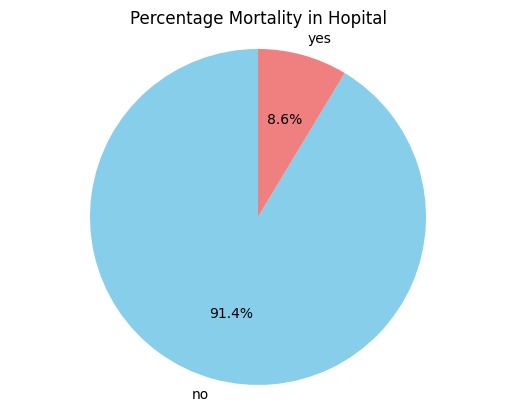

In [103]:
plt.pie(df.hospital_death.value_counts(), labels=df.hospital_death.value_counts().index, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightcoral'])
plt.axis('equal') 
plt.title('Percentage Mortality in Hopital')  

plt.show()

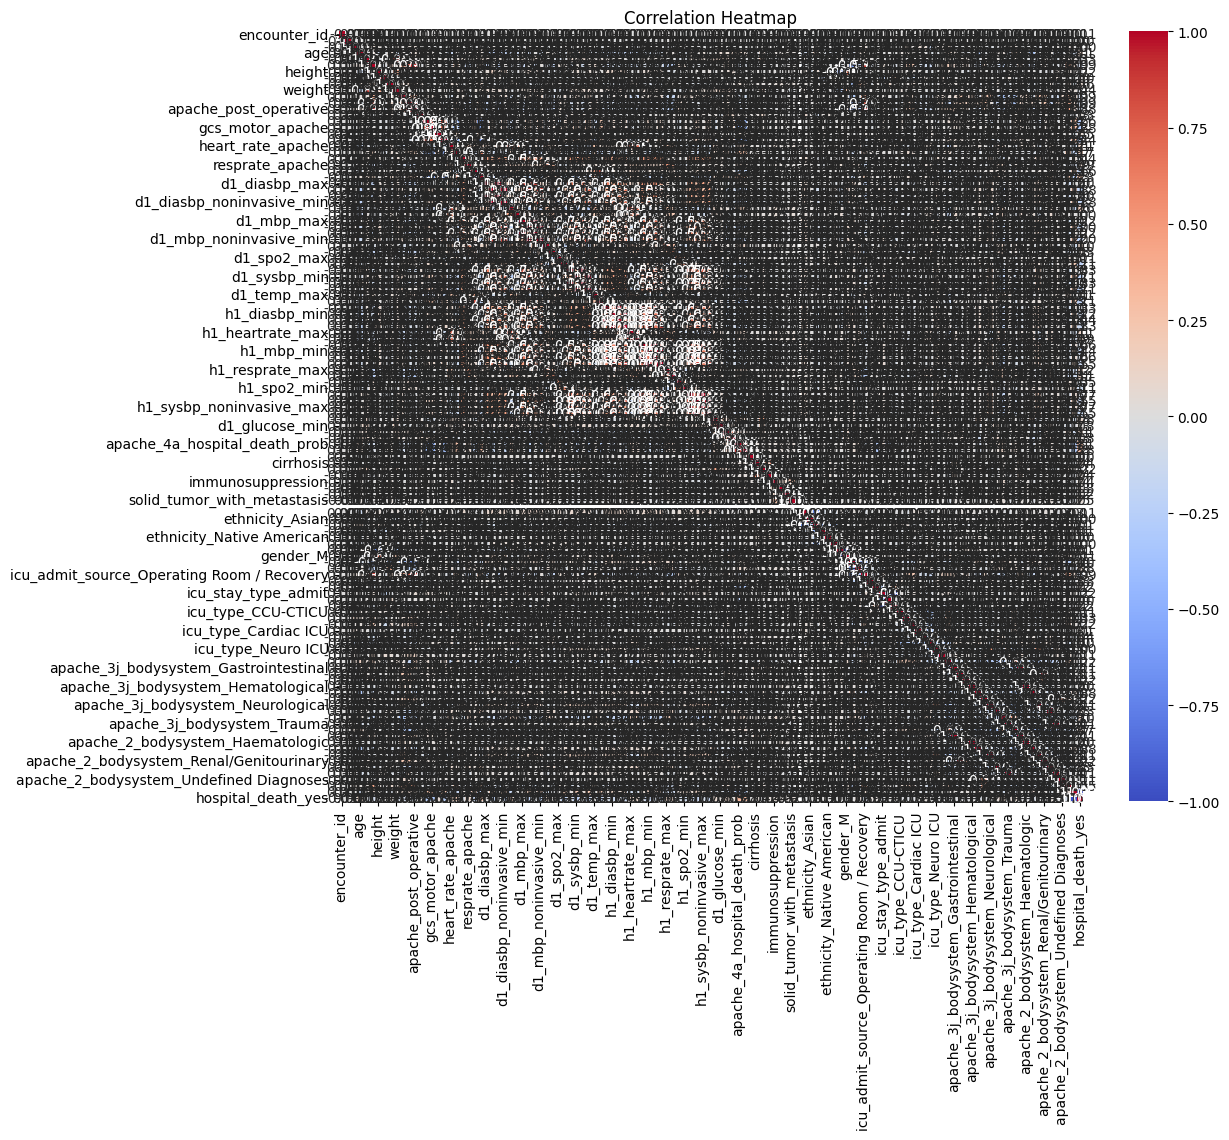

In [104]:
df_encoded = pd.get_dummies(df)

# Compute correlation matrix
correlation_matrix = df_encoded.corr()

# Plot heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

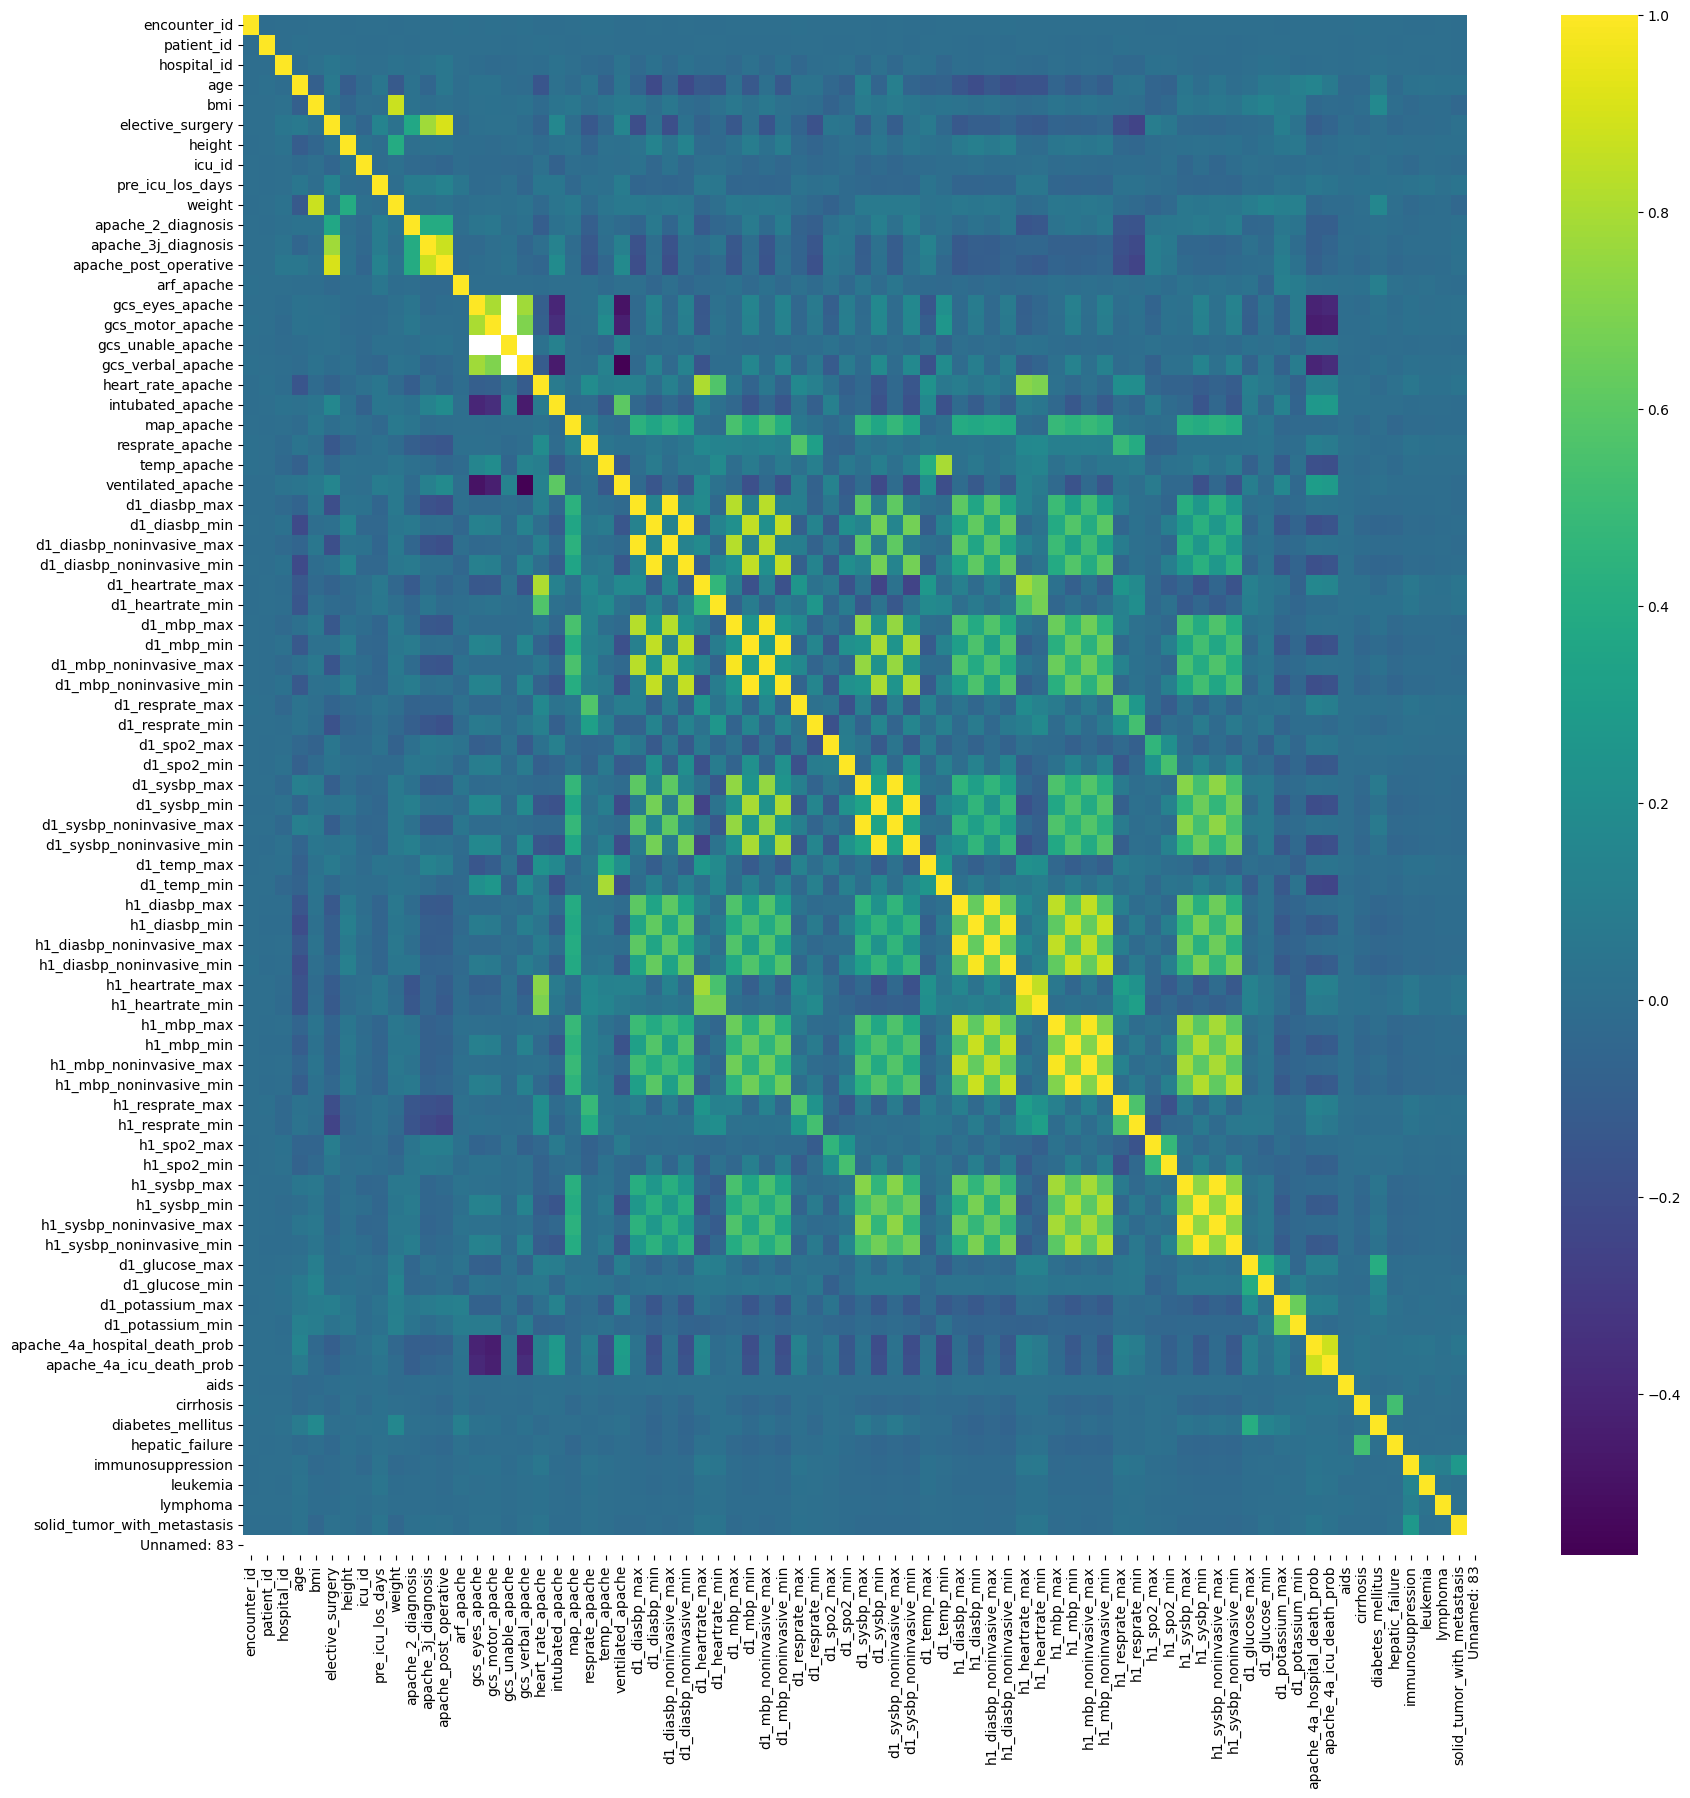

In [105]:
numeric_df = df.select_dtypes(include='number')

plt.figure(figsize=(20, 20))
heatmap = sns.heatmap(numeric_df.corr(), cmap='viridis')

AGE

0    68.0
1    77.0
2    25.0
3    81.0
4    19.0
Name: age, dtype: float64
count    87485.000000
mean        62.309516
std         16.775119
min         16.000000
25%         52.000000
50%         65.000000
75%         75.000000
max         89.000000
Name: age, dtype: float64



/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warn

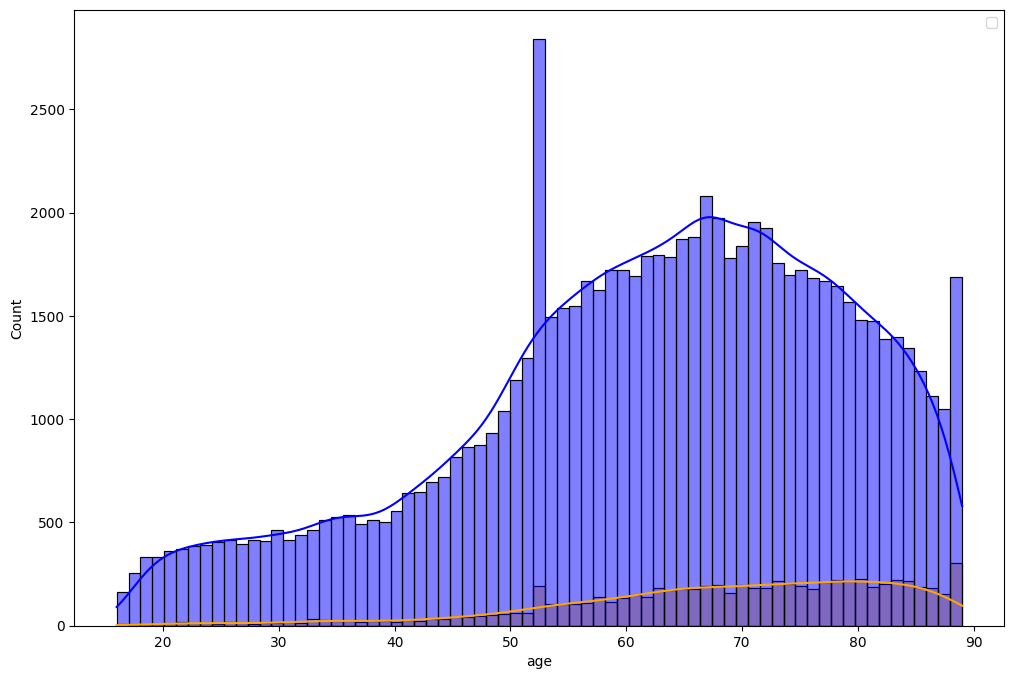

_______________________________________________________________________________
BMI

0    22.73
1    27.42
2    31.95
3    22.64
4      NaN
Name: bmi, dtype: float64
count    88284.000000
mean        29.185818
std          8.275142
min         14.844926
25%         23.641975
50%         27.654655
75%         32.930206
max         67.814990
Name: bmi, dtype: float64



/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warn

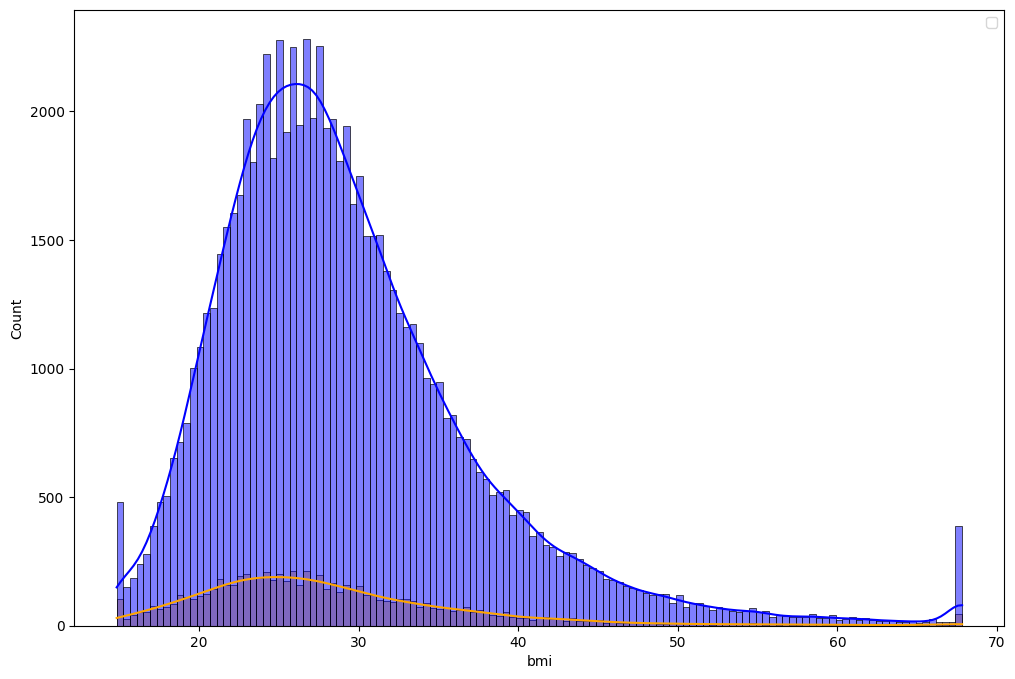

_______________________________________________________________________________
ELECTIVE_SURGERY

0    0
1    0
2    0
3    1
4    0
Name: elective_surgery, dtype: int64
count    91713.000000
mean         0.183736
std          0.387271
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: elective_surgery, dtype: float64



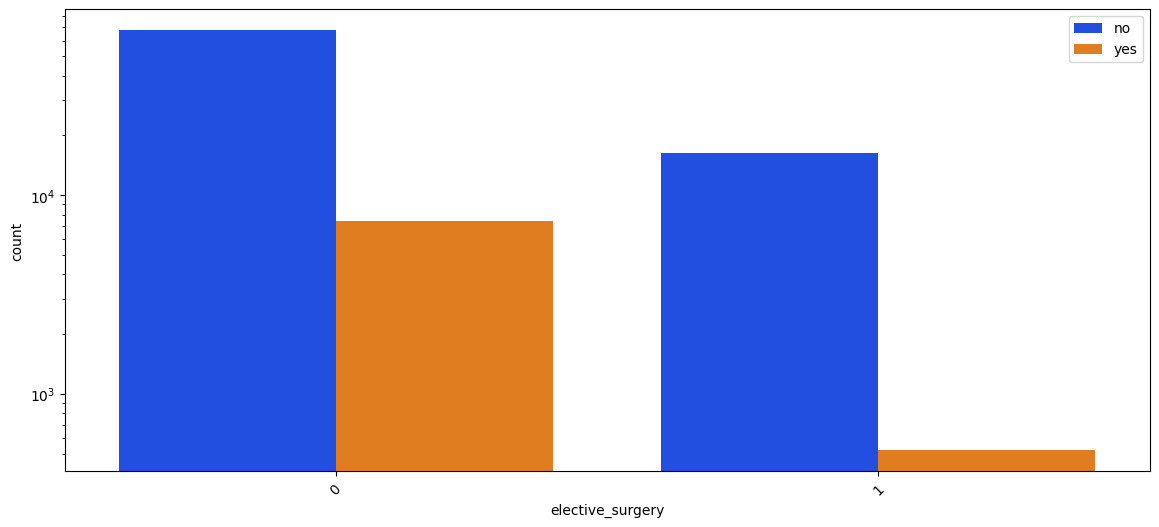

_______________________________________________________________________________
ETHNICITY

0    Caucasian
1    Caucasian
2    Caucasian
3    Caucasian
4    Caucasian
Name: ethnicity, dtype: object
count         90318
unique            6
top       Caucasian
freq          70684
Name: ethnicity, dtype: object



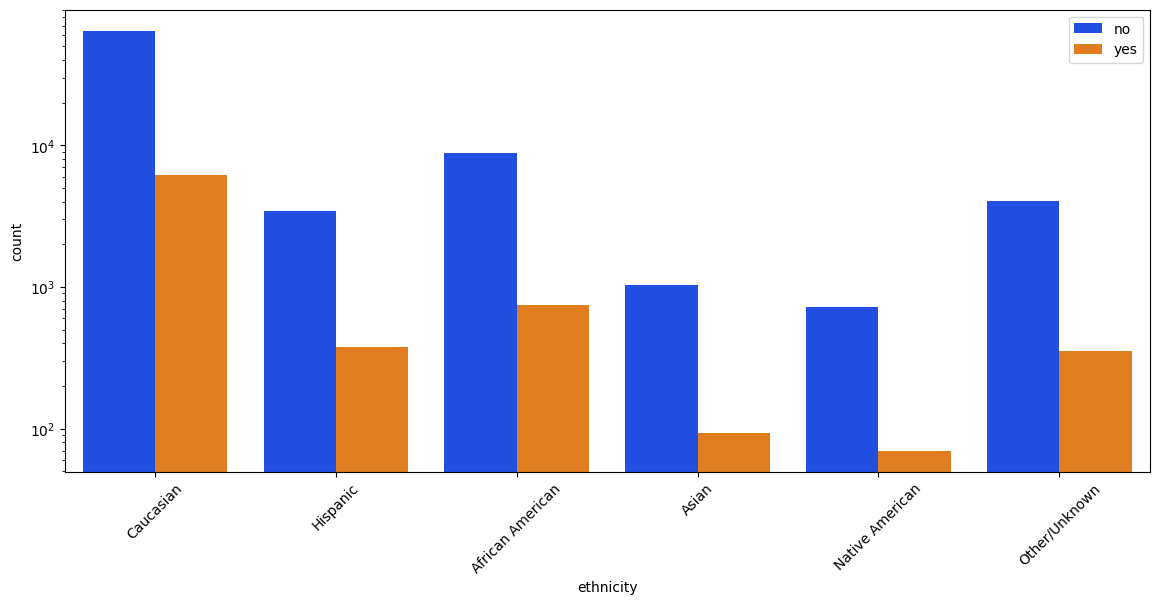

_______________________________________________________________________________
GENDER

0    M
1    F
2    F
3    F
4    M
Name: gender, dtype: object
count     91688
unique        2
top           M
freq      49469
Name: gender, dtype: object



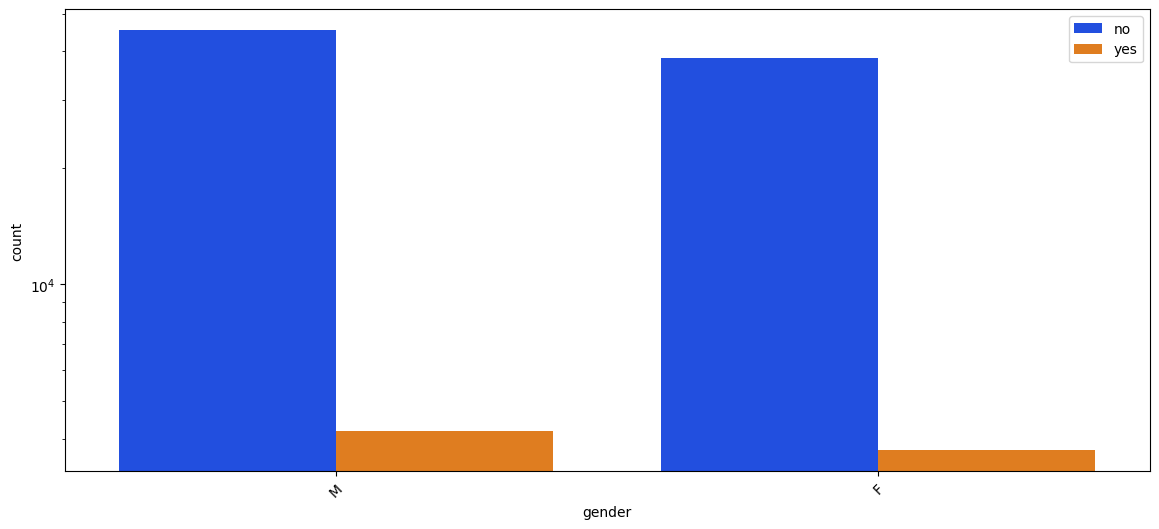

_______________________________________________________________________________
HEIGHT

0    180.3
1    160.0
2    172.7
3    165.1
4    188.0
Name: height, dtype: float64
count    90379.000000
mean       169.641588
std         10.795378
min        137.200000
25%        162.500000
50%        170.100000
75%        177.800000
max        195.590000
Name: height, dtype: float64



/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warn

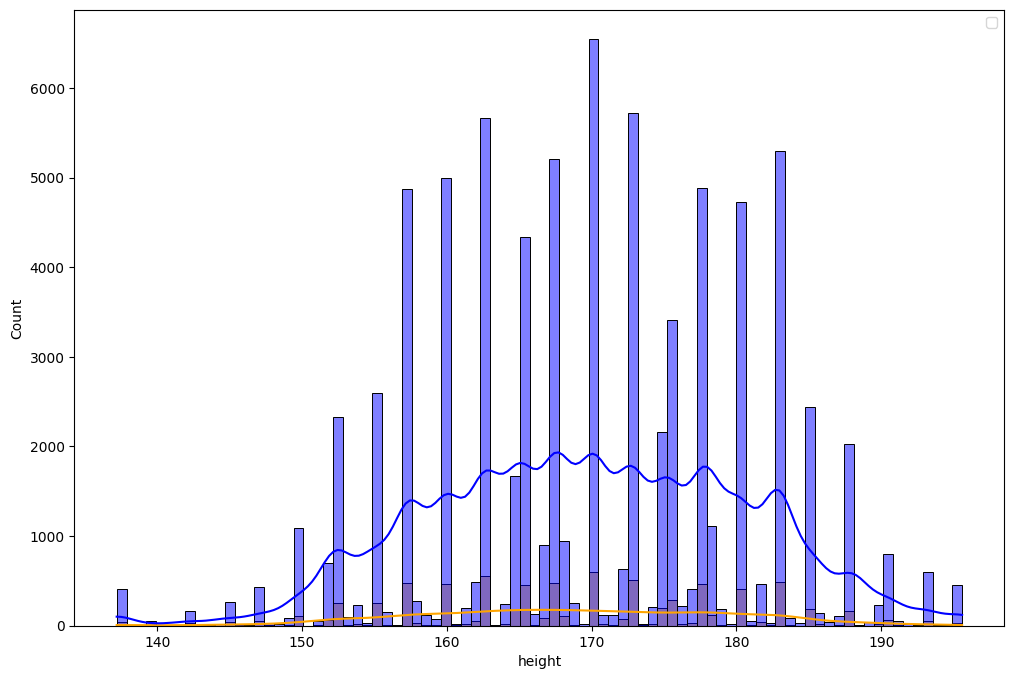

_______________________________________________________________________________
ICU_ADMIT_SOURCE

0                        Floor
1                        Floor
2         Accident & Emergency
3    Operating Room / Recovery
4         Accident & Emergency
Name: icu_admit_source, dtype: object
count                    91601
unique                       5
top       Accident & Emergency
freq                     54060
Name: icu_admit_source, dtype: object



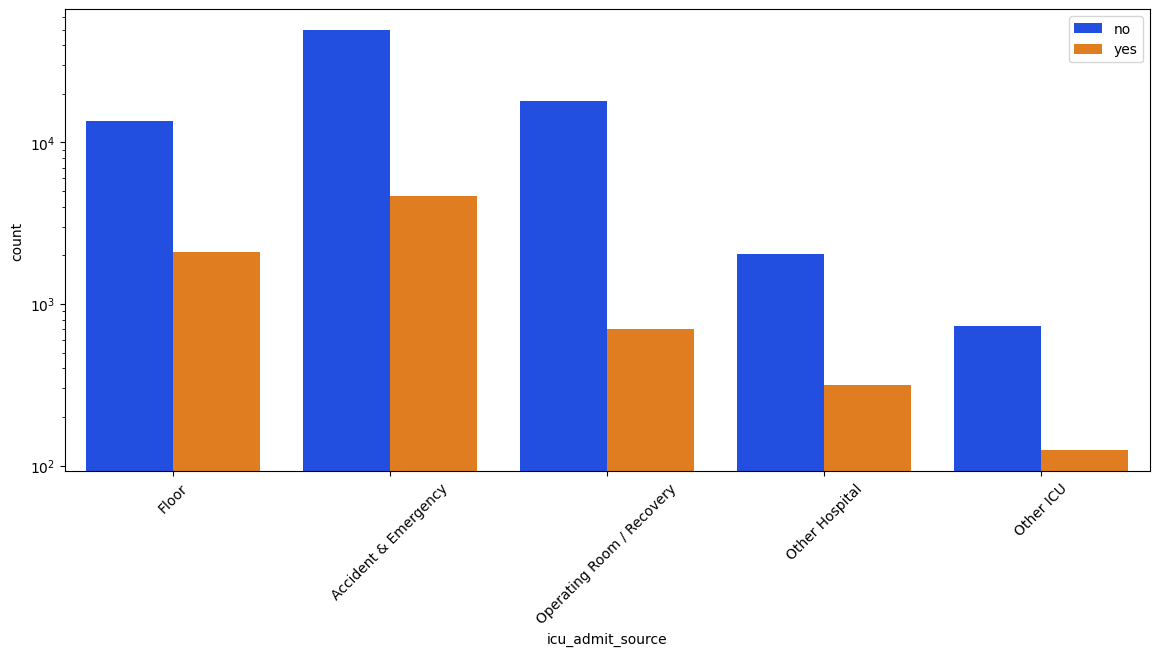

_______________________________________________________________________________
ICU_ID

0    92
1    90
2    93
3    92
4    91
Name: icu_id, dtype: int64
count    91713.000000
mean       508.357692
std        228.989661
min         82.000000
25%        369.000000
50%        504.000000
75%        679.000000
max        927.000000
Name: icu_id, dtype: float64



/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warn

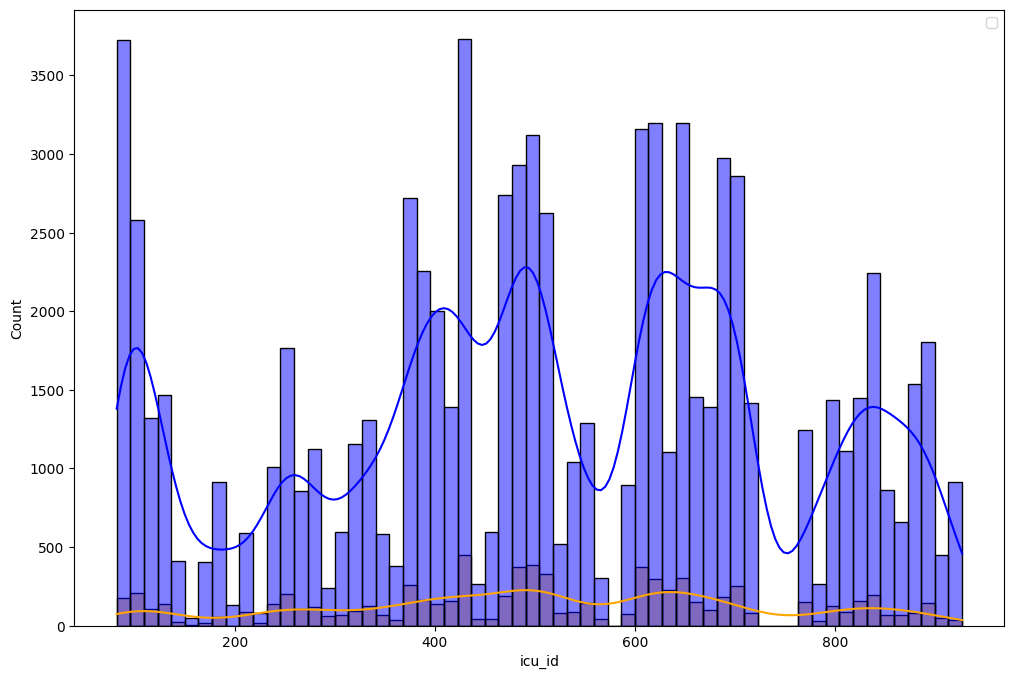

_______________________________________________________________________________
ICU_STAY_TYPE

0    admit
1    admit
2    admit
3    admit
4    admit
Name: icu_stay_type, dtype: object
count     91713
unique        3
top       admit
freq      86183
Name: icu_stay_type, dtype: object



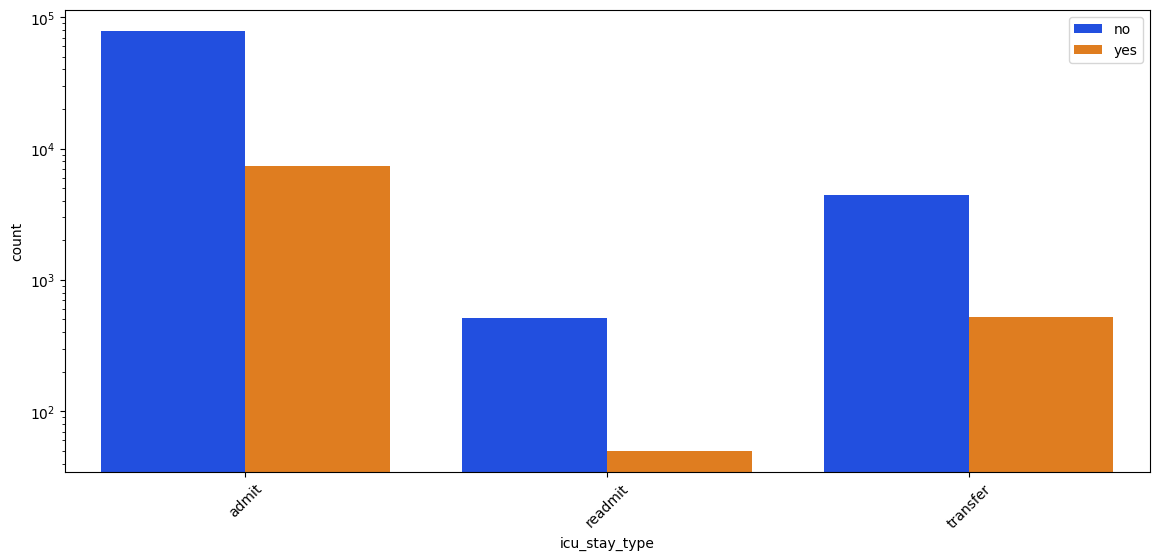

_______________________________________________________________________________
ICU_TYPE

0           CTICU
1    Med-Surg ICU
2    Med-Surg ICU
3           CTICU
4    Med-Surg ICU
Name: icu_type, dtype: object
count            91713
unique               8
top       Med-Surg ICU
freq             50586
Name: icu_type, dtype: object



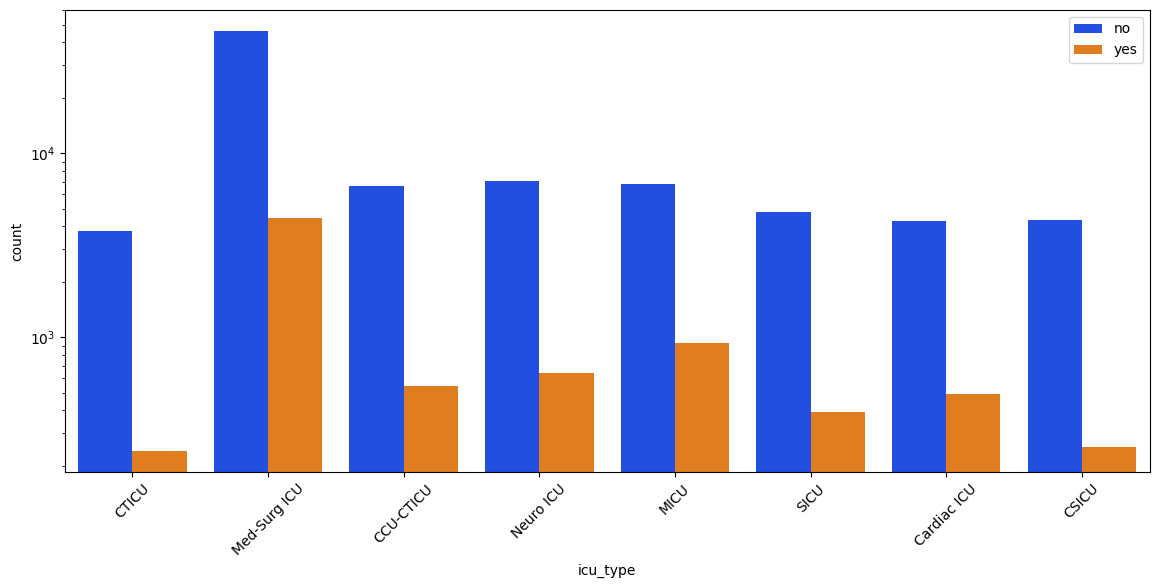

_______________________________________________________________________________
PRE_ICU_LOS_DAYS

0    0.541667
1    0.927778
2    0.000694
3    0.000694
4    0.073611
Name: pre_icu_los_days, dtype: float64
count    91713.000000
mean         0.835766
std          2.487756
min        -24.947222
25%          0.035417
50%          0.138889
75%          0.409028
max        159.090972
Name: pre_icu_los_days, dtype: float64



/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warn

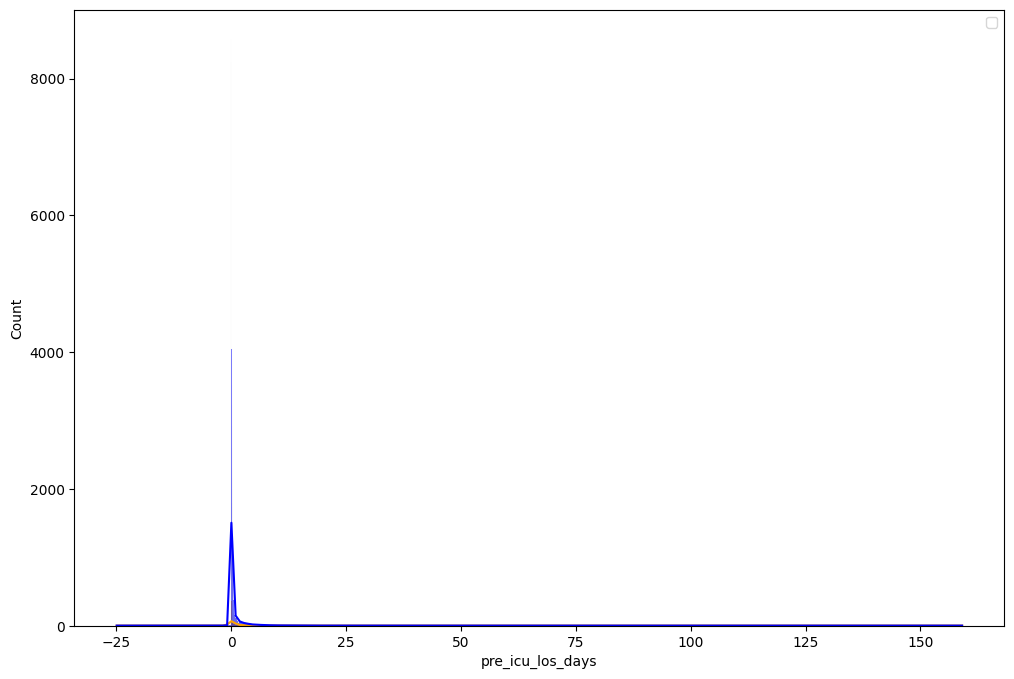

_______________________________________________________________________________
WEIGHT

0    73.9
1    70.2
2    95.3
3    61.7
4     NaN
Name: weight, dtype: float64
count    88993.000000
mean        84.028340
std         25.011497
min         38.600000
25%         66.800000
50%         80.300000
75%         97.100000
max        186.000000
Name: weight, dtype: float64



/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warn

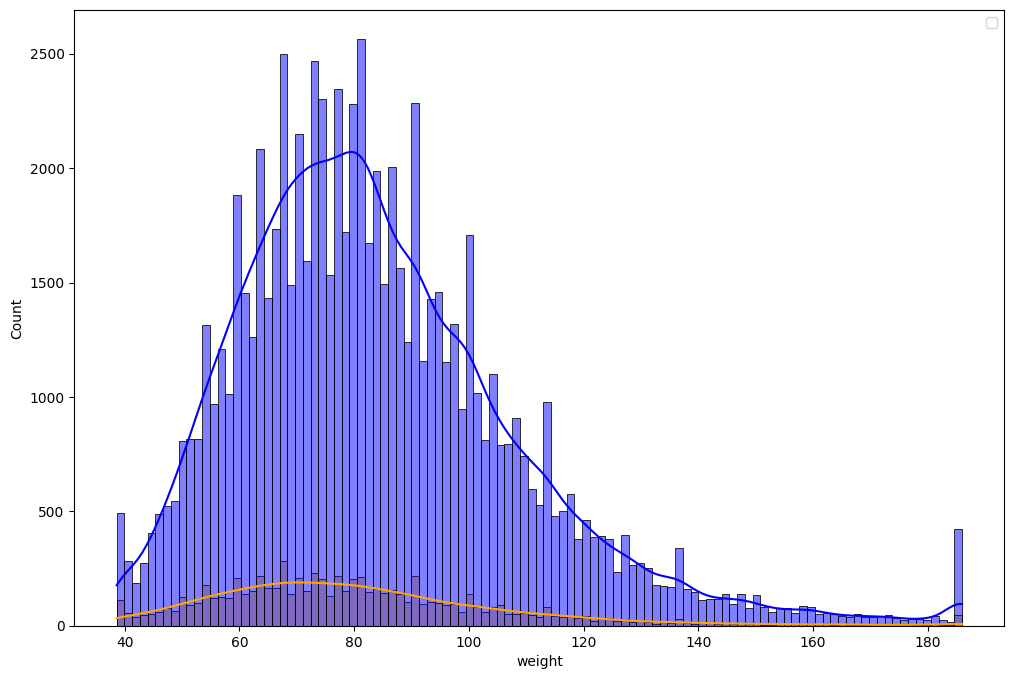

_______________________________________________________________________________
APACHE_2_DIAGNOSIS

0    113.0
1    108.0
2    122.0
3    203.0
4    119.0
Name: apache_2_diagnosis, dtype: float64
count    90051.000000
mean       185.401739
std         86.050882
min        101.000000
25%        113.000000
50%        122.000000
75%        301.000000
max        308.000000
Name: apache_2_diagnosis, dtype: float64



/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warn

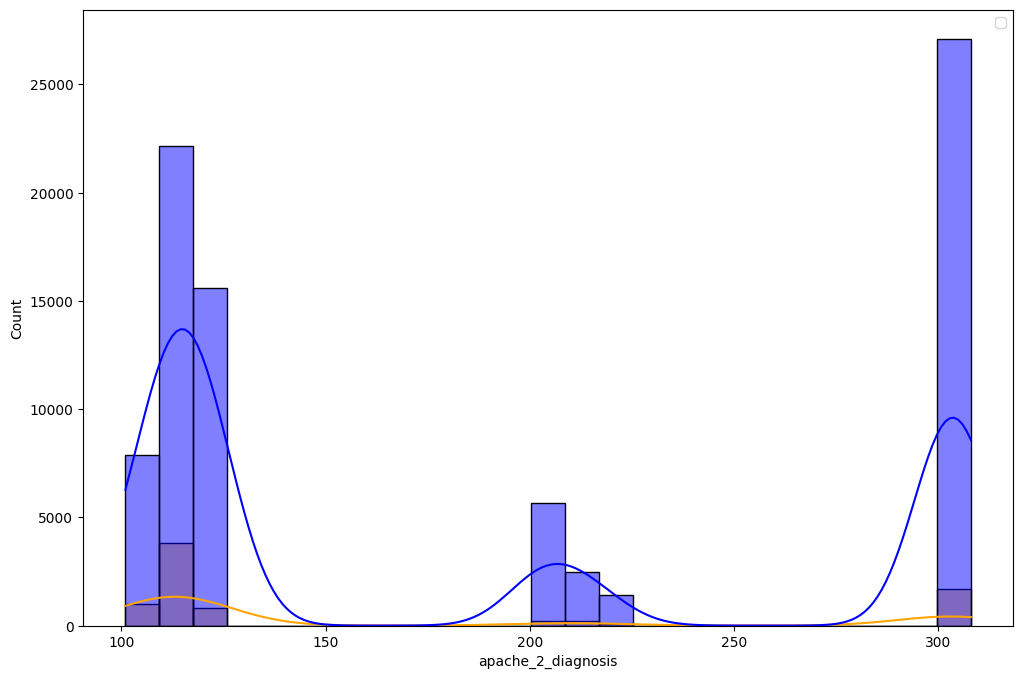

_______________________________________________________________________________
APACHE_3J_DIAGNOSIS

0     502.01
1     203.01
2     703.03
3    1206.03
4     601.01
Name: apache_3j_diagnosis, dtype: float64
count    90612.000000
mean       558.216377
std        463.266985
min          0.010000
25%        203.010000
50%        409.020000
75%        703.030000
max       2201.050000
Name: apache_3j_diagnosis, dtype: float64



/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warn

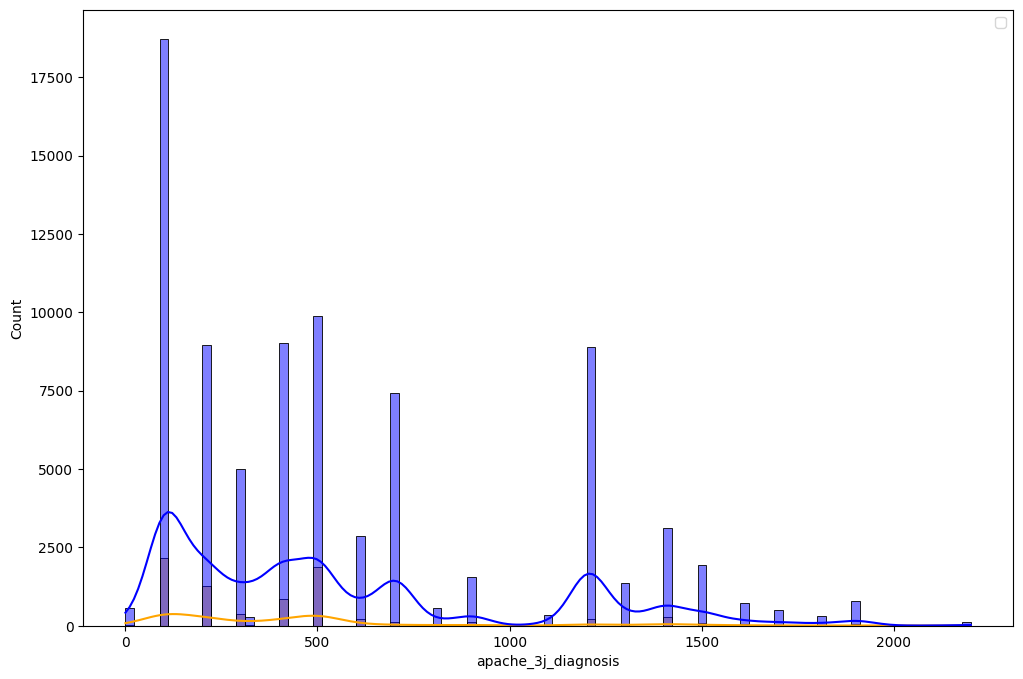

_______________________________________________________________________________
APACHE_POST_OPERATIVE

0    0
1    0
2    0
3    1
4    0
Name: apache_post_operative, dtype: int64
count    91713.000000
mean         0.201106
std          0.400829
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: apache_post_operative, dtype: float64



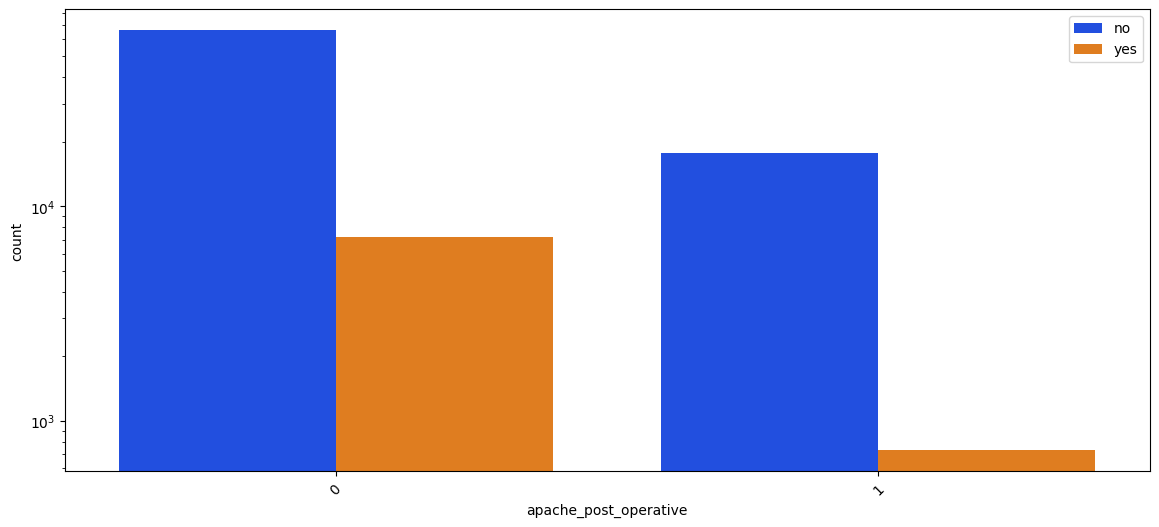

_______________________________________________________________________________
ARF_APACHE

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: arf_apache, dtype: float64
count    90998.000000
mean         0.027979
std          0.164912
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: arf_apache, dtype: float64



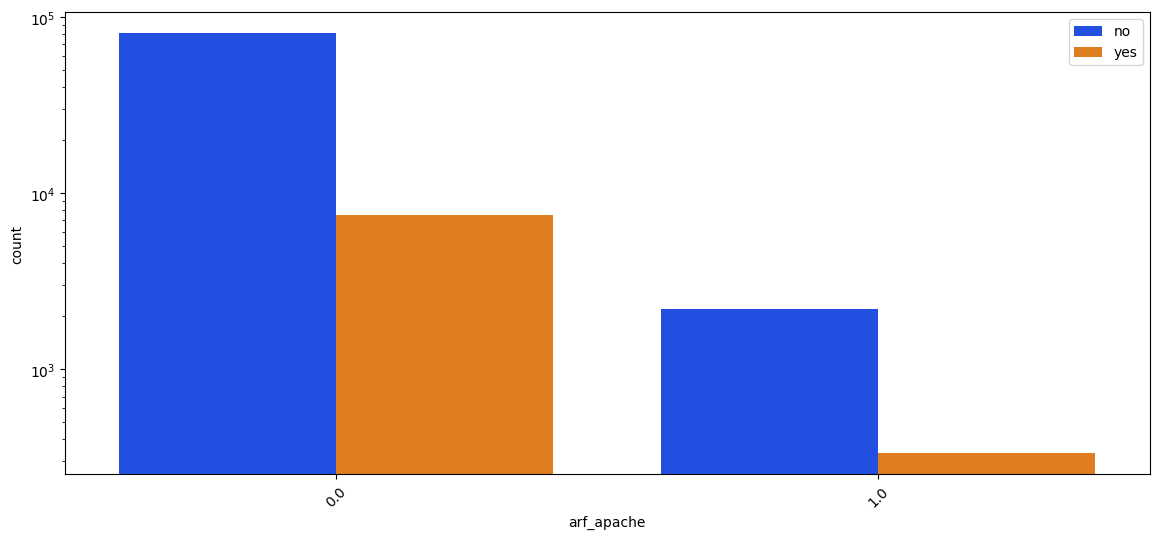

_______________________________________________________________________________
GCS_EYES_APACHE

0    3.0
1    1.0
2    3.0
3    4.0
4    NaN
Name: gcs_eyes_apache, dtype: float64
count    89812.000000
mean         3.465049
std          0.951715
min          1.000000
25%          3.000000
50%          4.000000
75%          4.000000
max          4.000000
Name: gcs_eyes_apache, dtype: float64



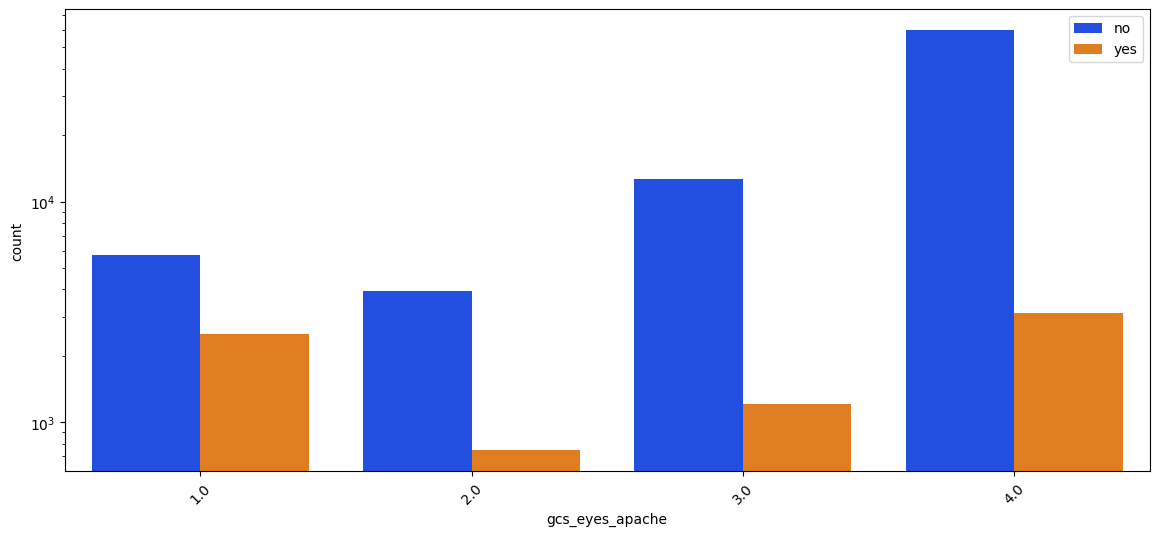

_______________________________________________________________________________
GCS_MOTOR_APACHE

0    6.0
1    3.0
2    6.0
3    6.0
4    NaN
Name: gcs_motor_apache, dtype: float64
count    89812.000000
mean         5.471195
std          1.288376
min          1.000000
25%          6.000000
50%          6.000000
75%          6.000000
max          6.000000
Name: gcs_motor_apache, dtype: float64



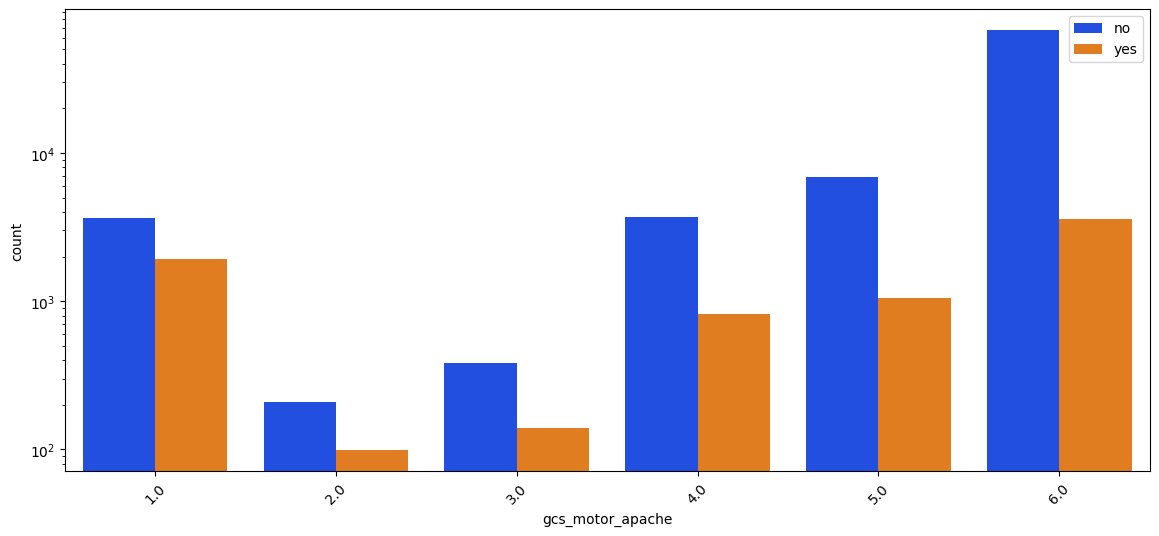

_______________________________________________________________________________
GCS_UNABLE_APACHE

0    0.0
1    0.0
2    0.0
3    0.0
4    NaN
Name: gcs_unable_apache, dtype: float64
count    90676.000000
mean         0.009528
std          0.097148
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: gcs_unable_apache, dtype: float64



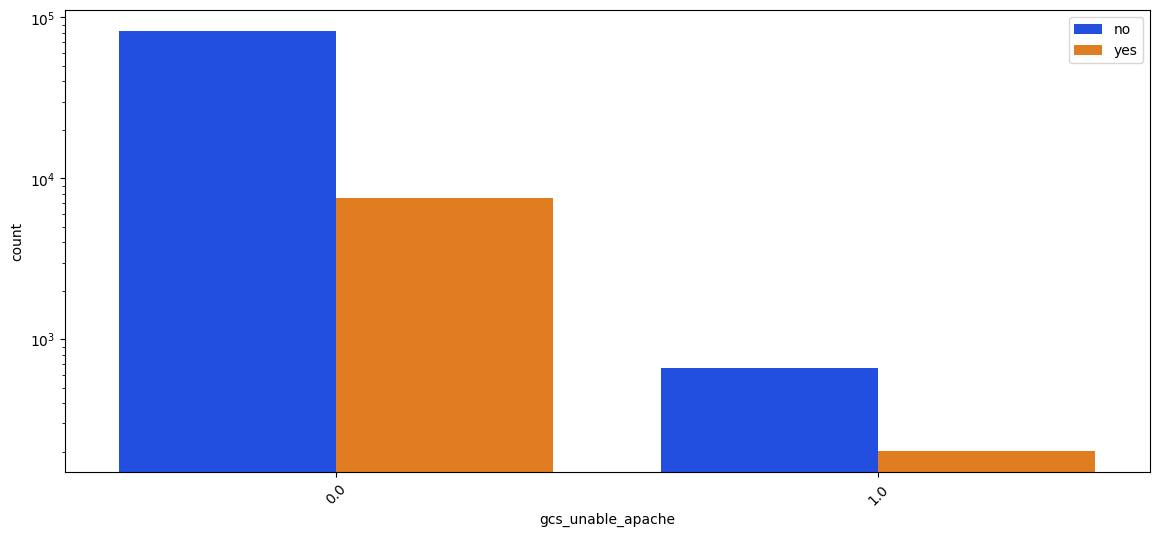

_______________________________________________________________________________
GCS_VERBAL_APACHE

0    4.0
1    1.0
2    5.0
3    5.0
4    NaN
Name: gcs_verbal_apache, dtype: float64
count    89812.000000
mean         3.994778
std          1.560166
min          1.000000
25%          4.000000
50%          5.000000
75%          5.000000
max          5.000000
Name: gcs_verbal_apache, dtype: float64



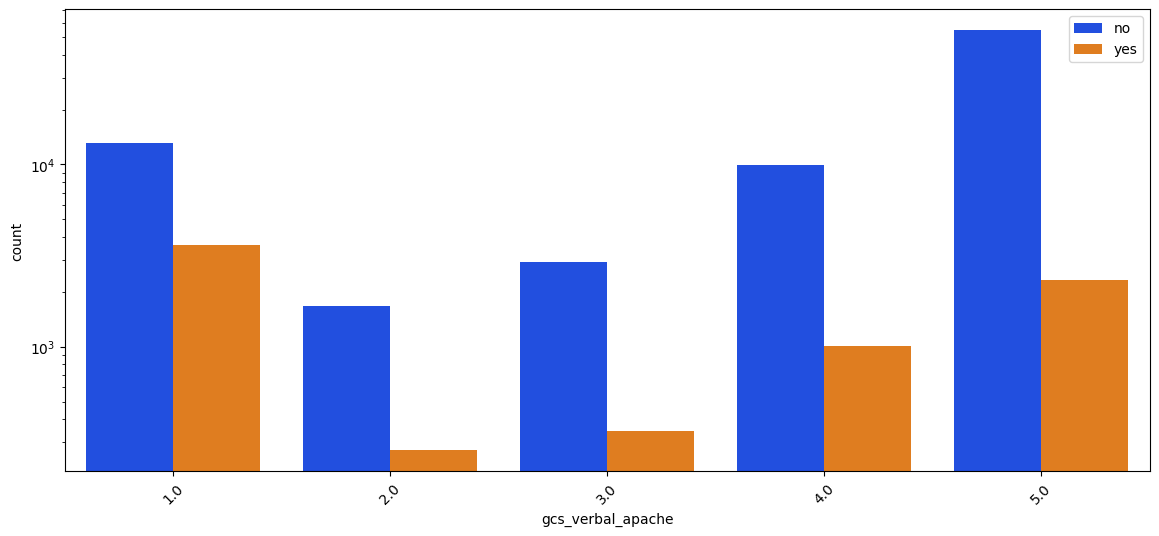

_______________________________________________________________________________
HEART_RATE_APACHE

0    118.0
1    120.0
2    102.0
3    114.0
4     60.0
Name: heart_rate_apache, dtype: float64
count    90835.000000
mean        99.707932
std         30.870502
min         30.000000
25%         86.000000
50%        104.000000
75%        120.000000
max        178.000000
Name: heart_rate_apache, dtype: float64



/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warn

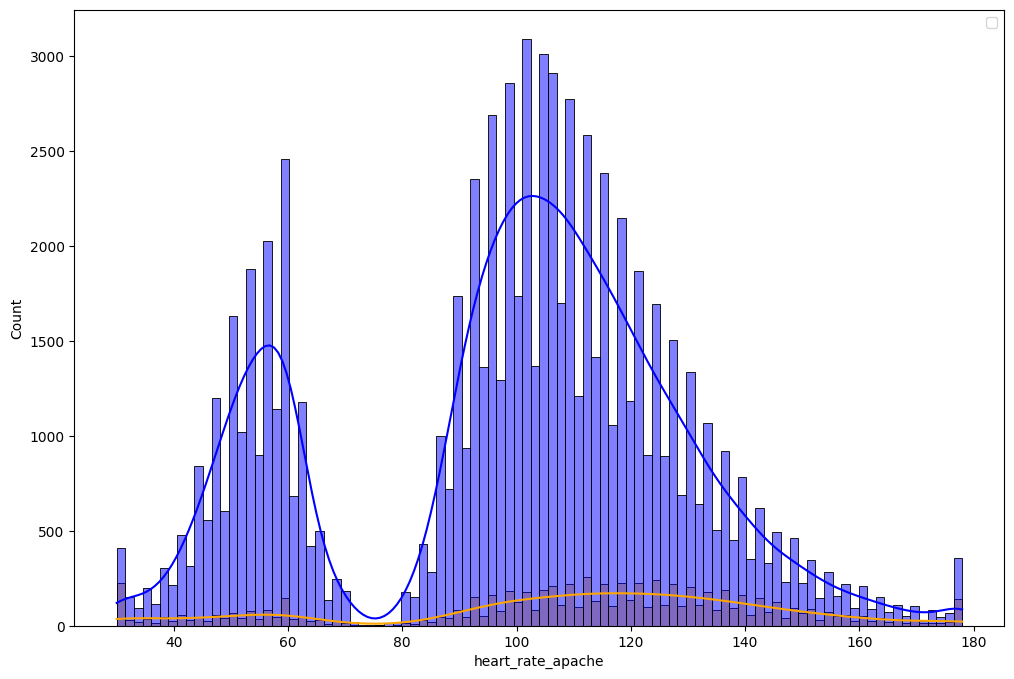

_______________________________________________________________________________
INTUBATED_APACHE

0    0.0
1    0.0
2    0.0
3    1.0
4    0.0
Name: intubated_apache, dtype: float64
count    90998.000000
mean         0.151223
std          0.358268
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: intubated_apache, dtype: float64



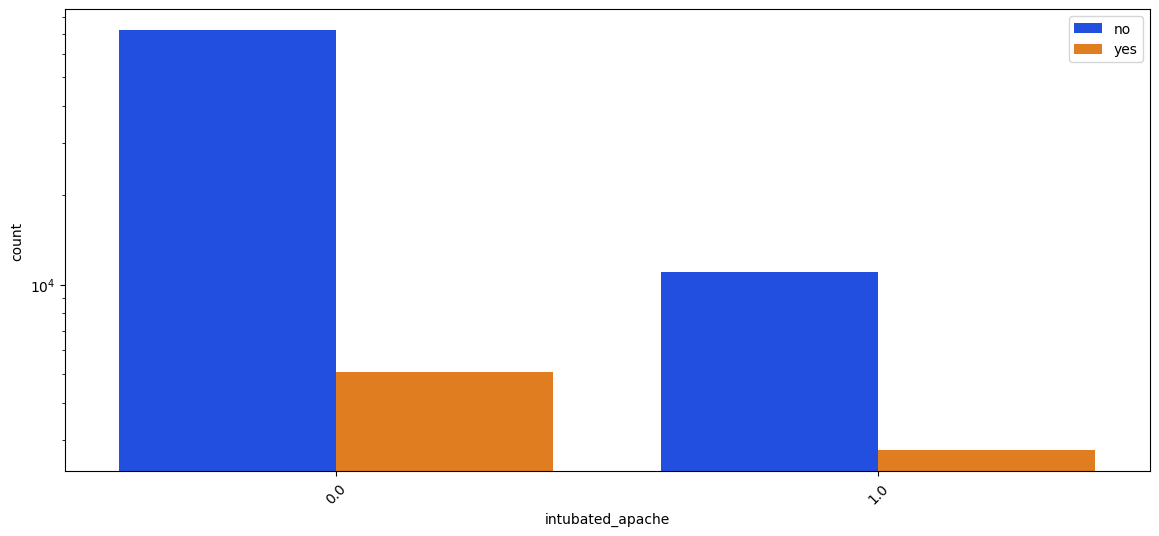

_______________________________________________________________________________
MAP_APACHE

0     40.0
1     46.0
2     68.0
3     60.0
4    103.0
Name: map_apache, dtype: float64
count    90719.000000
mean        88.015873
std         42.032412
min         40.000000
25%         54.000000
50%         67.000000
75%        125.000000
max        200.000000
Name: map_apache, dtype: float64



/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warn

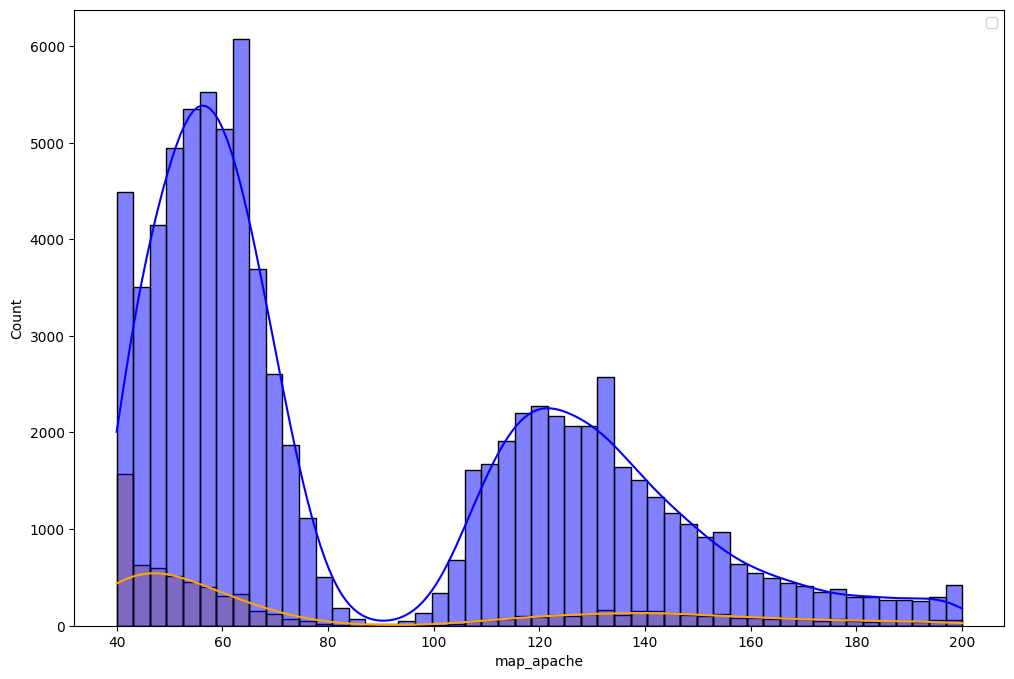

_______________________________________________________________________________
RESPRATE_APACHE

0    36.0
1    33.0
2    37.0
3     4.0
4    16.0
Name: resprate_apache, dtype: float64
count    90479.000000
mean        25.811007
std         15.106312
min          4.000000
25%         11.000000
50%         28.000000
75%         36.000000
max         60.000000
Name: resprate_apache, dtype: float64



/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warn

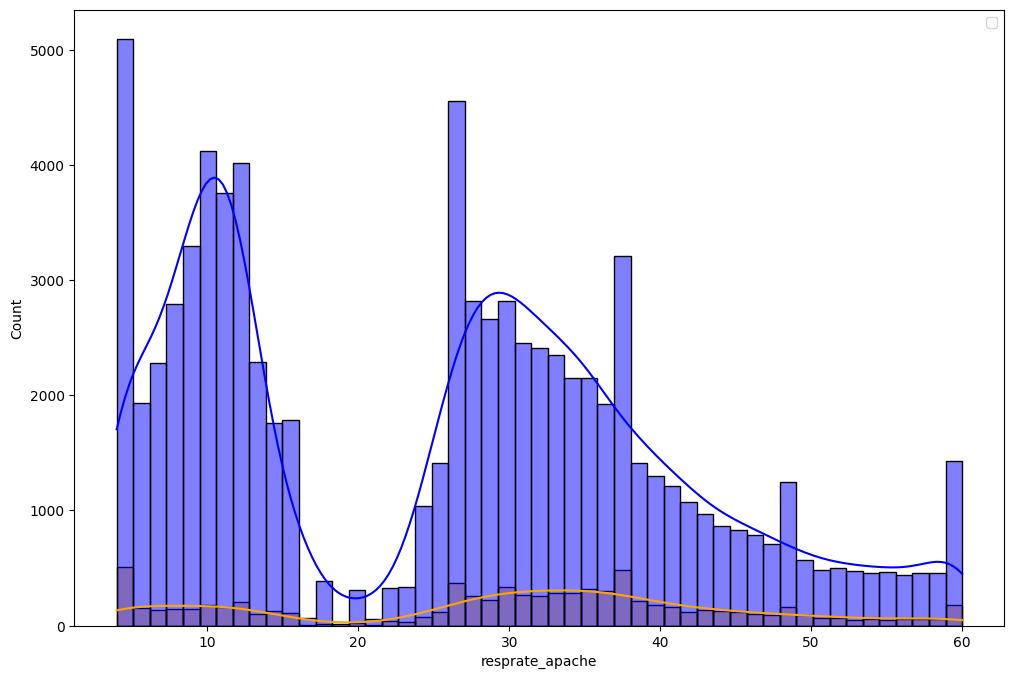

_______________________________________________________________________________
TEMP_APACHE

0    39.3
1    35.1
2    36.7
3    34.8
4    36.7
Name: temp_apache, dtype: float64
count    87605.000000
mean        36.414472
std          0.833496
min         32.100000
25%         36.200000
50%         36.500000
75%         36.700000
max         39.700000
Name: temp_apache, dtype: float64



/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warn

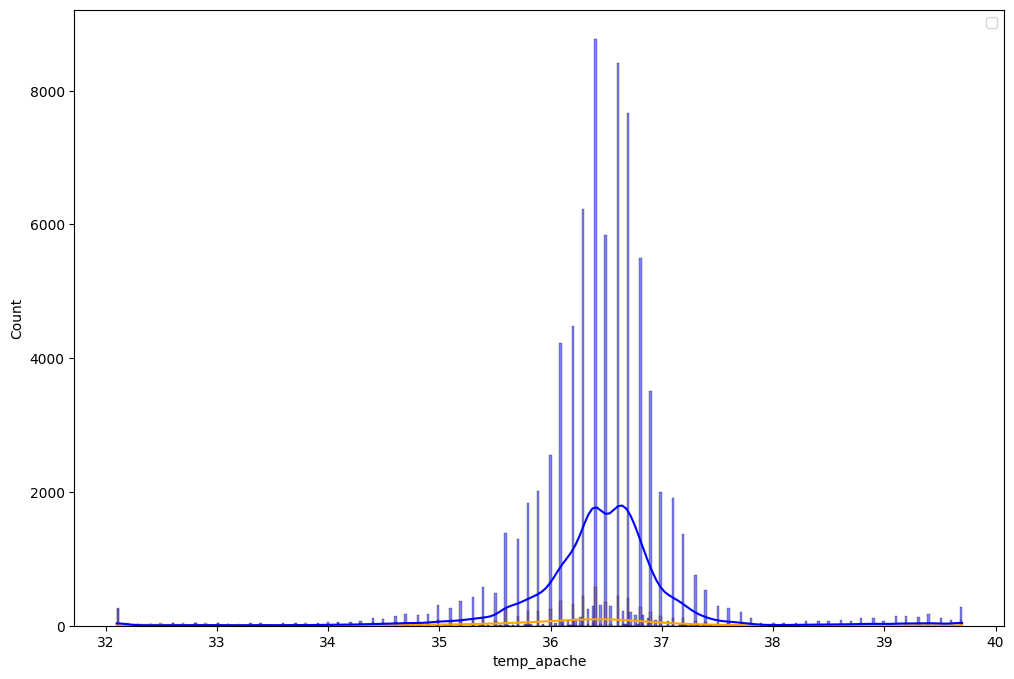

_______________________________________________________________________________
VENTILATED_APACHE

0    0.0
1    1.0
2    0.0
3    1.0
4    0.0
Name: ventilated_apache, dtype: float64
count    90998.000000
mean         0.325721
std          0.468646
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          1.000000
Name: ventilated_apache, dtype: float64



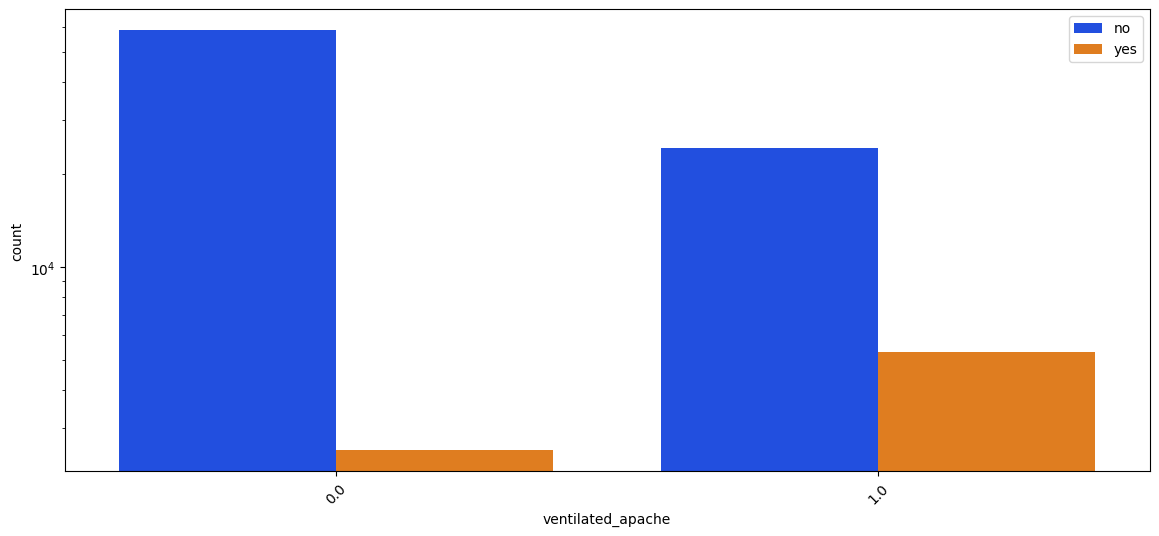

_______________________________________________________________________________
D1_DIASBP_MAX

0    68.0
1    95.0
2    88.0
3    48.0
4    99.0
Name: d1_diasbp_max, dtype: float64
count    91548.000000
mean        88.491873
std         19.798379
min         46.000000
25%         75.000000
50%         86.000000
75%         99.000000
max        165.000000
Name: d1_diasbp_max, dtype: float64



/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warn

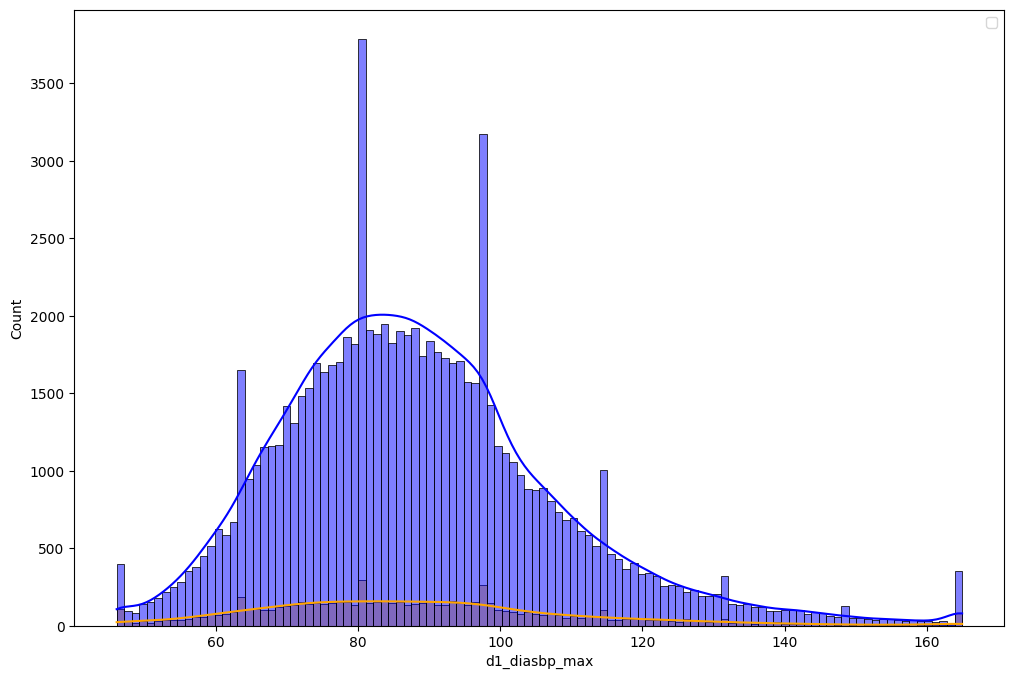

_______________________________________________________________________________
D1_DIASBP_MIN

0    37.0
1    31.0
2    48.0
3    42.0
4    57.0
Name: d1_diasbp_min, dtype: float64
count    91548.000000
mean        50.161314
std         13.317586
min         13.000000
25%         42.000000
50%         50.000000
75%         58.000000
max         90.000000
Name: d1_diasbp_min, dtype: float64



/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warn

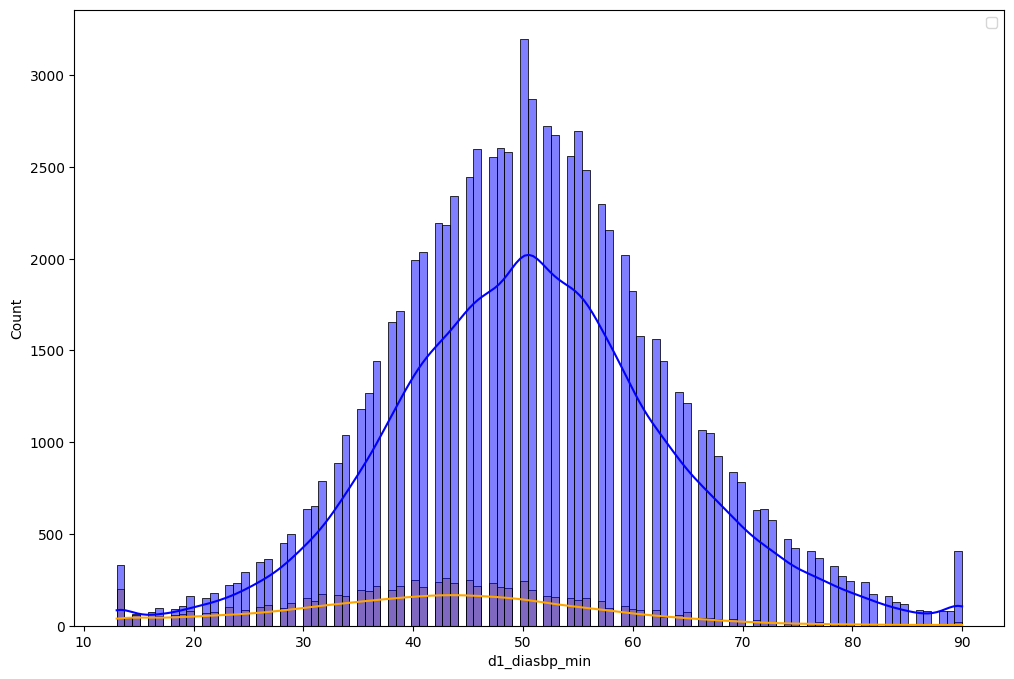

_______________________________________________________________________________
D1_DIASBP_NONINVASIVE_MAX

0    68.0
1    95.0
2    88.0
3    48.0
4    99.0
Name: d1_diasbp_noninvasive_max, dtype: float64
count    90673.000000
mean        88.610513
std         19.793743
min         46.000000
25%         75.000000
50%         87.000000
75%         99.000000
max        165.000000
Name: d1_diasbp_noninvasive_max, dtype: float64



/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warn

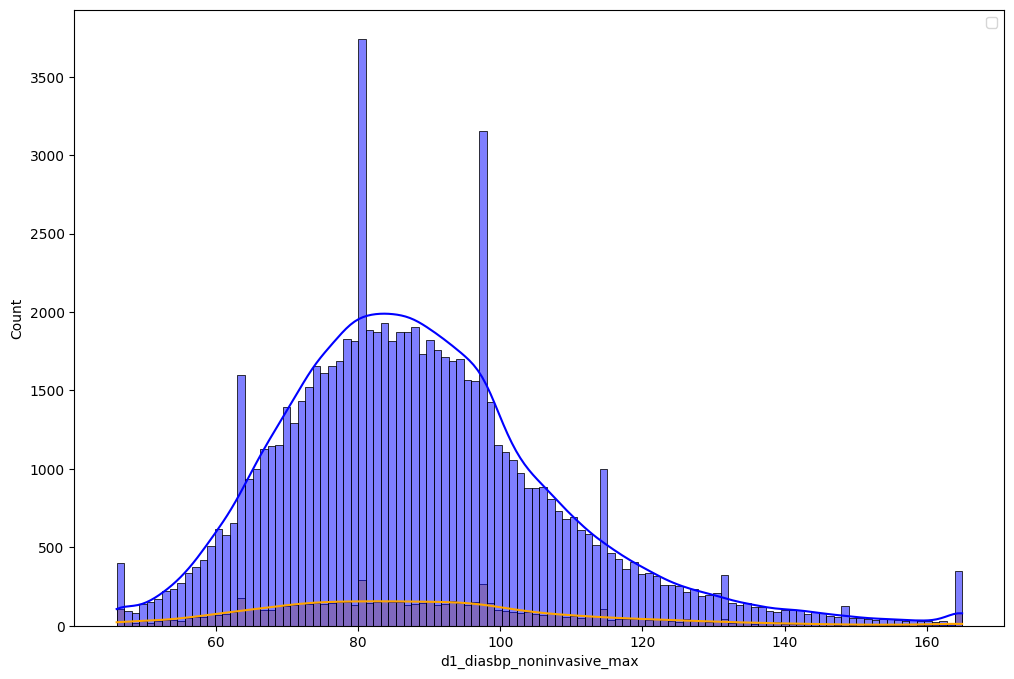

_______________________________________________________________________________
D1_DIASBP_NONINVASIVE_MIN

0    37.0
1    31.0
2    48.0
3    42.0
4    57.0
Name: d1_diasbp_noninvasive_min, dtype: float64
count    90673.000000
mean        50.242597
std         13.341521
min         13.000000
25%         42.000000
50%         50.000000
75%         58.000000
max         90.000000
Name: d1_diasbp_noninvasive_min, dtype: float64



/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warn

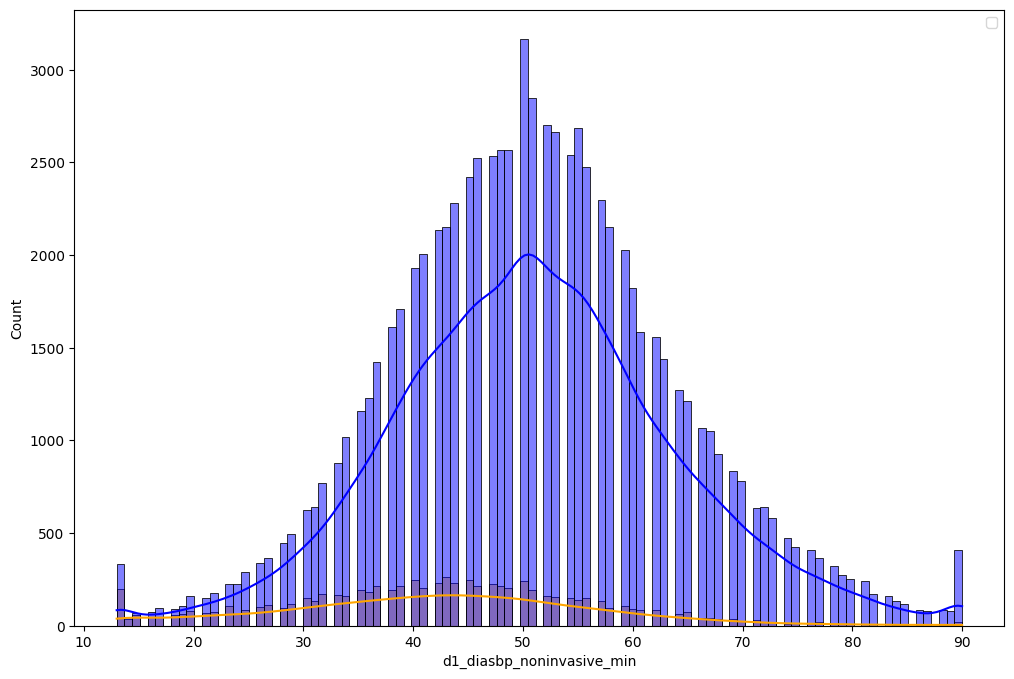

_______________________________________________________________________________
D1_HEARTRATE_MAX

0    119.0
1    118.0
2     96.0
3    116.0
4     89.0
Name: d1_heartrate_max, dtype: float64
count    91568.000000
mean       103.000568
std         22.017346
min         58.000000
25%         87.000000
50%        101.000000
75%        116.000000
max        177.000000
Name: d1_heartrate_max, dtype: float64



/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warn

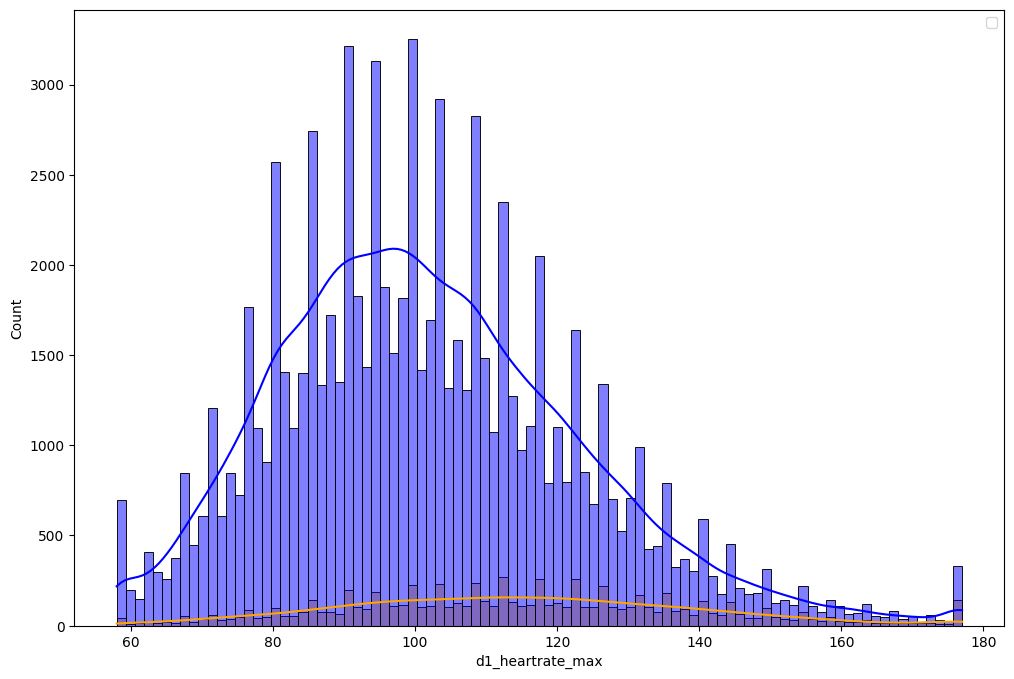

_______________________________________________________________________________
D1_HEARTRATE_MIN

0    72.0
1    72.0
2    68.0
3    92.0
4    60.0
Name: d1_heartrate_min, dtype: float64
count    91568.000000
mean        70.321848
std         17.115903
min          0.000000
25%         60.000000
50%         69.000000
75%         81.000000
max        175.000000
Name: d1_heartrate_min, dtype: float64



/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warn

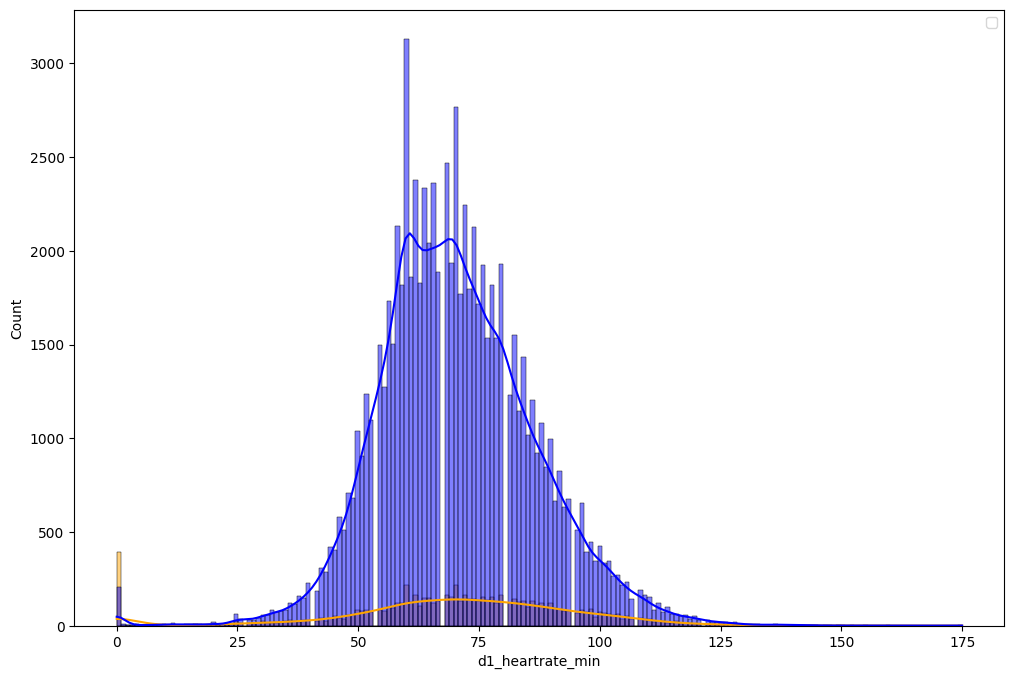

_______________________________________________________________________________
D1_MBP_MAX

0     89.0
1    120.0
2    102.0
3     84.0
4    104.0
Name: d1_mbp_max, dtype: float64
count    91493.000000
mean       104.651339
std         20.808358
min         60.000000
25%         90.000000
50%        102.000000
75%        116.000000
max        184.000000
Name: d1_mbp_max, dtype: float64



/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warn

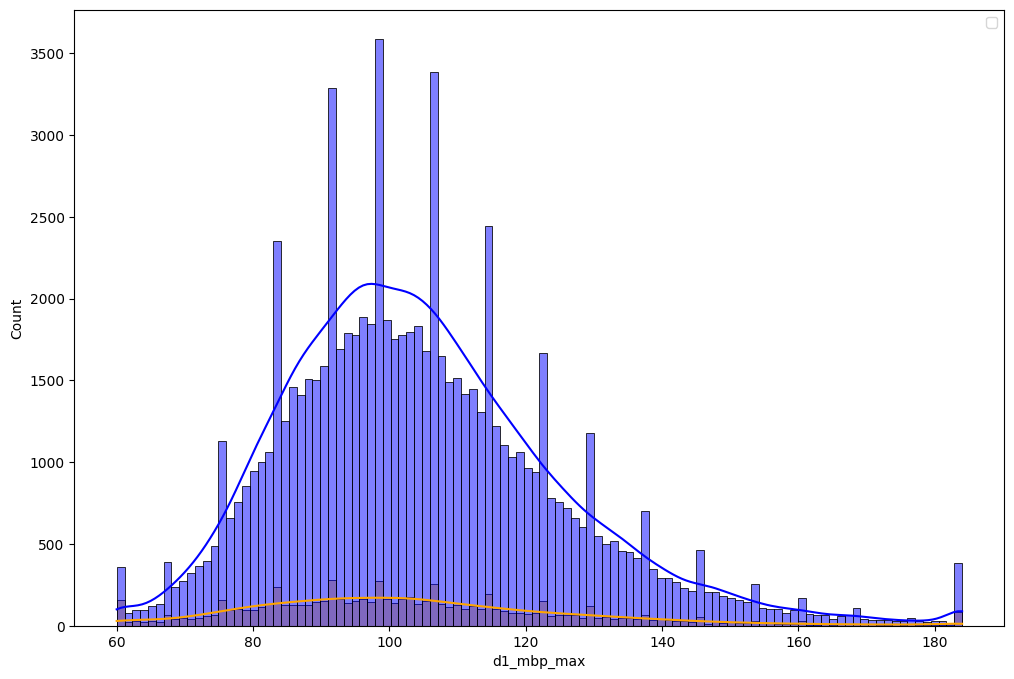

_______________________________________________________________________________
D1_MBP_MIN

0    46.0
1    38.0
2    68.0
3    84.0
4    90.0
Name: d1_mbp_min, dtype: float64
count    91493.000000
mean        64.871859
std         15.679680
min         22.000000
25%         55.000000
50%         64.000000
75%         75.000000
max        112.000000
Name: d1_mbp_min, dtype: float64



/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warn

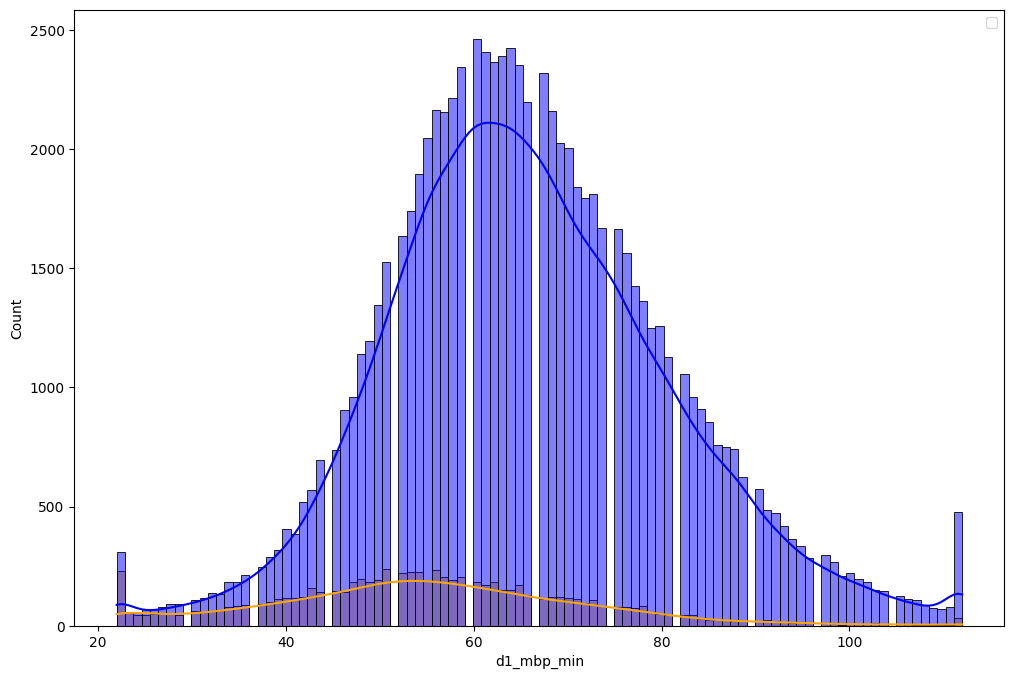

_______________________________________________________________________________
D1_MBP_NONINVASIVE_MAX

0     89.0
1    120.0
2    102.0
3     84.0
4    104.0
Name: d1_mbp_noninvasive_max, dtype: float64
count    90234.000000
mean       104.590454
std         20.701171
min         60.000000
25%         90.000000
50%        102.000000
75%        116.000000
max        181.000000
Name: d1_mbp_noninvasive_max, dtype: float64



/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warn

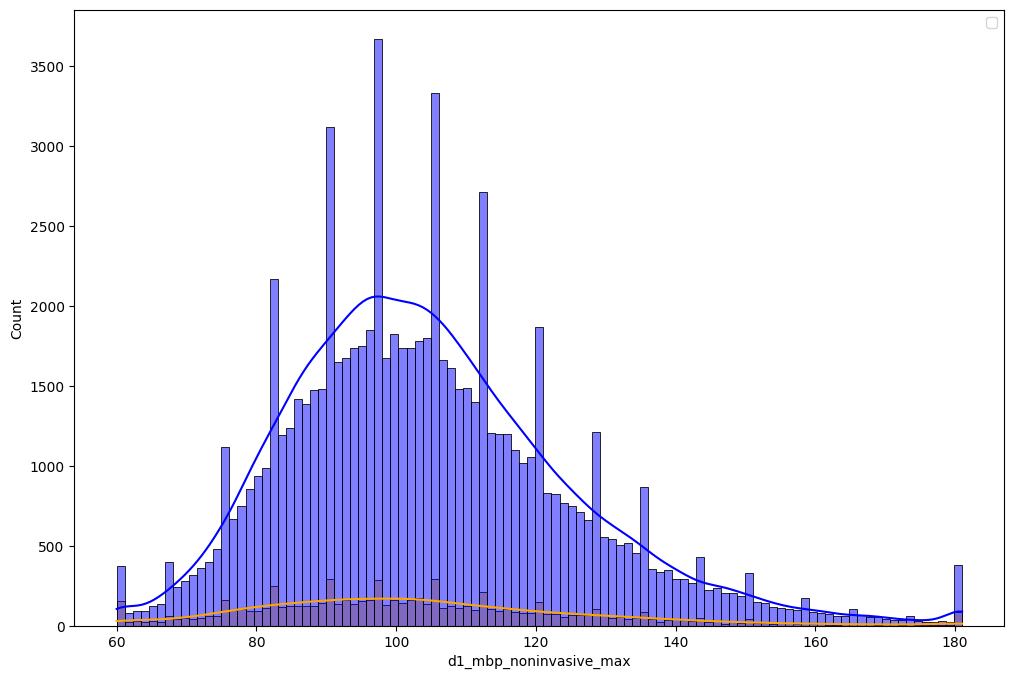

_______________________________________________________________________________
D1_MBP_NONINVASIVE_MIN

0    46.0
1    38.0
2    68.0
3    84.0
4    90.0
Name: d1_mbp_noninvasive_min, dtype: float64
count    90234.000000
mean        64.941541
std         15.701305
min         22.000000
25%         55.000000
50%         64.000000
75%         75.000000
max        112.000000
Name: d1_mbp_noninvasive_min, dtype: float64



/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warn

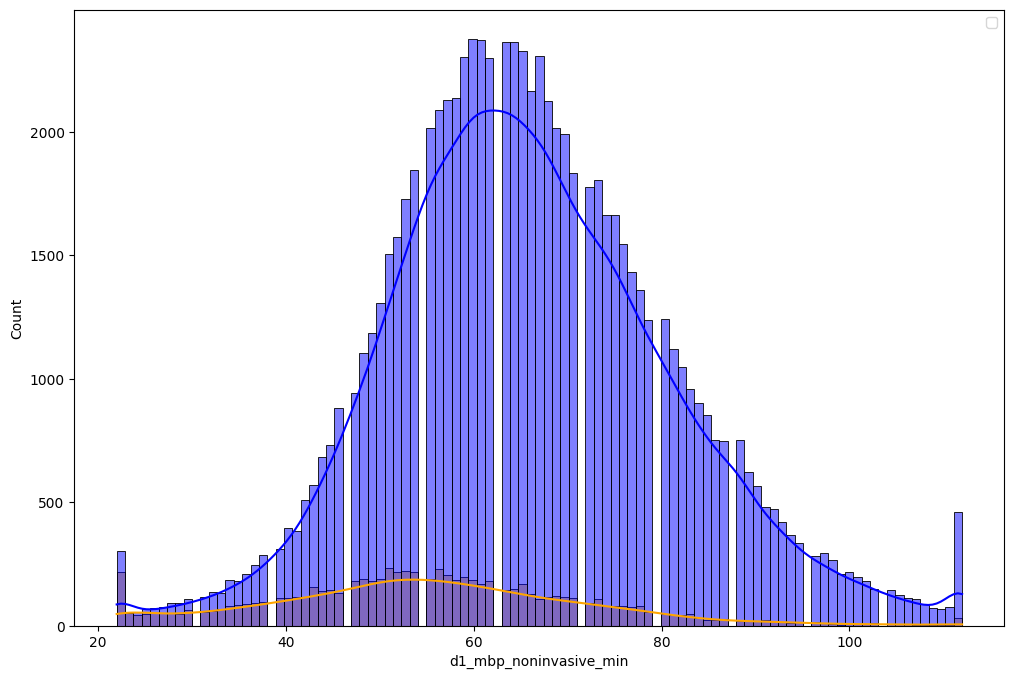

_______________________________________________________________________________
D1_RESPRATE_MAX

0    34.0
1    32.0
2    21.0
3    23.0
4    18.0
Name: d1_resprate_max, dtype: float64
count    91328.000000
mean        28.882774
std         10.701973
min         14.000000
25%         22.000000
50%         26.000000
75%         32.000000
max         92.000000
Name: d1_resprate_max, dtype: float64



/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warn

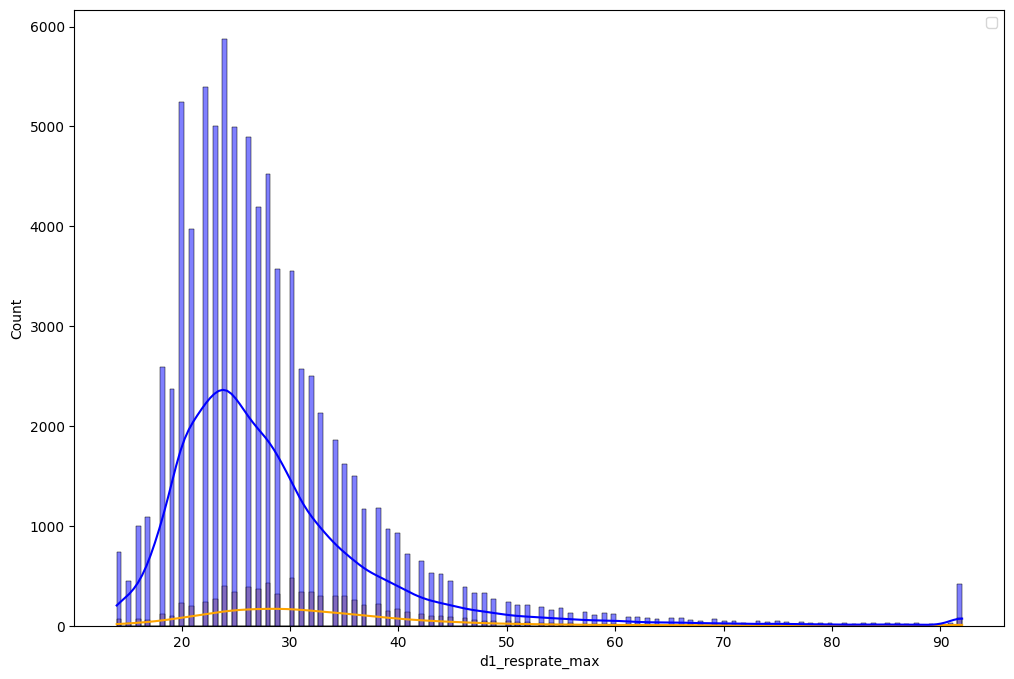

_______________________________________________________________________________
D1_RESPRATE_MIN

0    10.0
1    12.0
2     8.0
3     7.0
4    16.0
Name: d1_resprate_min, dtype: float64
count    91328.000000
mean        12.846279
std          5.064943
min          0.000000
25%         10.000000
50%         13.000000
75%         16.000000
max        100.000000
Name: d1_resprate_min, dtype: float64



/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warn

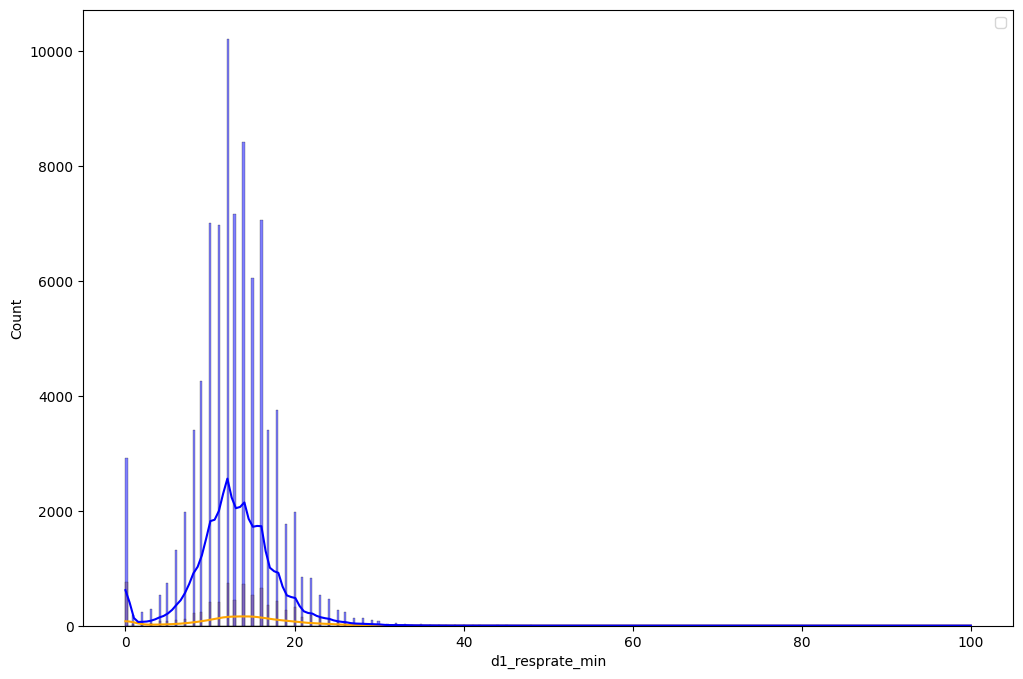

_______________________________________________________________________________
D1_SPO2_MAX

0    100.0
1    100.0
2     98.0
3    100.0
4    100.0
Name: d1_spo2_max, dtype: float64
count    91380.000000
mean        99.241836
std          1.794181
min          0.000000
25%         99.000000
50%        100.000000
75%        100.000000
max        100.000000
Name: d1_spo2_max, dtype: float64



/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warn

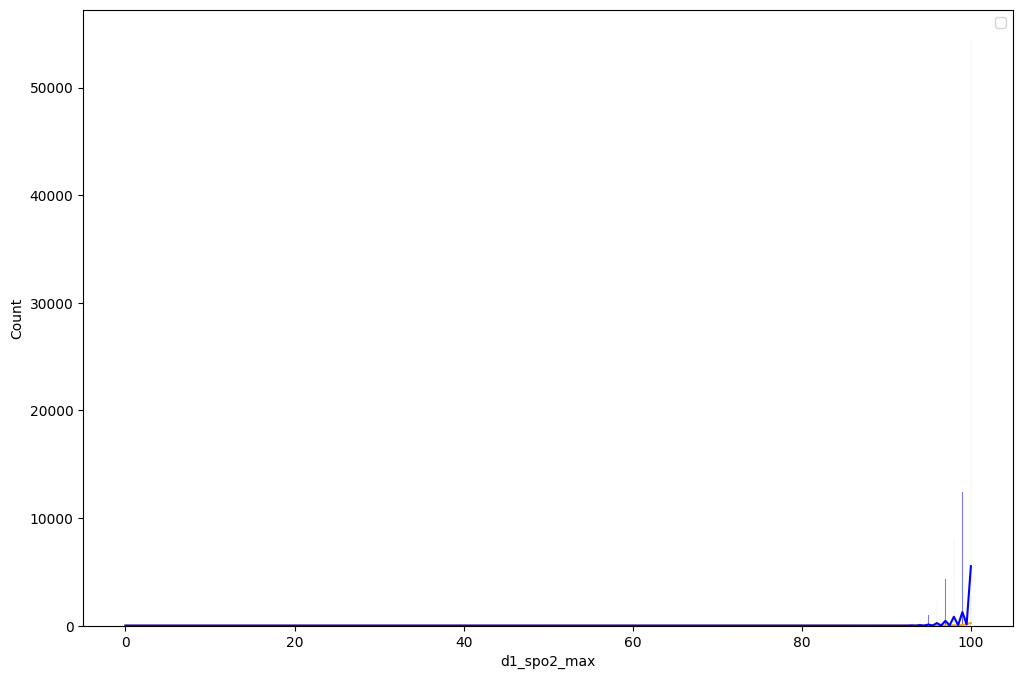

_______________________________________________________________________________
D1_SPO2_MIN

0    74.0
1    70.0
2    91.0
3    95.0
4    96.0
Name: d1_spo2_min, dtype: float64
count    91380.000000
mean        90.454826
std         10.030069
min          0.000000
25%         89.000000
50%         92.000000
75%         95.000000
max        100.000000
Name: d1_spo2_min, dtype: float64



/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warn

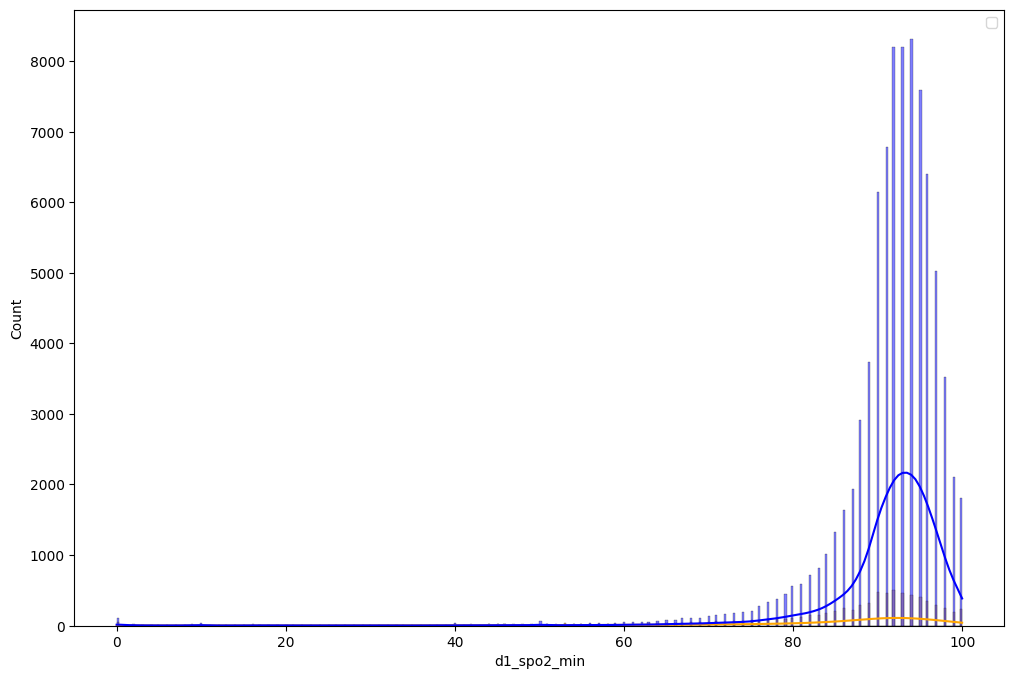

_______________________________________________________________________________
D1_SYSBP_MAX

0    131.0
1    159.0
2    148.0
3    158.0
4    147.0
Name: d1_sysbp_max, dtype: float64
count    91554.000000
mean       148.339745
std         25.733259
min         90.000000
25%        130.000000
50%        146.000000
75%        164.000000
max        232.000000
Name: d1_sysbp_max, dtype: float64



/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warn

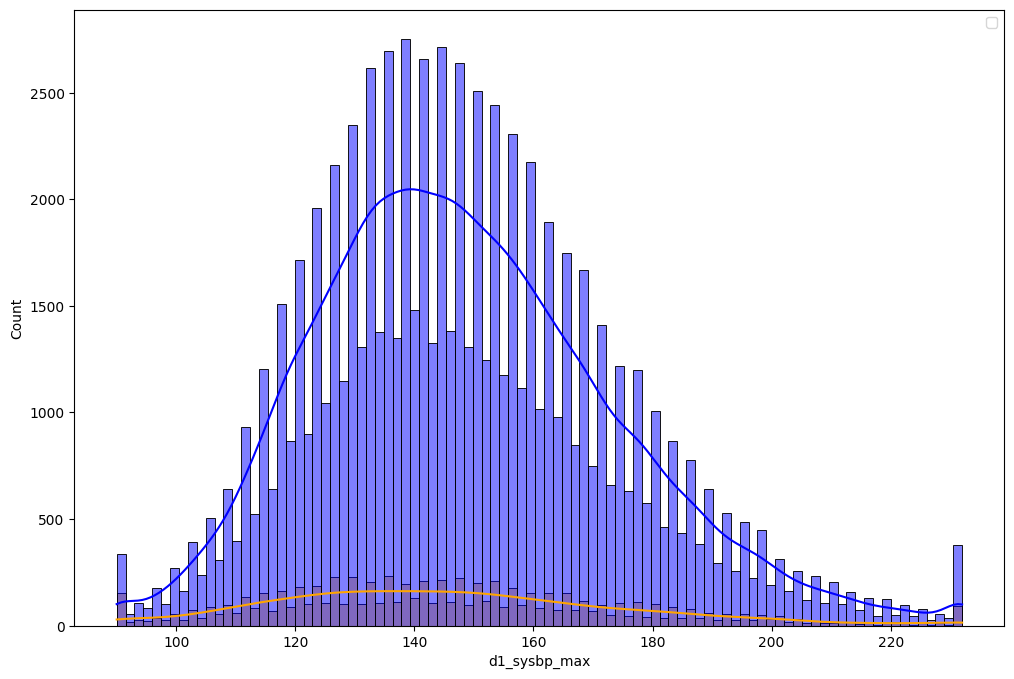

_______________________________________________________________________________
D1_SYSBP_MIN

0     73.0
1     67.0
2    105.0
3     84.0
4    120.0
Name: d1_sysbp_min, dtype: float64
count    91554.00000
mean        96.92387
std         20.67793
min         41.00000
25%         83.00000
50%         96.00000
75%        110.00000
max        160.00000
Name: d1_sysbp_min, dtype: float64



/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warn

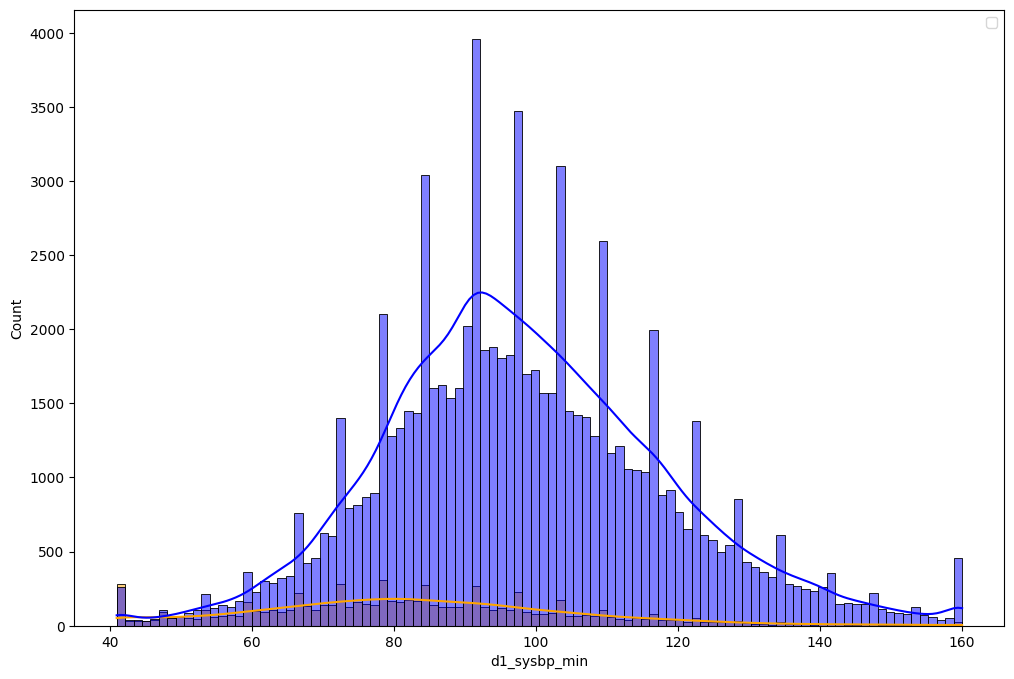

_______________________________________________________________________________
D1_SYSBP_NONINVASIVE_MAX

0    131.0
1    159.0
2    148.0
3    158.0
4    147.0
Name: d1_sysbp_noninvasive_max, dtype: float64
count    90686.000000
mean       148.235549
std         25.792453
min         90.000000
25%        130.000000
50%        146.000000
75%        164.000000
max        232.000000
Name: d1_sysbp_noninvasive_max, dtype: float64



/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warn

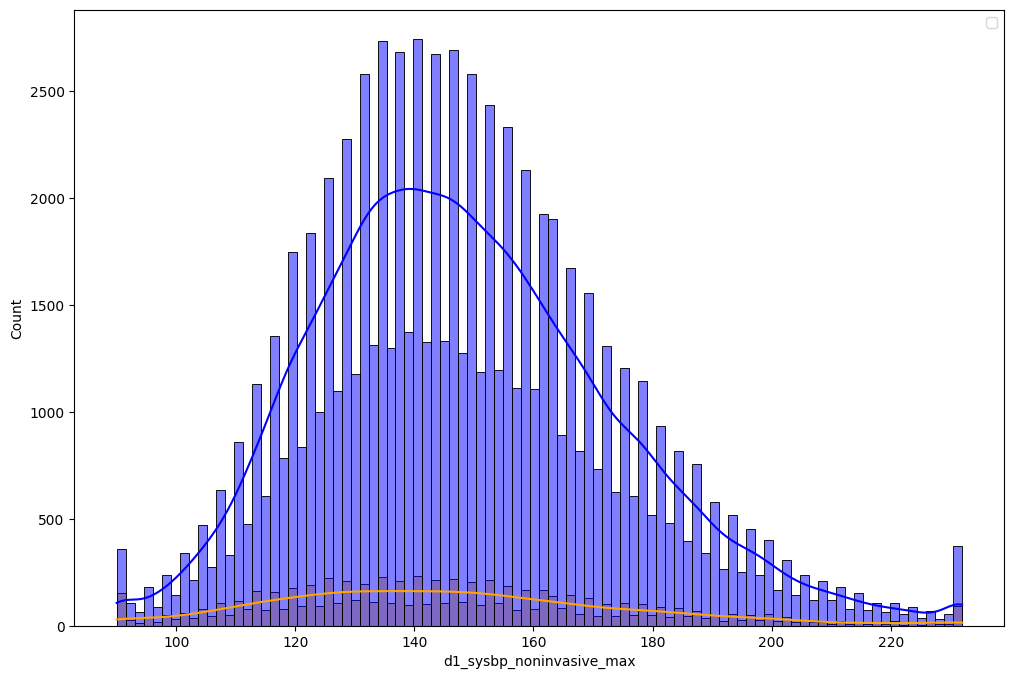

_______________________________________________________________________________
D1_SYSBP_NONINVASIVE_MIN

0     73.0
1     67.0
2    105.0
3     84.0
4    120.0
Name: d1_sysbp_noninvasive_min, dtype: float64
count    90686.000000
mean        96.993313
std         20.705016
min         41.030000
25%         84.000000
50%         96.000000
75%        110.000000
max        160.000000
Name: d1_sysbp_noninvasive_min, dtype: float64



/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warn

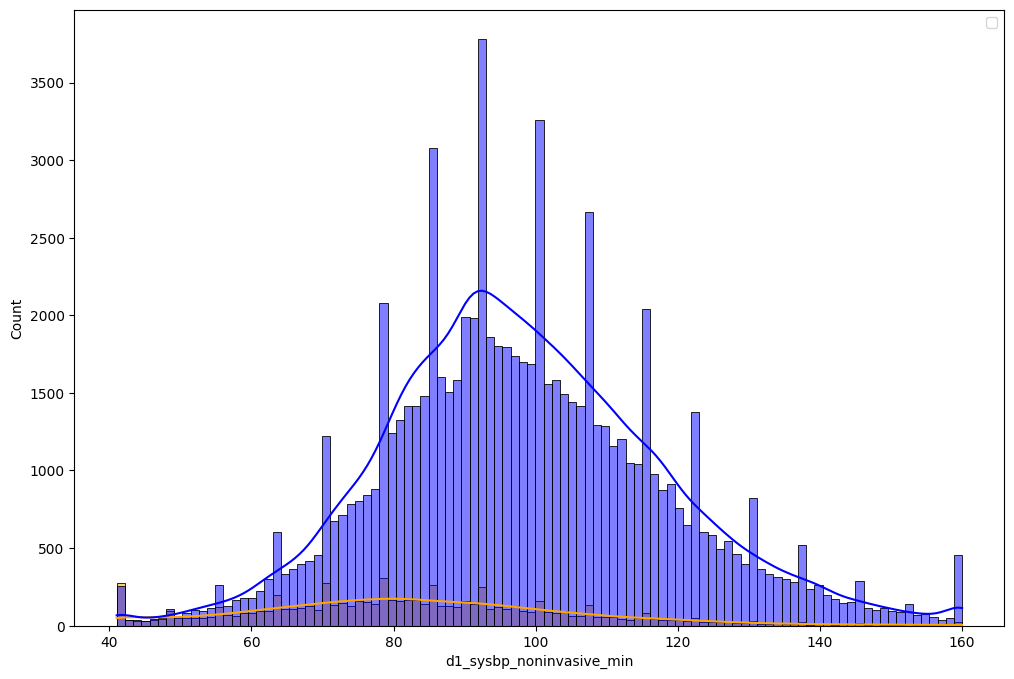

_______________________________________________________________________________
D1_TEMP_MAX

0    39.9
1    36.3
2    37.0
3    38.0
4    37.2
Name: d1_temp_max, dtype: float64
count    89389.000000
mean        37.284201
std          0.693287
min         35.100000
25%         36.900000
50%         37.110000
75%         37.600000
max         39.900000
Name: d1_temp_max, dtype: float64



/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warn

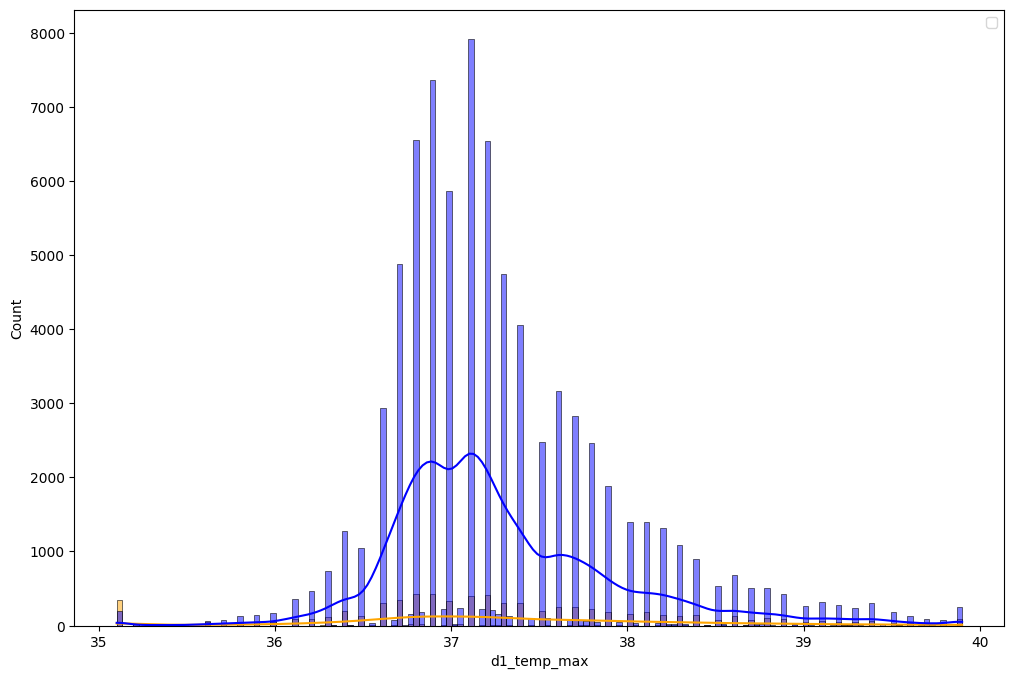

_______________________________________________________________________________
D1_TEMP_MIN

0    37.2
1    35.1
2    36.7
3    34.8
4    36.7
Name: d1_temp_min, dtype: float64
count    89389.000000
mean        36.268391
std          0.745147
min         31.889000
25%         36.100000
50%         36.400000
75%         36.660000
max         37.800000
Name: d1_temp_min, dtype: float64



/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warn

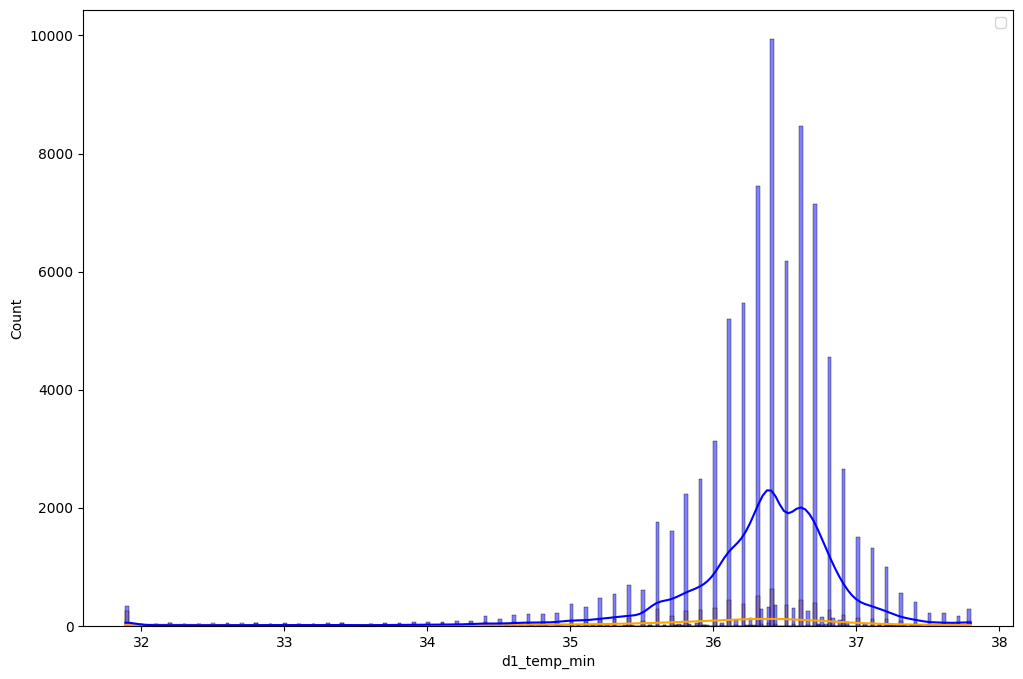

_______________________________________________________________________________
H1_DIASBP_MAX

0    68.0
1    61.0
2    88.0
3    62.0
4    99.0
Name: h1_diasbp_max, dtype: float64
count    88094.000000
mean        75.354508
std         18.409190
min         37.000000
25%         62.000000
50%         74.000000
75%         86.000000
max        143.000000
Name: h1_diasbp_max, dtype: float64



/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warn

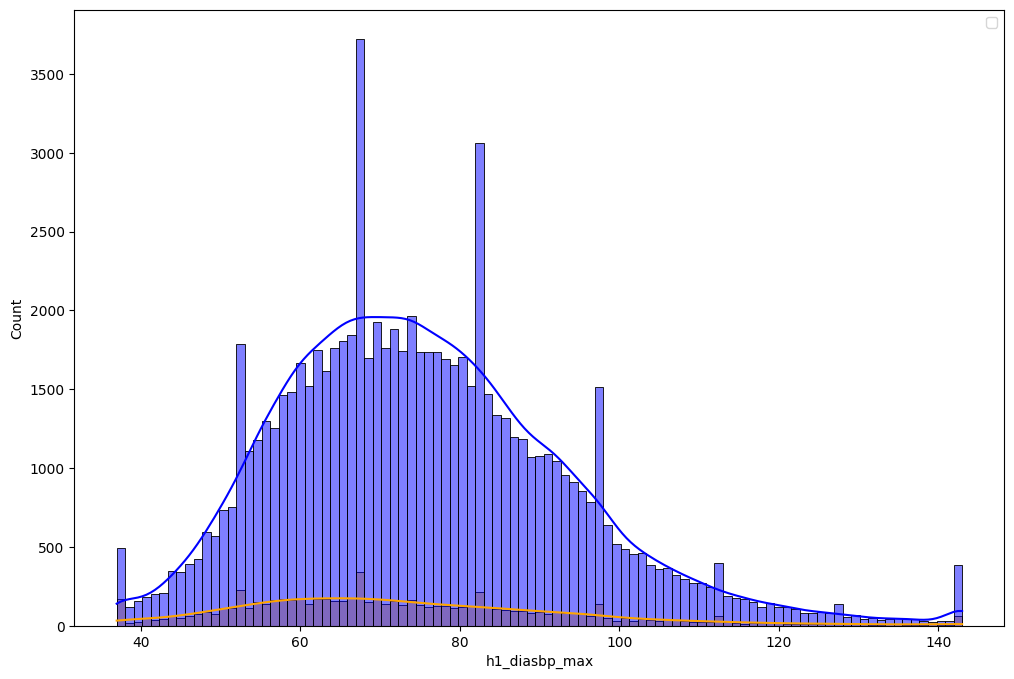

_______________________________________________________________________________
H1_DIASBP_MIN

0    63.0
1    48.0
2    58.0
3    44.0
4    68.0
Name: h1_diasbp_min, dtype: float64
count    88094.000000
mean        62.838150
std         16.363229
min         22.000000
25%         52.000000
50%         62.000000
75%         73.000000
max        113.000000
Name: h1_diasbp_min, dtype: float64



/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warn

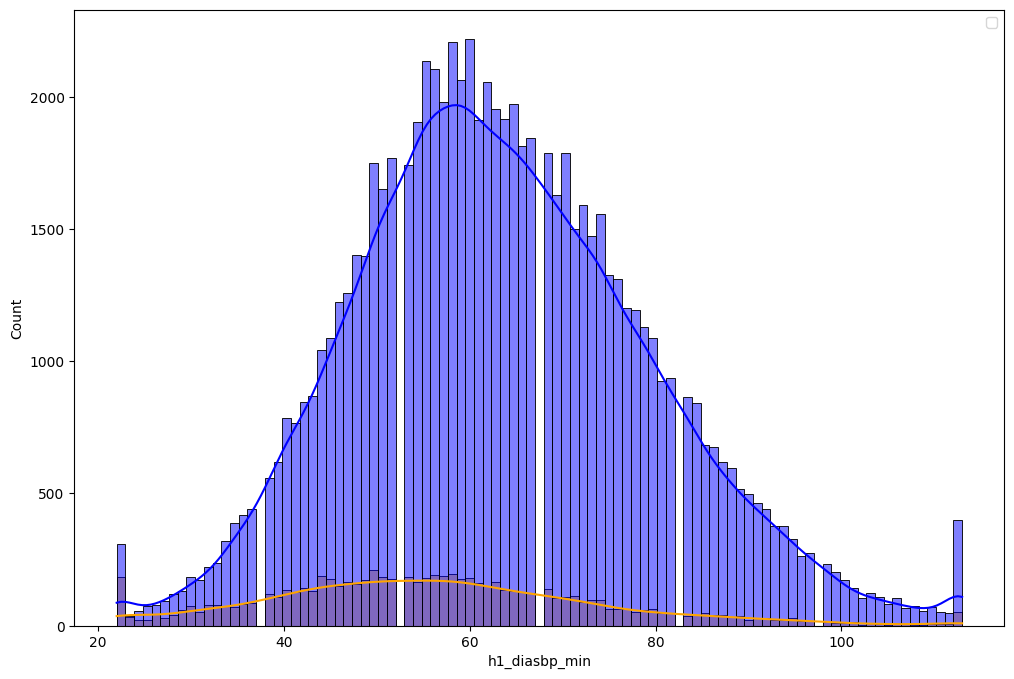

_______________________________________________________________________________
H1_DIASBP_NONINVASIVE_MAX

0    68.0
1    61.0
2    88.0
3     NaN
4    99.0
Name: h1_diasbp_noninvasive_max, dtype: float64
count    84363.000000
mean        75.805934
std         18.481826
min         37.000000
25%         63.000000
50%         74.000000
75%         87.000000
max        144.000000
Name: h1_diasbp_noninvasive_max, dtype: float64



/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warn

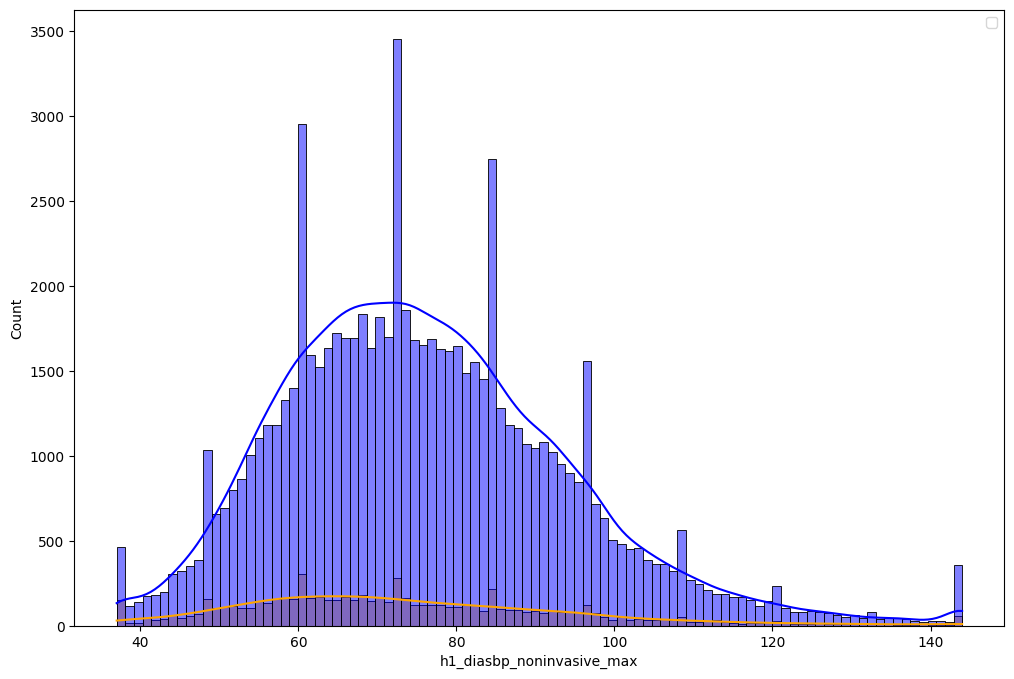

_______________________________________________________________________________
H1_DIASBP_NONINVASIVE_MIN

0    63.0
1    48.0
2    58.0
3     NaN
4    68.0
Name: h1_diasbp_noninvasive_min, dtype: float64
count    84363.000000
mean        63.270616
std         16.422063
min         22.000000
25%         52.000000
50%         62.000000
75%         74.000000
max        114.000000
Name: h1_diasbp_noninvasive_min, dtype: float64



/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warn

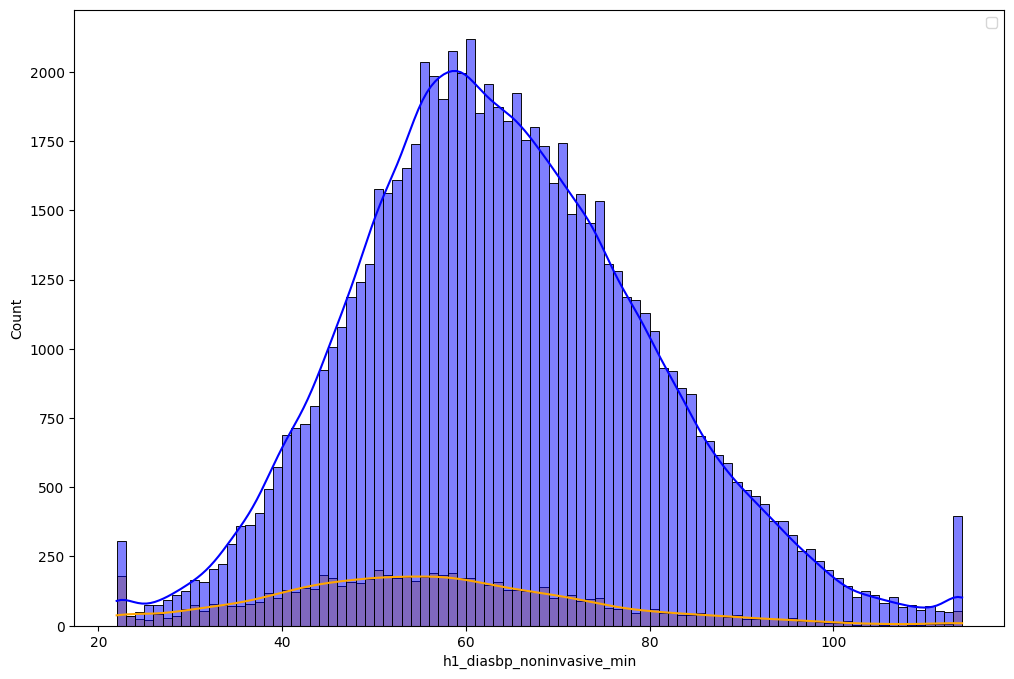

_______________________________________________________________________________
H1_HEARTRATE_MAX

0    119.0
1    114.0
2     96.0
3    100.0
4     89.0
Name: h1_heartrate_max, dtype: float64
count    88923.000000
mean        92.229198
std         21.823704
min         46.000000
25%         77.000000
50%         90.000000
75%        106.000000
max        164.000000
Name: h1_heartrate_max, dtype: float64



/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warn

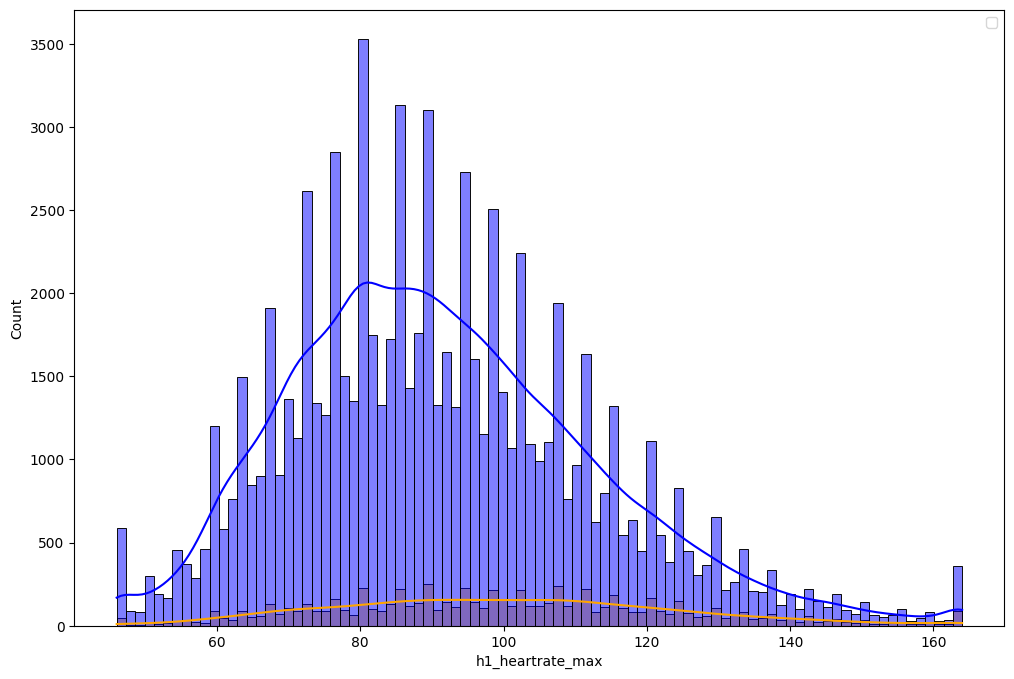

_______________________________________________________________________________
H1_HEARTRATE_MIN

0    108.0
1    100.0
2     78.0
3     96.0
4     76.0
Name: h1_heartrate_min, dtype: float64
count    88923.000000
mean        83.663720
std         20.279869
min         36.000000
25%         69.000000
50%         82.000000
75%         97.000000
max        144.000000
Name: h1_heartrate_min, dtype: float64



/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warn

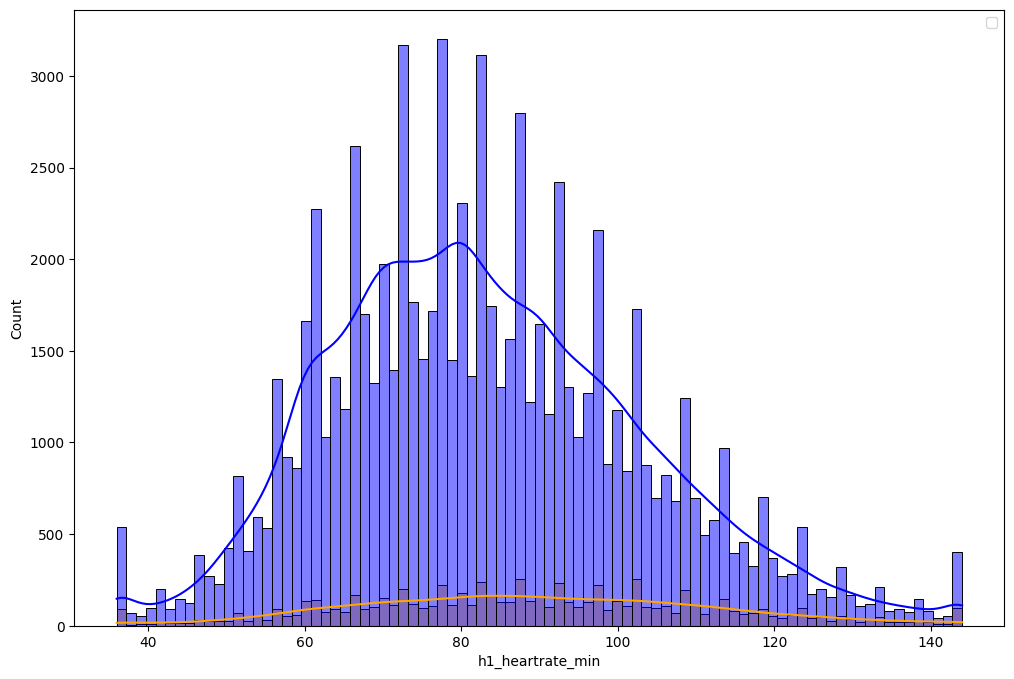

_______________________________________________________________________________
H1_MBP_MAX

0     86.0
1     85.0
2     91.0
3     92.0
4    104.0
Name: h1_mbp_max, dtype: float64
count    87074.000000
mean        91.612950
std         20.533174
min         49.000000
25%         77.000000
50%         90.000000
75%        104.000000
max        165.000000
Name: h1_mbp_max, dtype: float64



/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warn

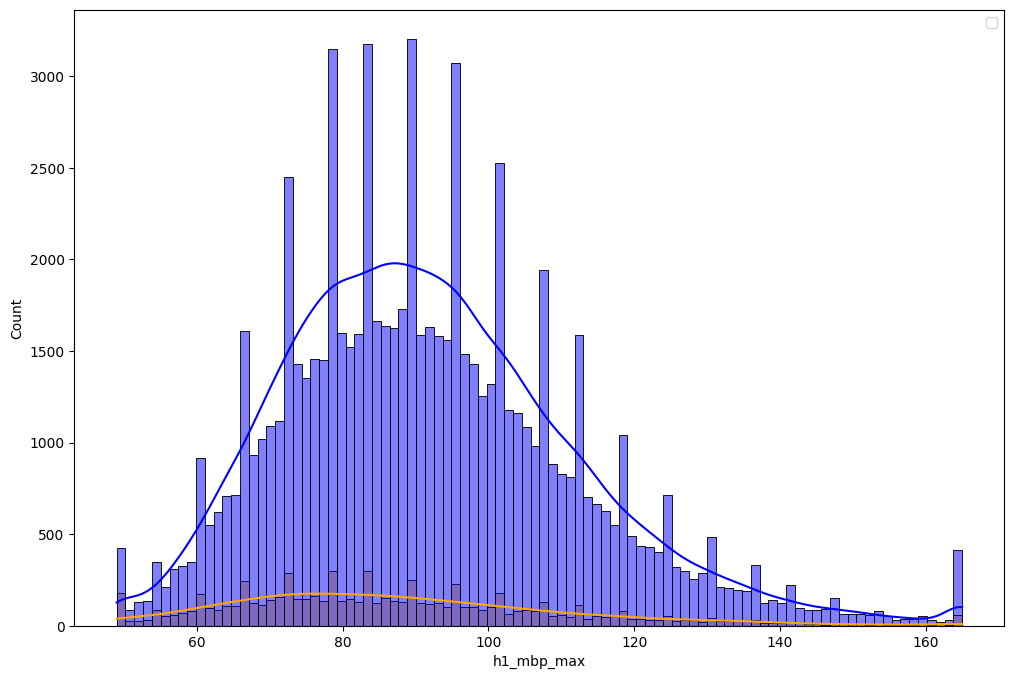

_______________________________________________________________________________
H1_MBP_MIN

0    85.0
1    57.0
2    83.0
3    71.0
4    92.0
Name: h1_mbp_min, dtype: float64
count    87074.000000
mean        79.400028
std         19.130590
min         32.000000
25%         66.000000
50%         78.000000
75%         92.000000
max        138.000000
Name: h1_mbp_min, dtype: float64



/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warn

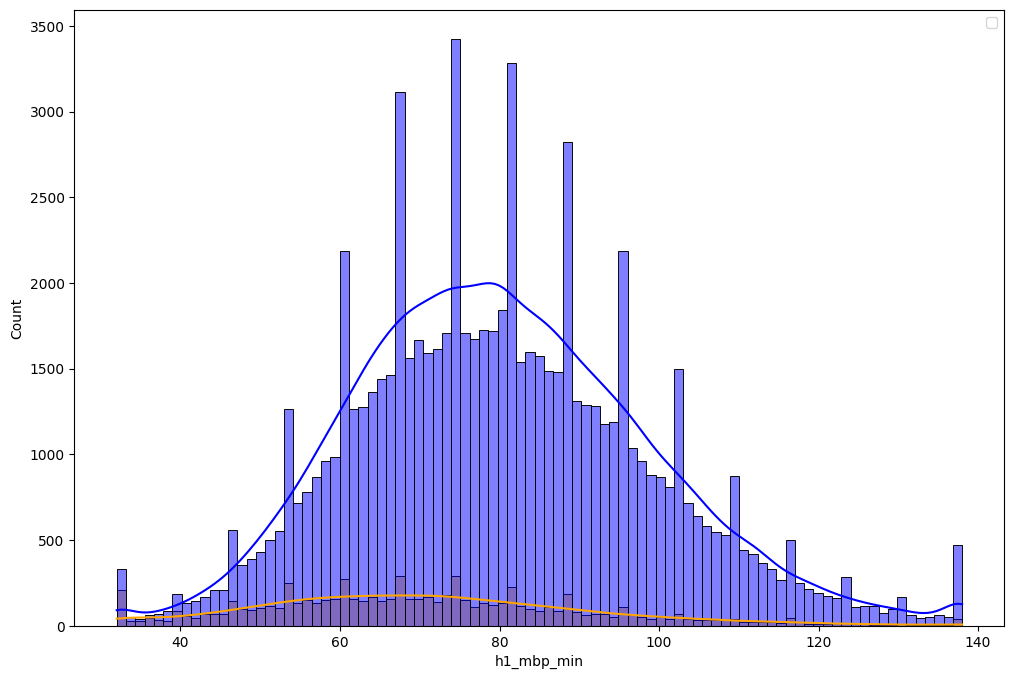

_______________________________________________________________________________
H1_MBP_NONINVASIVE_MAX

0     86.0
1     85.0
2     91.0
3      NaN
4    104.0
Name: h1_mbp_noninvasive_max, dtype: float64
count    82629.000000
mean        91.594126
std         20.552018
min         49.000000
25%         77.000000
50%         90.000000
75%        104.000000
max        163.000000
Name: h1_mbp_noninvasive_max, dtype: float64



/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warn

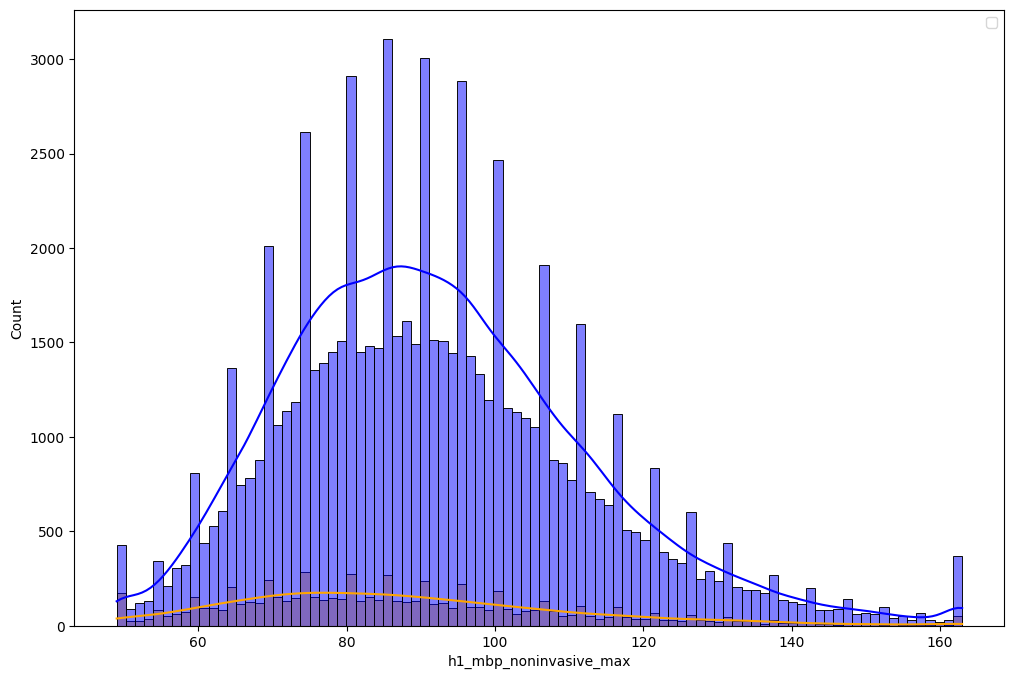

_______________________________________________________________________________
H1_MBP_NONINVASIVE_MIN

0    85.0
1    57.0
2    83.0
3     NaN
4    92.0
Name: h1_mbp_noninvasive_min, dtype: float64
count    82629.000000
mean        79.709315
std         19.236507
min         32.000000
25%         66.000000
50%         79.000000
75%         92.000000
max        138.000000
Name: h1_mbp_noninvasive_min, dtype: float64



/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warn

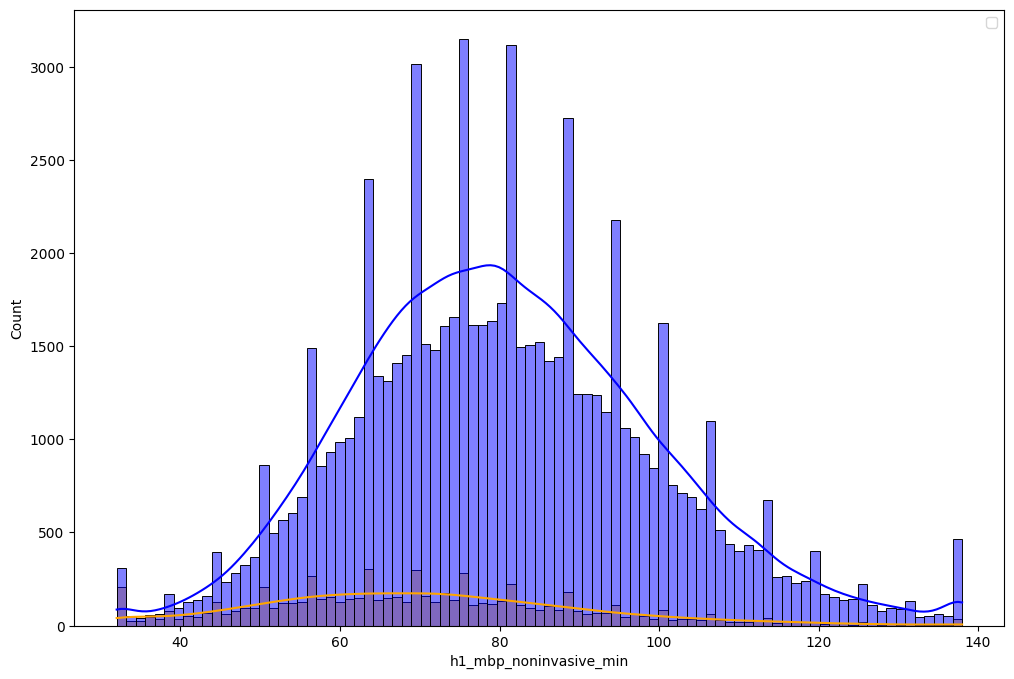

_______________________________________________________________________________
H1_RESPRATE_MAX

0    26.0
1    31.0
2    20.0
3    12.0
4     NaN
Name: h1_resprate_max, dtype: float64
count    87356.000000
mean        22.633614
std          7.515043
min         10.000000
25%         18.000000
50%         21.000000
75%         26.000000
max         59.000000
Name: h1_resprate_max, dtype: float64



/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warn

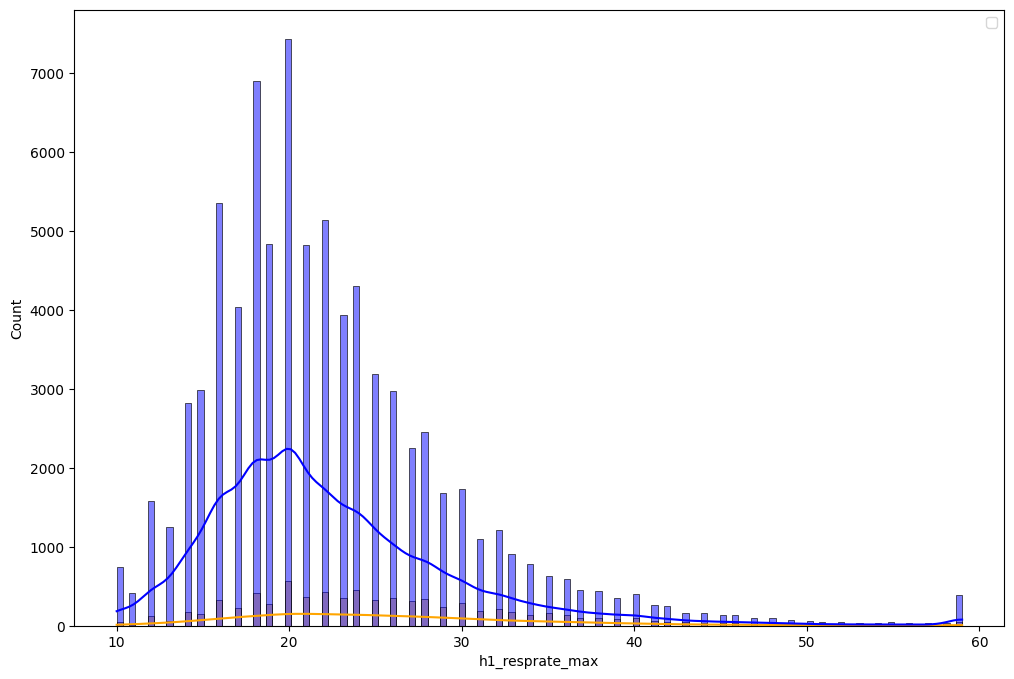

_______________________________________________________________________________
H1_RESPRATE_MIN

0    18.0
1    28.0
2    16.0
3    11.0
4     NaN
Name: h1_resprate_min, dtype: float64
count    87356.000000
mean        17.211525
std          6.072588
min          0.000000
25%         14.000000
50%         16.000000
75%         20.000000
max        189.000000
Name: h1_resprate_min, dtype: float64



/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warn

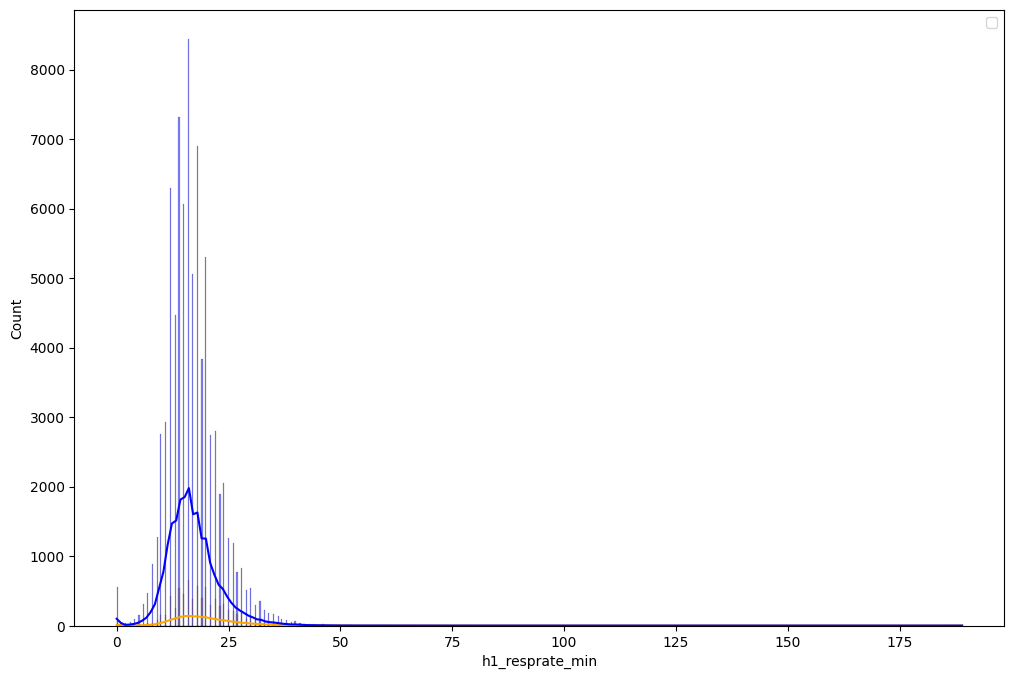

_______________________________________________________________________________
H1_SPO2_MAX

0    100.0
1     95.0
2     98.0
3    100.0
4    100.0
Name: h1_spo2_max, dtype: float64
count    87528.000000
mean        98.044637
std          3.212934
min          0.000000
25%         97.000000
50%         99.000000
75%        100.000000
max        100.000000
Name: h1_spo2_max, dtype: float64



/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warn

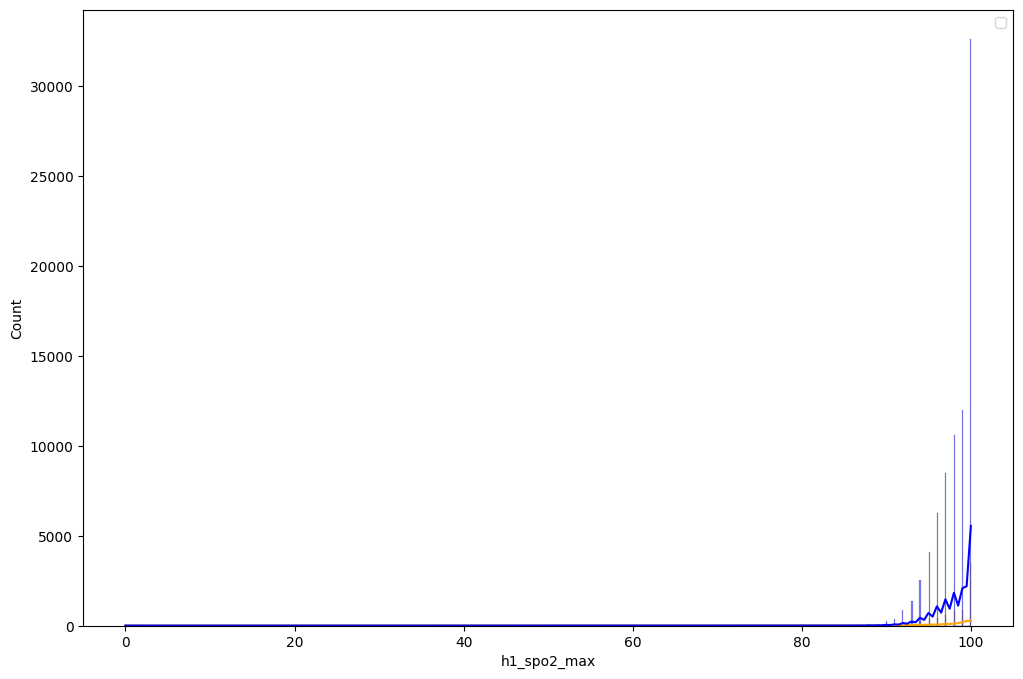

_______________________________________________________________________________
H1_SPO2_MIN

0     74.0
1     70.0
2     91.0
3     99.0
4    100.0
Name: h1_spo2_min, dtype: float64
count    87528.000000
mean        95.174310
std          6.625227
min          0.000000
25%         94.000000
50%         96.000000
75%         99.000000
max        100.000000
Name: h1_spo2_min, dtype: float64



/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warn

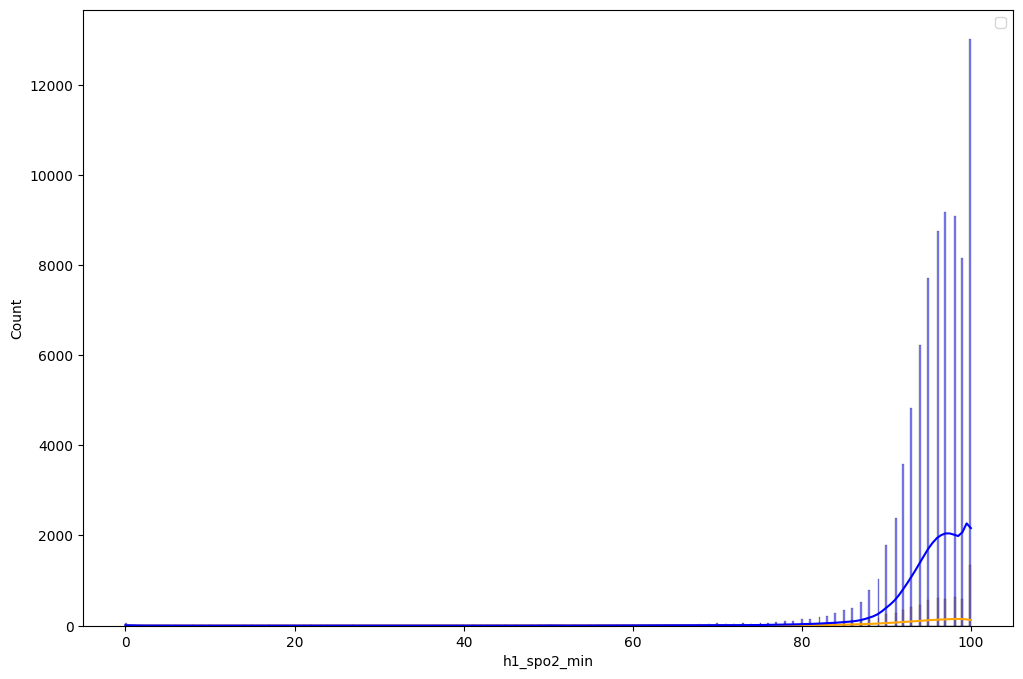

_______________________________________________________________________________
H1_SYSBP_MAX

0    131.0
1     95.0
2    148.0
3    136.0
4    130.0
Name: h1_sysbp_max, dtype: float64
count    88102.000000
mean       133.247395
std         27.556986
min         75.000000
25%        113.000000
50%        131.000000
75%        150.000000
max        223.000000
Name: h1_sysbp_max, dtype: float64



/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warn

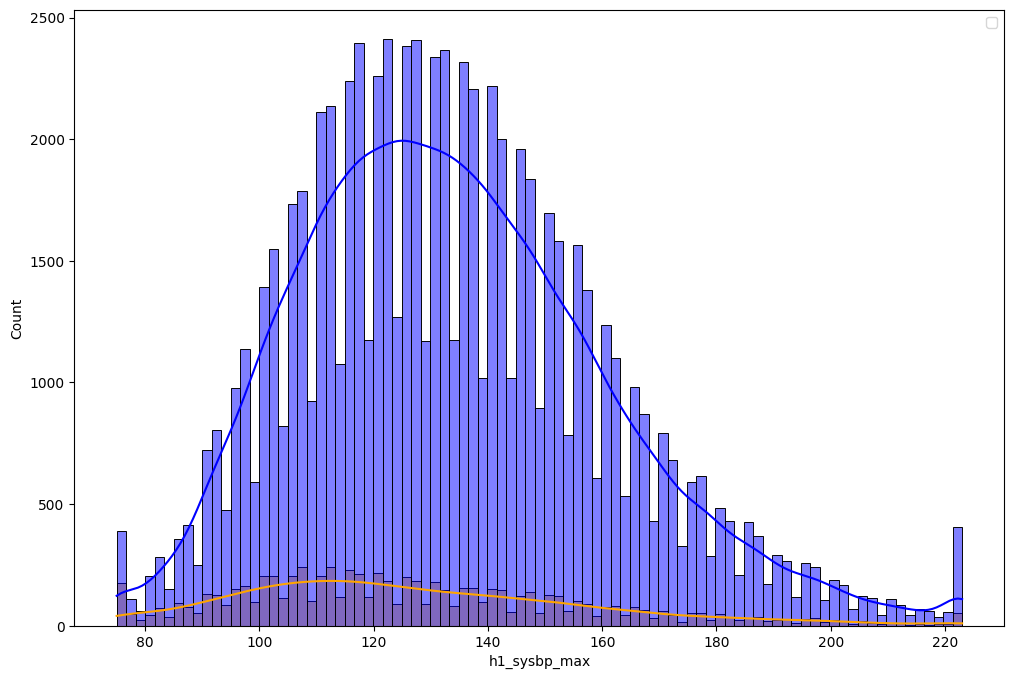

_______________________________________________________________________________
H1_SYSBP_MIN

0    115.0
1     71.0
2    124.0
3    106.0
4    120.0
Name: h1_sysbp_min, dtype: float64
count    88102.000000
mean       116.362296
std         26.510637
min         53.000000
25%         98.000000
50%        115.000000
75%        134.000000
max        194.000000
Name: h1_sysbp_min, dtype: float64



/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warn

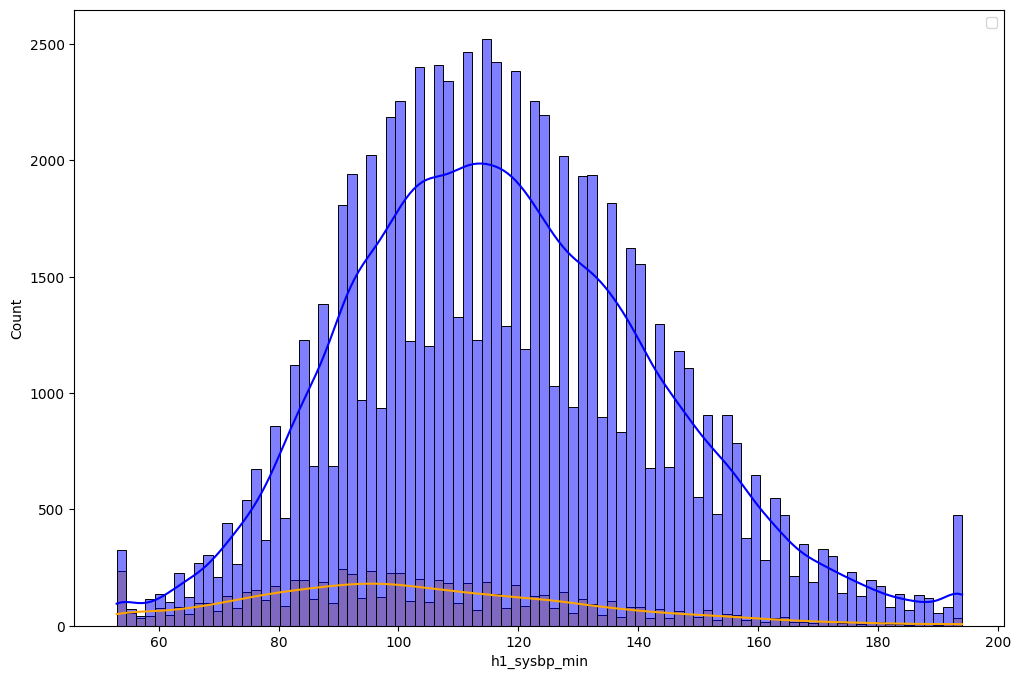

_______________________________________________________________________________
H1_SYSBP_NONINVASIVE_MAX

0    131.0
1     95.0
2    148.0
3      NaN
4    130.0
Name: h1_sysbp_noninvasive_max, dtype: float64
count    84372.000000
mean       133.054686
std         27.679751
min         75.000000
25%        113.000000
50%        130.000000
75%        150.000000
max        223.000000
Name: h1_sysbp_noninvasive_max, dtype: float64



/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warn

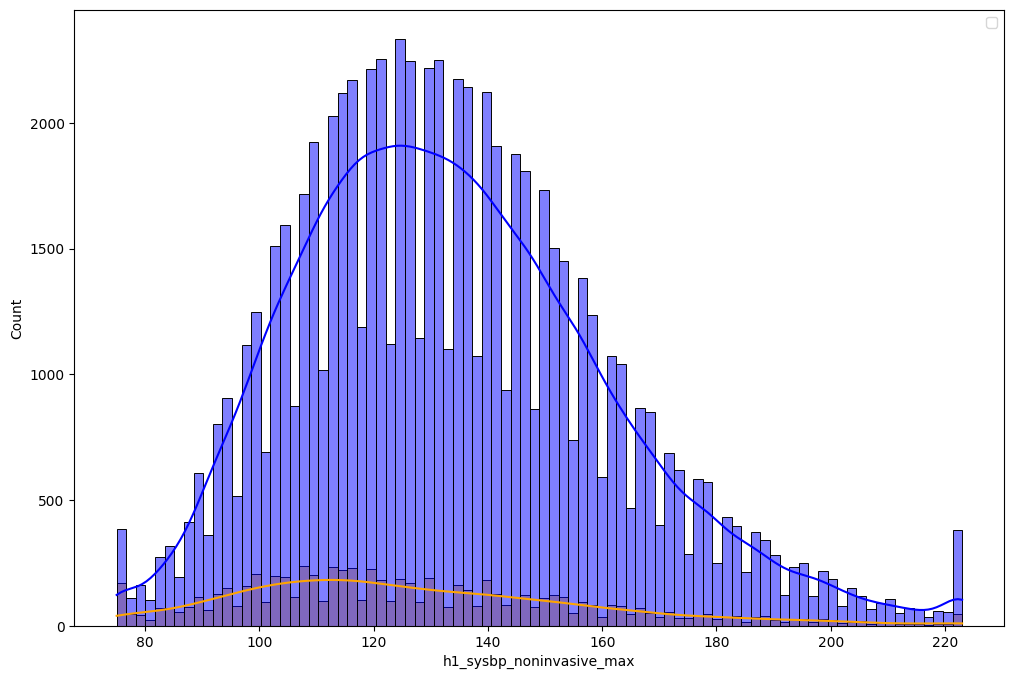

_______________________________________________________________________________
H1_SYSBP_NONINVASIVE_MIN

0    115.0
1     71.0
2    124.0
3      NaN
4    120.0
Name: h1_sysbp_noninvasive_min, dtype: float64
count    84372.000000
mean       116.549625
std         26.623528
min         53.000000
25%         98.000000
50%        115.000000
75%        134.000000
max        195.000000
Name: h1_sysbp_noninvasive_min, dtype: float64



/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warn

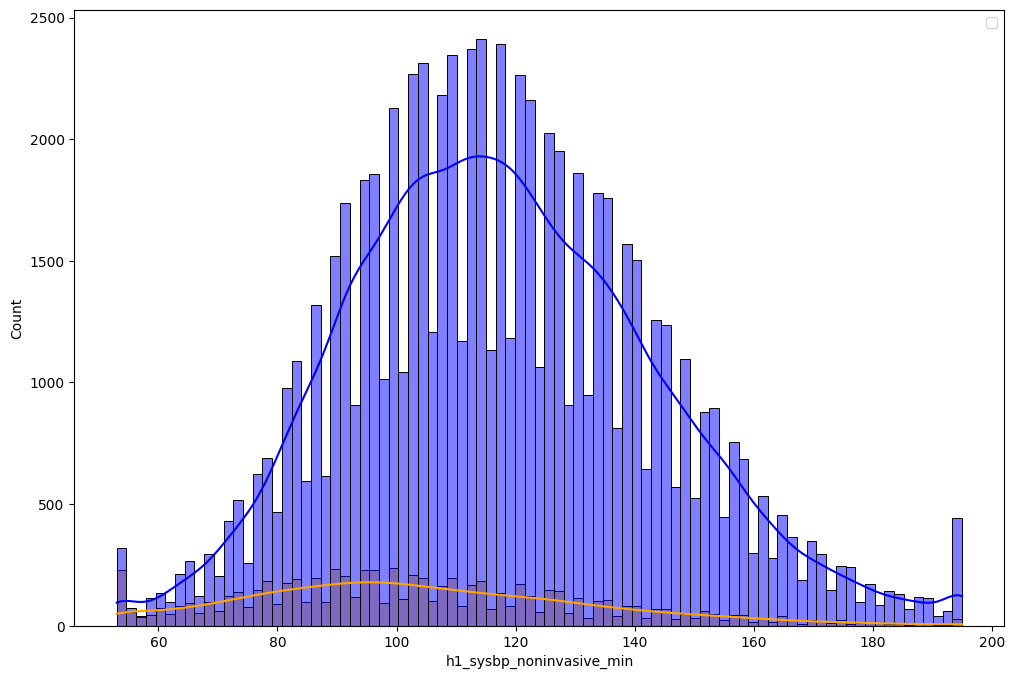

_______________________________________________________________________________
D1_GLUCOSE_MAX

0    168.0
1    145.0
2      NaN
3    185.0
4      NaN
Name: d1_glucose_max, dtype: float64
count    85906.000000
mean       174.638023
std         86.687955
min         73.000000
25%        117.000000
50%        150.000000
75%        201.000000
max        611.000000
Name: d1_glucose_max, dtype: float64



/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warn

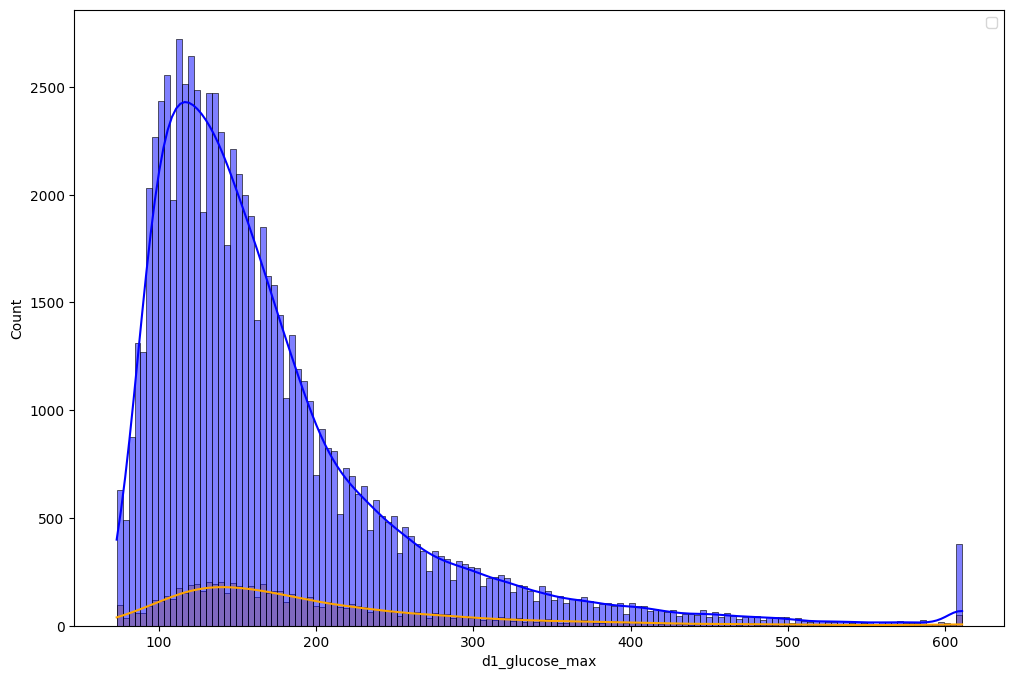

_______________________________________________________________________________
D1_GLUCOSE_MIN

0    109.0
1    128.0
2      NaN
3     88.0
4      NaN
Name: d1_glucose_min, dtype: float64
count    85906.000000
mean       114.380940
std         38.273013
min         33.000000
25%         91.000000
50%        107.000000
75%        131.000000
max        288.000000
Name: d1_glucose_min, dtype: float64



/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warn

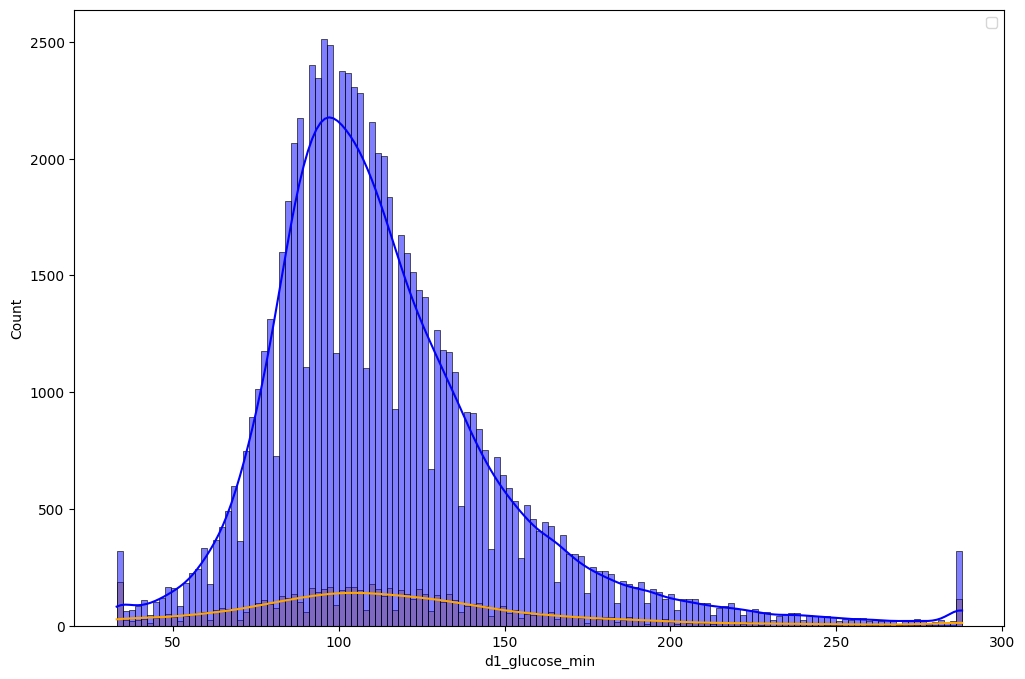

_______________________________________________________________________________
D1_POTASSIUM_MAX

0    4.0
1    4.2
2    NaN
3    5.0
4    NaN
Name: d1_potassium_max, dtype: float64
count    82128.000000
mean         4.251594
std          0.667355
min          2.800000
25%          3.800000
50%          4.200000
75%          4.600000
max          7.000000
Name: d1_potassium_max, dtype: float64



/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warn

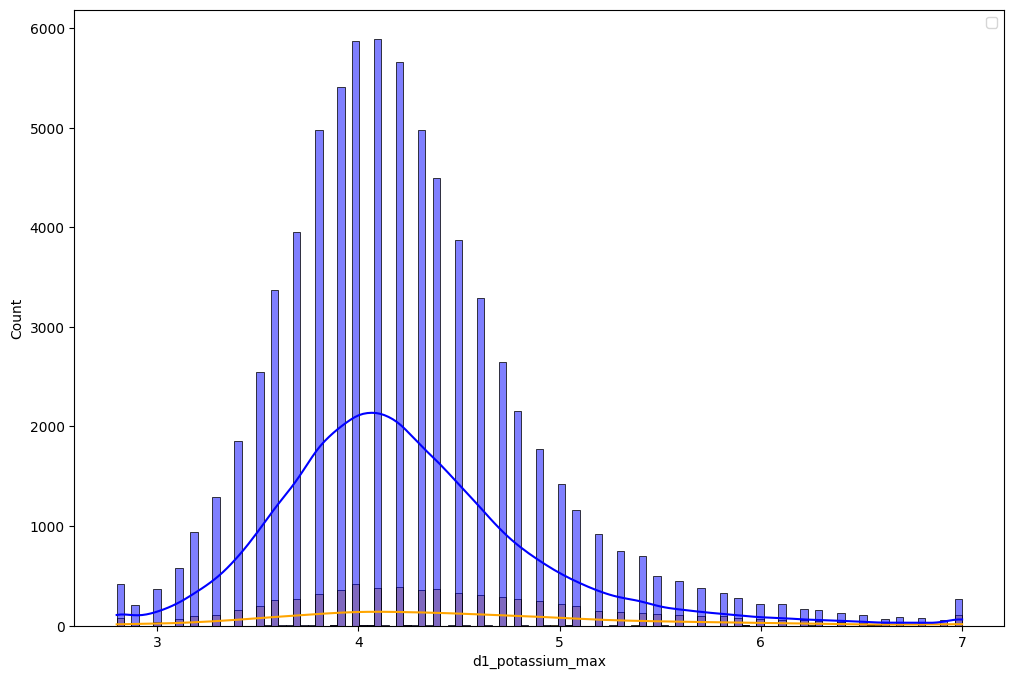

_______________________________________________________________________________
D1_POTASSIUM_MIN

0    3.4
1    3.8
2    NaN
3    3.5
4    NaN
Name: d1_potassium_min, dtype: float64
count    82128.000000
mean         3.934658
std          0.579610
min          2.400000
25%          3.600000
50%          3.900000
75%          4.300000
max          5.800000
Name: d1_potassium_min, dtype: float64



/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warn

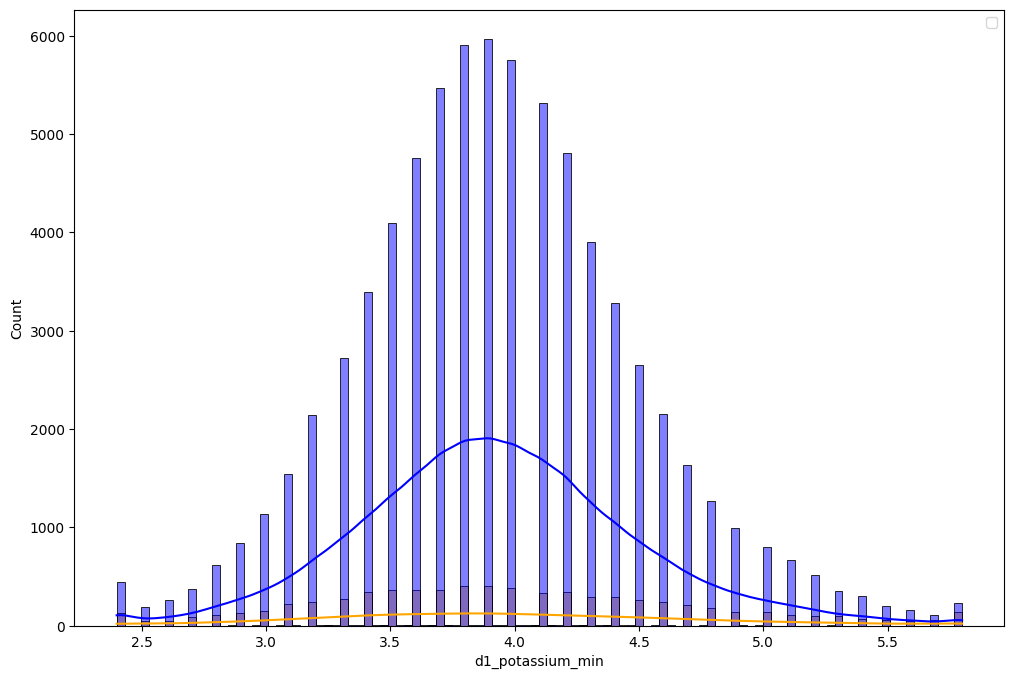

_______________________________________________________________________________
APACHE_4A_HOSPITAL_DEATH_PROB

0    0.10
1    0.47
2    0.00
3    0.04
4     NaN
Name: apache_4a_hospital_death_prob, dtype: float64
count    83766.000000
mean         0.086787
std          0.247569
min         -1.000000
25%          0.020000
50%          0.050000
75%          0.130000
max          0.990000
Name: apache_4a_hospital_death_prob, dtype: float64



/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warn

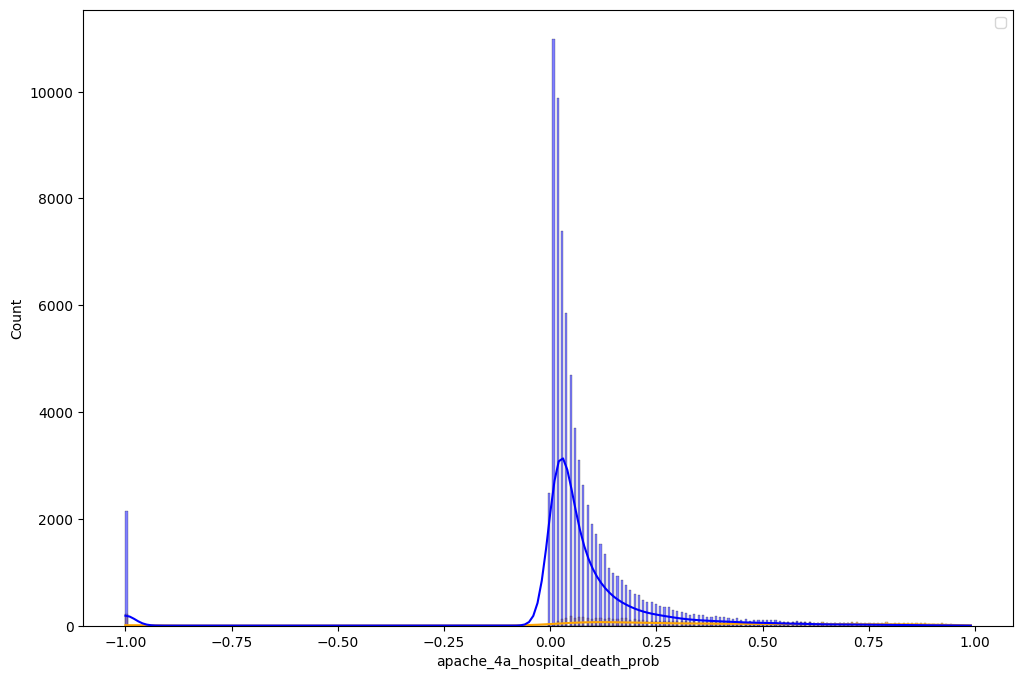

_______________________________________________________________________________
APACHE_4A_ICU_DEATH_PROB

0    0.05
1    0.29
2    0.00
3    0.03
4     NaN
Name: apache_4a_icu_death_prob, dtype: float64
count    83766.000000
mean         0.043955
std          0.217341
min         -1.000000
25%          0.010000
50%          0.020000
75%          0.060000
max          0.970000
Name: apache_4a_icu_death_prob, dtype: float64



/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warn

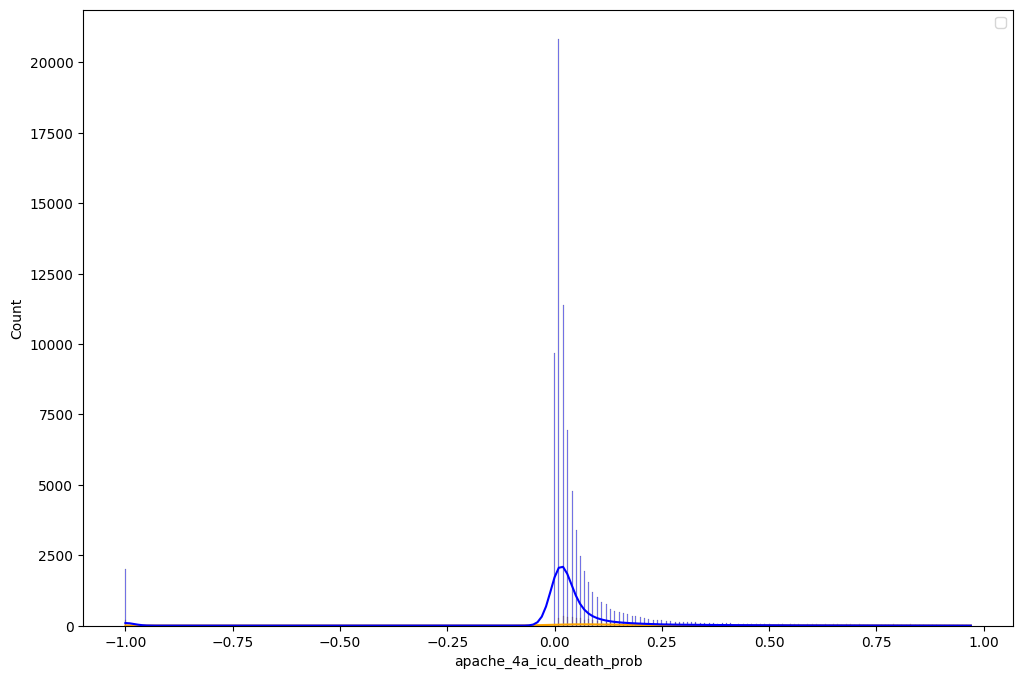

_______________________________________________________________________________
AIDS

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: aids, dtype: float64
count    90998.000000
mean         0.000857
std          0.029265
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: aids, dtype: float64



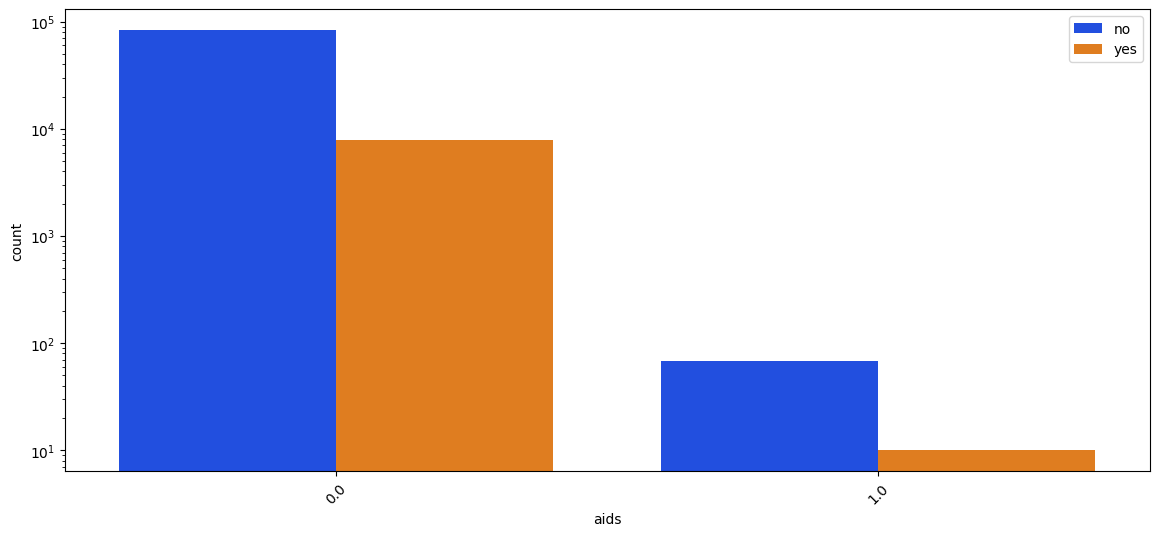

_______________________________________________________________________________
CIRRHOSIS

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: cirrhosis, dtype: float64
count    90998.000000
mean         0.015693
std          0.124284
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: cirrhosis, dtype: float64



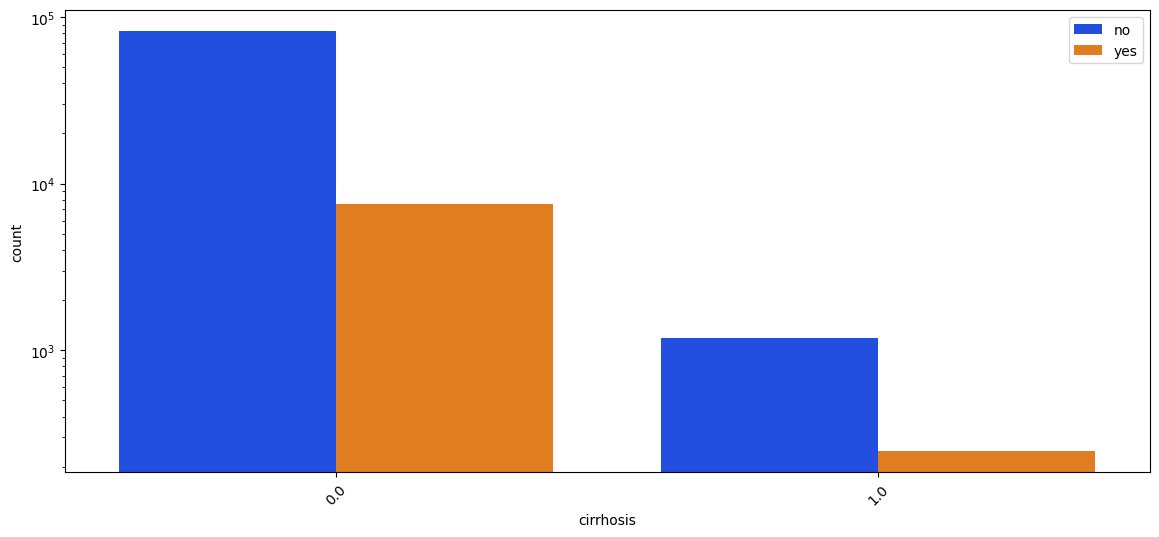

_______________________________________________________________________________
DIABETES_MELLITUS

0    1.0
1    1.0
2    0.0
3    0.0
4    0.0
Name: diabetes_mellitus, dtype: float64
count    90998.000000
mean         0.225192
std          0.417711
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: diabetes_mellitus, dtype: float64



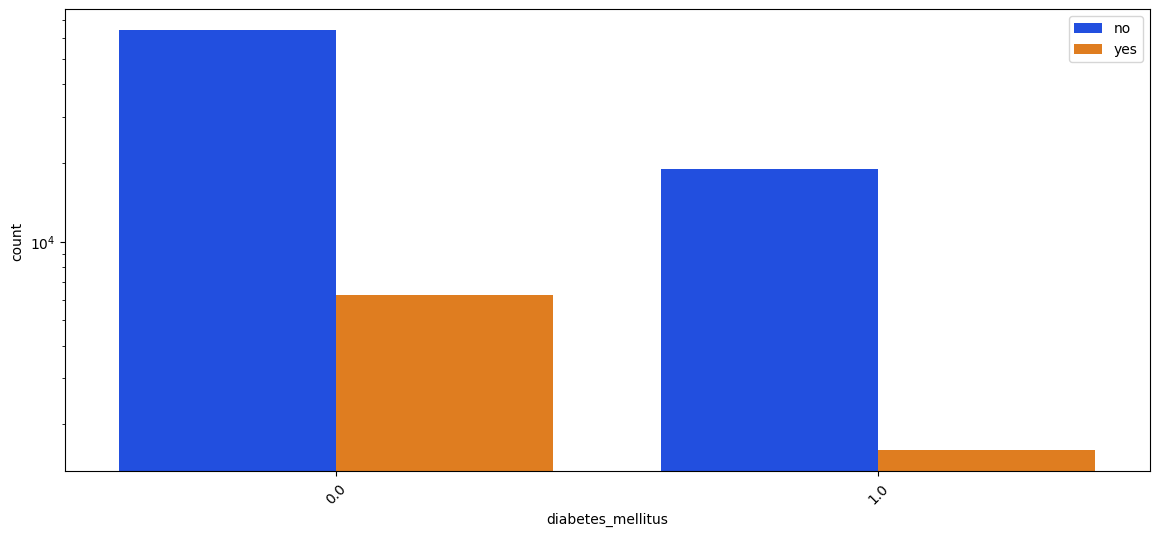

_______________________________________________________________________________
HEPATIC_FAILURE

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: hepatic_failure, dtype: float64
count    90998.000000
mean         0.012989
std          0.113229
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: hepatic_failure, dtype: float64



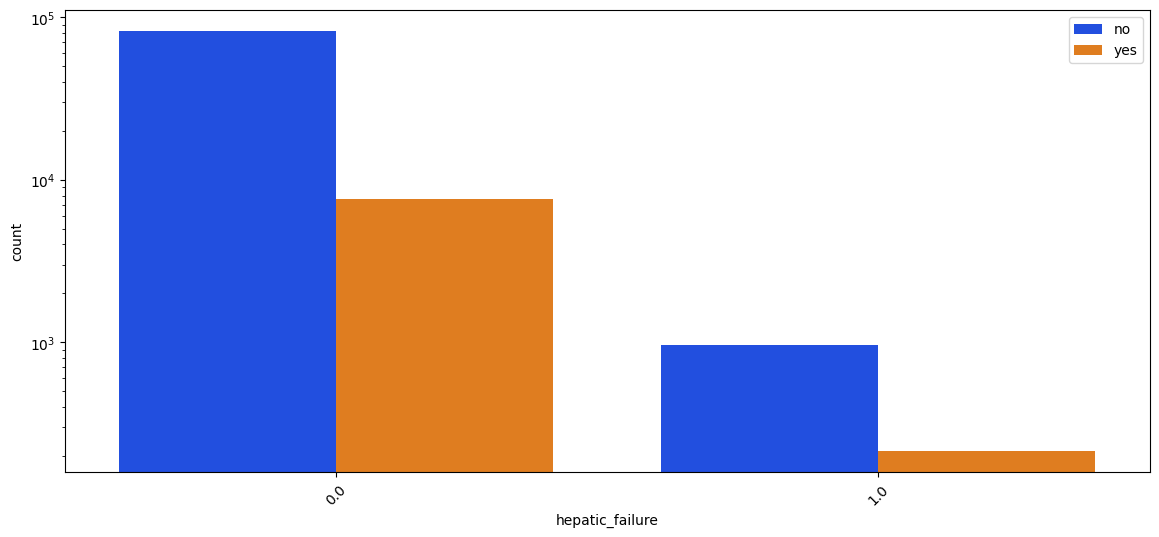

_______________________________________________________________________________
IMMUNOSUPPRESSION

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: immunosuppression, dtype: float64
count    90998.000000
mean         0.026165
std          0.159628
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: immunosuppression, dtype: float64



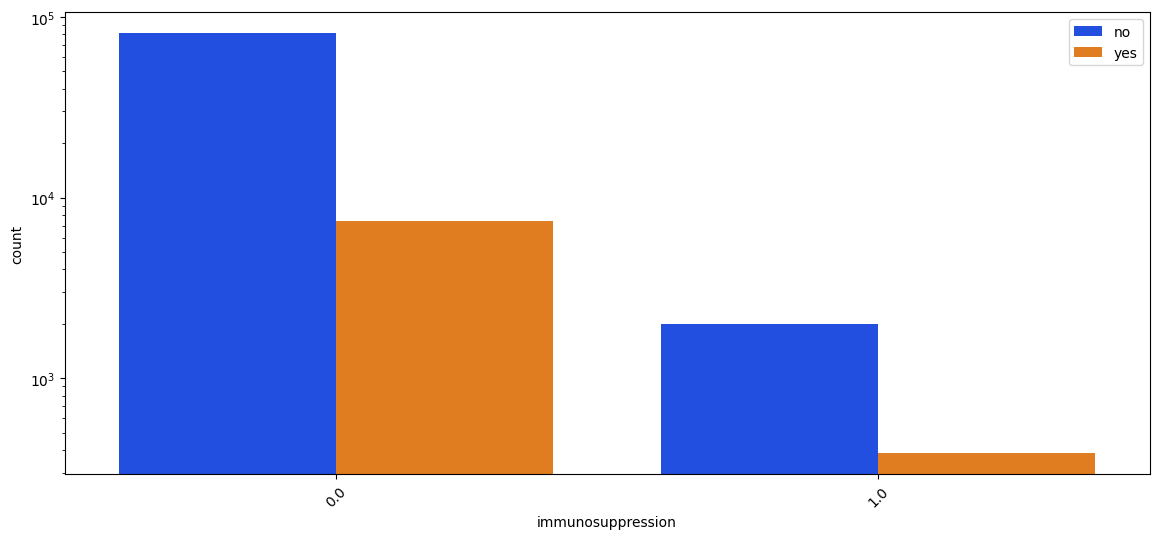

_______________________________________________________________________________
LEUKEMIA

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: leukemia, dtype: float64
count    90998.000000
mean         0.007066
std          0.083763
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: leukemia, dtype: float64



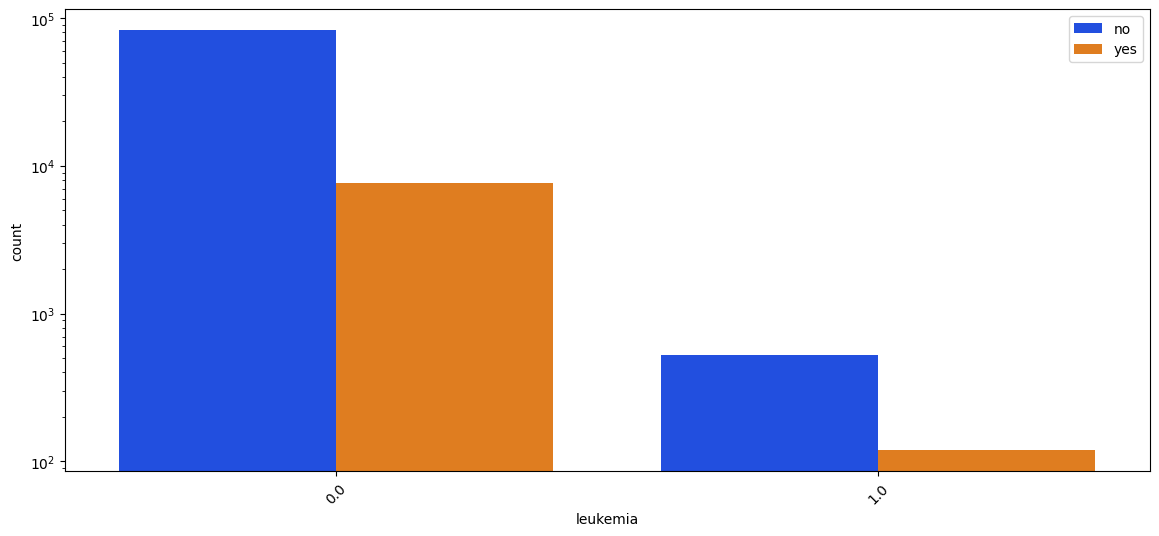

_______________________________________________________________________________
LYMPHOMA

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: lymphoma, dtype: float64
count    90998.000000
mean         0.004132
std          0.064148
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: lymphoma, dtype: float64



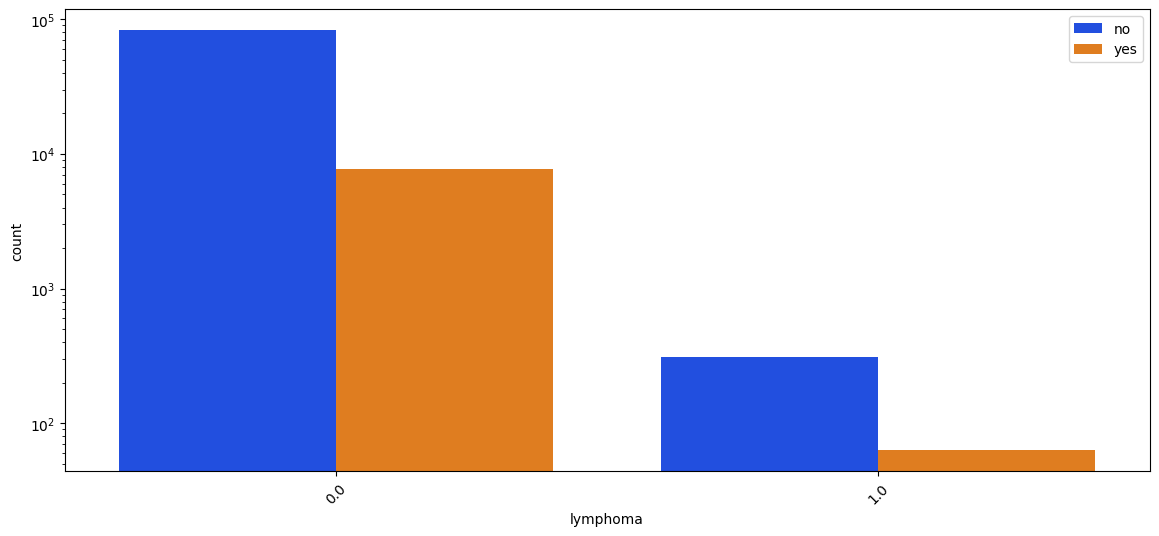

_______________________________________________________________________________
SOLID_TUMOR_WITH_METASTASIS

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: solid_tumor_with_metastasis, dtype: float64
count    90998.000000
mean         0.020638
std          0.142169
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: solid_tumor_with_metastasis, dtype: float64



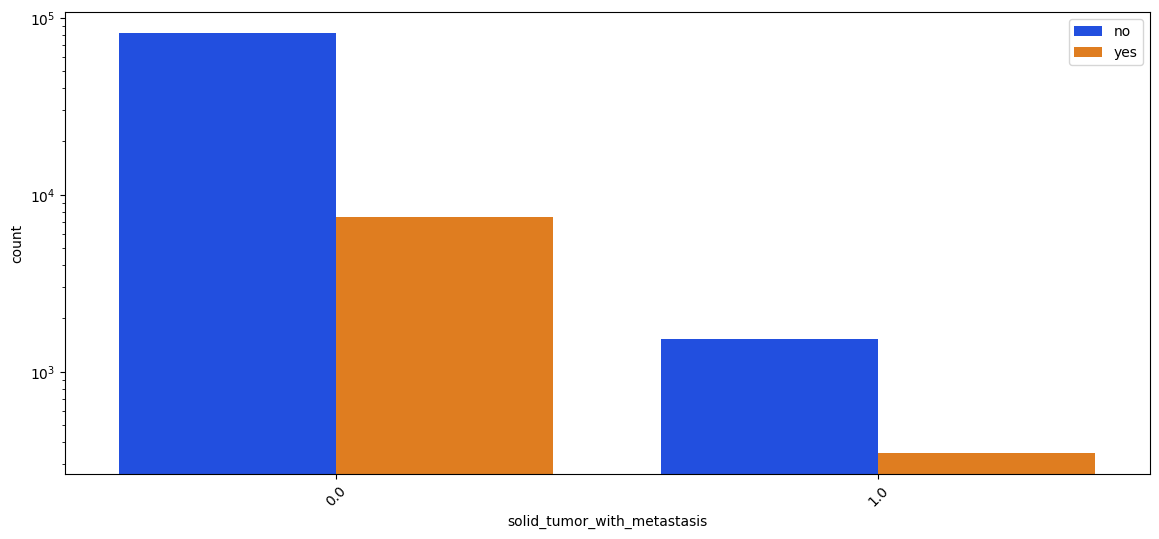

_______________________________________________________________________________
APACHE_3J_BODYSYSTEM

0            Sepsis
1       Respiratory
2         Metabolic
3    Cardiovascular
4            Trauma
Name: apache_3j_bodysystem, dtype: object
count              90051
unique                11
top       Cardiovascular
freq               29999
Name: apache_3j_bodysystem, dtype: object



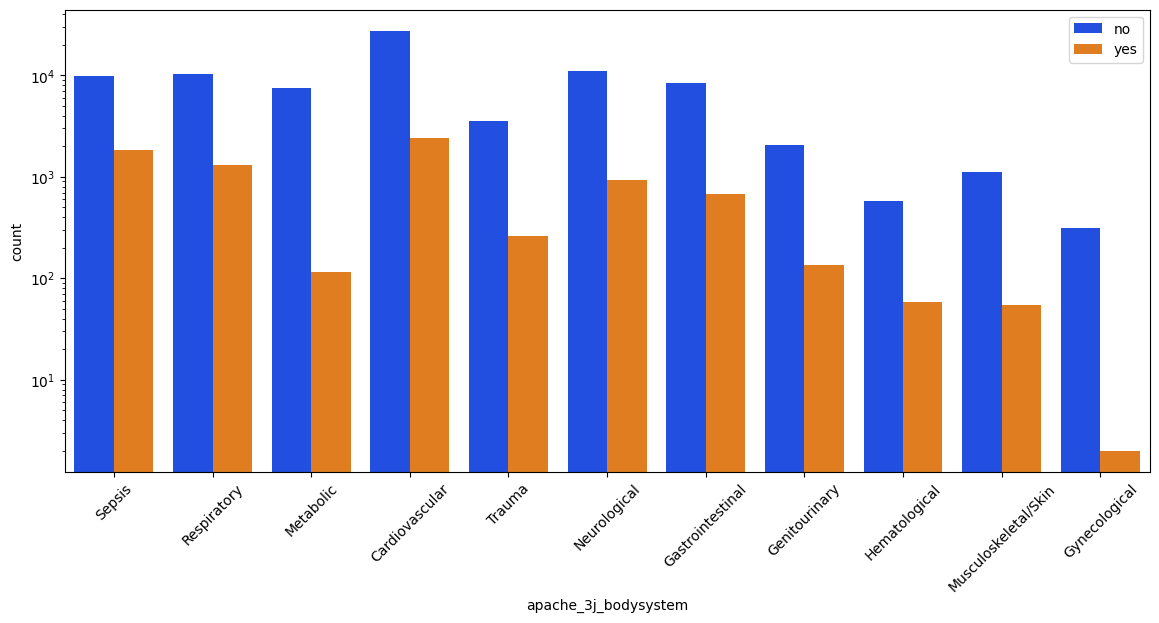

_______________________________________________________________________________
APACHE_2_BODYSYSTEM

0    Cardiovascular
1       Respiratory
2         Metabolic
3    Cardiovascular
4            Trauma
Name: apache_2_bodysystem, dtype: object
count              90051
unique                10
top       Cardiovascular
freq               38816
Name: apache_2_bodysystem, dtype: object



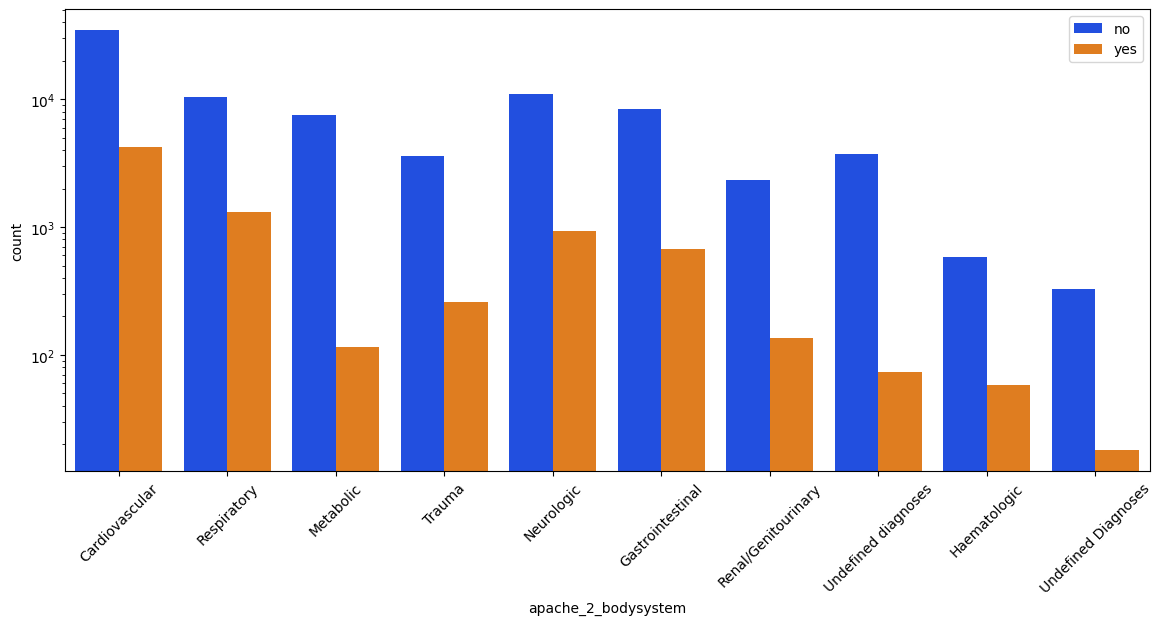

_______________________________________________________________________________
UNNAMED: 83

0   NaN
1   NaN
2   NaN
3   NaN
4   NaN
Name: Unnamed: 83, dtype: float64
count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: Unnamed: 83, dtype: float64



IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

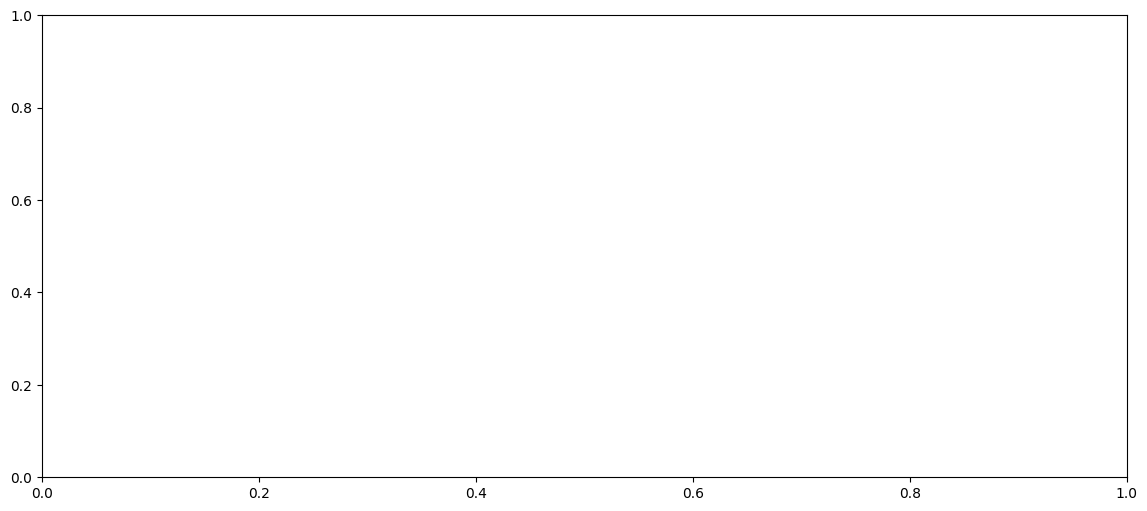

In [106]:
import seaborn as sns
import matplotlib.pyplot as plt

cat_col = []
num_col = []

for i in df.columns[3:]:
    print(i.upper())  # Print column name in uppercase
    print('')
    print(df[i].head(5))  # Print first five rows of the column

    # Print descriptive statistics of the column
    print(df[i].describe(include='all'))
    print('')    
    
    # Visualize the column based on the number of unique values
    if df[i].value_counts().shape[0] > 20:
        # If more than 20 unique values, plot a histogram
        plt.figure(figsize=(12, 8))
        sns.histplot(data=df, x=i, hue='hospital_death', kde=True, palette=['blue', 'orange'])
        plt.legend()
        plt.show()        
        num_col.append(i)  # Append numeric column to num_col list
        
    else:
        # If 20 or fewer unique values, plot a count plot
        plt.figure(figsize=(14, 6))
        sns.countplot(x=i, hue="hospital_death", data=df, palette='bright')
        plt.legend(loc='upper right')
        plt.yscale('log')  # Use logarithmic scale for better visibility
        plt.xticks(rotation=45)
        plt.show()
        
        if df[i].dtype != object:
            num_col.append(i)  # Append numeric column to num_col list  
        else:
            cat_col.append(i)  # Append categorical column to cat_col list     
    
    print('_______________________________________________________________________________')

  